In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Politician Trades/all_trades.csv',
                 header = None)
df.columns = ["Politician Name", "Party", "Chamber", "State", "Issuer Name", "Ticker", "Publication Date",
              "Transaction Date", "Reporting Gap", "Owner", "Transaction Type", "Value Range", "Price",
              "Transaction ID"]

In [ ]:
df.head()

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID
0,Tom Carper,Democrat,Senate,DE,Valero Energy Corp,VLO:US,29 Apr,11 Apr 2024,19,Spouse,SELL,1K–15K,177.04,10000062280
1,Tom Carper,Democrat,Senate,DE,Enbridge Inc,ENB:US,29 Apr,11 Apr 2024,19,Spouse,BUY,1K–15K,34.55,10000062281
2,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,29 Apr,1 Apr 2024,29,Spouse,SELL,15K–50K,NaN,10000062282
3,Dan Newhouse,Republican,House,WA,Accenture PLC,ACN:US,26 Apr,10 Apr 2024,15,Spouse,BUY,1K–15K,324.4,20003772725
4,Dan Newhouse,Republican,House,WA,Analog Devices Inc,ADI:US,26 Apr,10 Apr 2024,15,Spouse,BUY,1K–15K,196.33,20003772726


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39114 entries, 0 to 39113
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Politician Name   39114 non-null  object
 1   Party             39114 non-null  object
 2   Chamber           39114 non-null  object
 3   State             39114 non-null  object
 4   Issuer Name       39114 non-null  object
 5   Ticker            35041 non-null  object
 6   Publication Date  39114 non-null  object
 7   Transaction Date  39114 non-null  object
 8   Reporting Gap     39114 non-null  int64 
 9   Owner             39114 non-null  object
 10  Transaction Type  39114 non-null  object
 11  Value Range       39114 non-null  object
 12  Price             33186 non-null  object
 13  Transaction ID    39114 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 4.2+ MB


In [ ]:
df[["Politician Name", "Party", "Chamber", "State", "Issuer Name", "Ticker"]] = df[["Politician Name", "Party", "Chamber", "State", "Issuer Name", "Ticker"]].astype('string')

df['Transaction Date'] = df['Transaction Date'].str.replace('Sept', 'Sep')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date']).dt.date

df['Publication Date'] = df['Publication Date'].str.replace('Sept', 'Sep')
df['Publication Date'] = df['Transaction Date'] + pd.to_timedelta(df['Reporting Gap'] + 1, unit='d')

df.Price = df.Price.str.replace(',', '').astype(float)

<ipython-input-4-f8d2a226c2ee>:7: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df['Publication Date'] = df['Transaction Date'] + pd.to_timedelta(df['Reporting Gap'] + 1, unit='d')


In [ ]:
df.iloc[df['Reporting Gap'].idxmax(),:]

Politician Name          Sean Casten
Party                       Democrat
Chamber                        House
State                             IL
Issuer Name         MYNO CARBON CORP
Ticker                          <NA>
Publication Date          2024-01-17
Transaction Date          2021-06-25
Reporting Gap                    935
Owner                    Undisclosed
Transaction Type                 BUY
Value Range                  15K–50K
Price                            NaN
Transaction ID           20003770296
Name: 2355, dtype: object

In [ ]:
df.Ticker.value_counts()[df.Ticker.value_counts().sort_values(ascending=False) >= 10]

Ticker
MSFT:US     456
GOOGL:US    420
AMZN:US     308
META:US     281
ADBE:US     250
           ... 
SJT:US       10
MNDT:US      10
ITT:US       10
EMN:US       10
ALIZY:US     10
Name: count, Length: 723, dtype: Int64

In [ ]:
df.Ticker.nunique()

2334

In [ ]:
trades = df.groupby('Politician Name').count().iloc[:,0]
trades = pd.DataFrame(trades).reset_index()
trades.columns = ['Politician Name', 'Trades']
trades = trades.sort_values('Trades', ascending=False)
trades.set_index('Politician Name')

trades['Party'] = ""

for p in trades['Politician Name']:
    party = df[df['Politician Name'] == p]['Party'].iloc[0]  # Get the party of the politician
    trades.loc[trades['Politician Name'] == p, 'Party'] = party  # Set the party in the trades DataFrame

trades

,Politician Name,Trades,Party
170,Ro Khanna,15462,Democrat
141,Michael McCaul,5778,Republican
57,Diana Harshbarger,2937,Republican
107,Josh Gottheimer,1422,Democrat
44,Daniel S. Goldman,1306,Democrat
...,...,...,...
91,Jim Costa,1,Democrat
190,Steve Chabot,1,Republican
131,Mark Kelly,1,Democrat
192,Steve Womack,1,Republican


<Axes: xlabel='Trades', ylabel='Politician Name'>

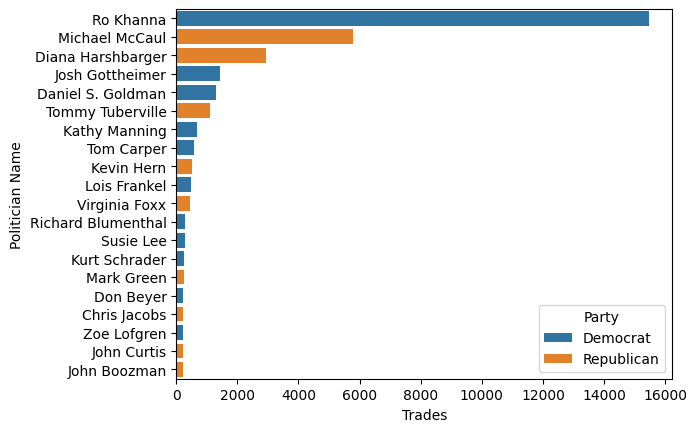

In [ ]:
import seaborn as sns

sns.barplot(trades.iloc[0:20, :], y="Politician Name", x='Trades', orient="y", hue='Party')

In [ ]:
df[df.Ticker.isna()].isna().sum()

Politician Name        0
Party                  0
Chamber                0
State                  0
Issuer Name            0
Ticker              4073
Publication Date       0
Transaction Date       0
Reporting Gap          0
Owner                  0
Transaction Type       0
Value Range            0
Price               4033
Transaction ID         0
dtype: int64

In [ ]:
# trades
df = df[~df.Ticker.isna()]
df.head()

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID
0,Tom Carper,Democrat,Senate,DE,Valero Energy Corp,VLO:US,2024-05-01,2024-04-11,19,Spouse,SELL,1K–15K,177.04,10000062280
1,Tom Carper,Democrat,Senate,DE,Enbridge Inc,ENB:US,2024-05-01,2024-04-11,19,Spouse,BUY,1K–15K,34.55,10000062281
2,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,2024-05-01,2024-04-01,29,Spouse,SELL,15K–50K,NaN,10000062282
3,Dan Newhouse,Republican,House,WA,Accenture PLC,ACN:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,324.40,20003772725
4,Dan Newhouse,Republican,House,WA,Analog Devices Inc,ADI:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,196.33,20003772726


In [ ]:
df.isna().sum()

Politician Name        0
Party                  0
Chamber                0
State                  0
Issuer Name            0
Ticker                 0
Publication Date       0
Transaction Date       0
Reporting Gap          0
Owner                  0
Transaction Type       0
Value Range            0
Price               1895
Transaction ID         0
dtype: int64

In [ ]:
by_party = pd.DataFrame(df.groupby('Party').count().iloc[:,0]).reset_index()
by_party

,Party,Politician Name
0,Democrat,22432
1,Other,9
2,Republican,12600


([<matplotlib.patches.Wedge at 0x7feefaa0cb20>,
 [Text(-0.4688711364593868, 0.9950677652277171, 'Democrat'),
  Text(-0.6996059441597451, -0.8488530631954814, 'Other'),
  Text(0.46967391417875365, -0.994689104363775, 'Republican')],
 [Text(-0.25574789261421094, 0.5427642355787548, '64%'),
  Text(-0.38160324226895187, -0.4630107617429898, '0%'),
  Text(0.25618577137022924, -0.5425576932893318, '36%')])

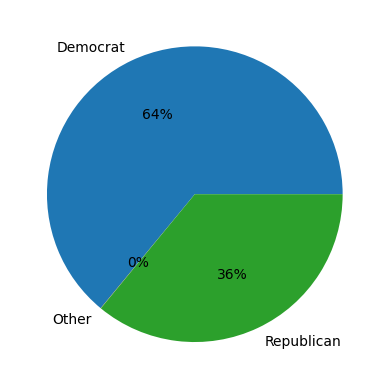

In [ ]:
import matplotlib.pyplot as plt

plt.pie(by_party.iloc[:,1], labels=by_party.iloc[:,0], autopct='%.0f%%')

In [ ]:
by_party.iloc[0,1] = by_party.iloc[0,1] - 13929
by_party

,Party,Politician Name
0,Democrat,8503
1,Other,9
2,Republican,12600


([<matplotlib.patches.Wedge at 0x7feefaa6c070>,
 [Text(0.3308457785731501, 1.0490667618413645, 'Democrat'),
  Text(-0.9018280975671715, 0.6298460783702446, 'Other'),
  Text(-0.32944059570063244, -1.0495088822417906, 'Republican')],
 [Text(0.18046133376717277, 0.5722182337316534, '40%'),
  Text(-0.49190623503663894, 0.34355240638376977, '0%'),
  Text(-0.1796948703821631, -0.5724593903137039, '60%')])

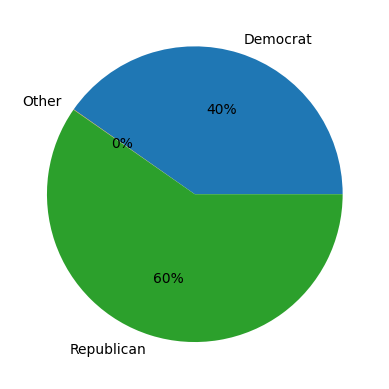

In [ ]:
plt.pie(by_party.iloc[:,1], labels=by_party.iloc[:,0], autopct='%.0f%%')

In [ ]:
import yfinance as yf

In [ ]:
df.head()

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID
0,Tom Carper,Democrat,Senate,DE,Valero Energy Corp,VLO:US,2024-05-01,2024-04-11,19,Spouse,SELL,1K–15K,177.04,10000062280
1,Tom Carper,Democrat,Senate,DE,Enbridge Inc,ENB:US,2024-05-01,2024-04-11,19,Spouse,BUY,1K–15K,34.55,10000062281
2,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,2024-05-01,2024-04-01,29,Spouse,SELL,15K–50K,NaN,10000062282
3,Dan Newhouse,Republican,House,WA,Accenture PLC,ACN:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,324.40,20003772725
4,Dan Newhouse,Republican,House,WA,Analog Devices Inc,ADI:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,196.33,20003772726


In [ ]:
df['US Ticker'] = df[df['Ticker'].str.contains(':US')].Ticker.str.removesuffix(':US')
# df[~(df['Ticker'].str.contains(':US') | df['Ticker'].str.contains('$'))]

In [ ]:
df.isna().sum()

Politician Name        0
Party                  0
Chamber                0
State                  0
Issuer Name            0
Ticker                 0
Publication Date       0
Transaction Date       0
Reporting Gap          0
Owner                  0
Transaction Type       0
Value Range            0
Price               1895
Transaction ID         0
US Ticker            106
dtype: int64

In [ ]:
import yfinance as yf

In [ ]:
df.iloc[1]

Politician Name       Tom Carper
Party                   Democrat
Chamber                   Senate
State                         DE
Issuer Name         Enbridge Inc
Ticker                    ENB:US
Publication Date      2024-05-01
Transaction Date      2024-04-11
Reporting Gap                 19
Owner                     Spouse
Transaction Type             BUY
Value Range               1K–15K
Price                      34.55
Transaction ID       10000062281
US Ticker                    ENB
Name: 1, dtype: object

In [ ]:
# Filter the DataFrame for rows where 'Price' is NaN
ticker_symbol = df.iloc[1]['US Ticker']
date = df.iloc[1]['Transaction Date']

# Increment the end date by one day to make it exclusive
end_date = date + pd.Timedelta(days=1)

# Formatting dates as strings for the API call
start_date_str = date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Fetching data
data = yf.download(ticker_symbol, start=start_date_str, end=end_date_str)

if data.empty:
    print(f"No data available for {ticker_symbol} on {date.date()}.")
else:
    # Extracting closing price
    closing_price = data['Close'].iloc[0]
    # Optionally, you can update the DataFrame with the fetched price
    # print(f"Price for {df.at[index, 'US Ticker']} from {df.at[index, 'Price']} changed to {closing_price}")
    print(f"The opening price of {ticker_symbol} on {date} was ${closing_price:.2f}.")

[*********************100%%**********************]  1 of 1 completed

The opening price of ENB on 2024-04-11 was $34.55.


In [ ]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm

def fetch_closest_price(ticker_symbol, date):
    # Set a 7-day window around the date: 3 days before, the date itself, and 3 days after
    start_date = date - pd.Timedelta(days=3)
    end_date = date + pd.Timedelta(days=3)

    # Formatting dates as strings for the API call
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    try:
        # Fetching data
        data = yf.download(ticker_symbol, start=start_date_str, end=end_date_str, progress=False)
        # Drop any rows with NaN values in 'Close' and sort by date difference
        data.dropna(subset=['Close'], inplace=True)
        data['date_diff'] = abs((data.index - date).days)
        data.sort_values('date_diff', inplace=True)

        # Return the closest non-null 'Close' price
        return data.iloc[0]['Close'] if not data.empty else None
    except Exception as e:
        print(f"Error downloading data for {ticker_symbol} on {date.date()}: {e}")
        return None

# Define the days before and after the transaction date to fetch the prices
days_offsets = [0]

# Adding a progress bar over the row iterations with tqdm
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc='Processing rows'):
    ticker_symbol = row['US Ticker']
    transaction_date = pd.to_datetime(row['Transaction Date'])

    for offset in days_offsets:
        offset_date = transaction_date + pd.Timedelta(days=offset)
        closest_price = fetch_closest_price(ticker_symbol, offset_date)

        if closest_price is not None:
            df.at[index, f'Price_{offset}_days'] = closest_price
        else:
            print(f"No valid data found for {ticker_symbol} {offset_date.date()}")

print("Price updates complete.")

Processing rows:   0%|          | 55/35041 [00:09<55:37, 10.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 57/35041 [00:09<56:29, 10.32it/s]

Error downloading data for JTSXX on 2024-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-25


Processing rows:   0%|          | 60/35041 [00:09<52:12, 11.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 63/35041 [00:09<42:31, 13.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 66/35041 [00:09<35:07, 16.60it/s]

Error downloading data for JTSXX on 2024-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-14
Error downloading data for JTSXX on 2024-03-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-11
Error downloading data for JTSXX on 2024-03-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-04
Error downloading data for JTSXX on 2024-03-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 69/35041 [00:10<33:21, 17.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for JTSXX on 2024-03-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-07
Error downloading data for JTSXX on 2024-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 72/35041 [00:10<31:21, 18.59it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 75/35041 [00:10<29:09, 19.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for OGVXX on 2024-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2024-03-01
Error downloading data for JTSXX on 2024-03-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-28
Error downloading data for JTSXX on 2024-03-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-22
Error downloading data for JTSXX on 2024-03-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-19
Error downloading data for JTSXX on 2024-03-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 78/35041 [00:10<28:30, 20.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Period 'max' is invalid, must be one of ['1d', '5d']
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 81/35041 [00:10<26:17, 22.15it/s]

Error downloading data for JTSXX on 2024-03-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-05
Error downloading data for JTSXX on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-15
Error downloading data for JTSXX on 2024-03-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-20
Error downloading data for NFLX on 2024-03-07: 'NFLX'
No valid data found for NFLX 2024-03-07
Error downloading data for ADSK on 2024-03-05: 'ADSK'
No valid data found for ADSK 2024-03-05


Processing rows:   0%|          | 87/35041 [00:10<26:03, 22.36it/s]

Error downloading data for EPAM on 2024-03-27: 'EPAM'
No valid data found for EPAM 2024-03-27
Error downloading data for ADSK on 2024-03-11: 'ADSK'
No valid data found for ADSK 2024-03-11
Error downloading data for ADBE on 2024-03-11: 'ADBE'
No valid data found for ADBE 2024-03-11


Processing rows:   0%|          | 90/35041 [00:10<25:37, 22.74it/s]

Error downloading data for SAFRY on 2024-03-13: 'SAFRY'
No valid data found for SAFRY 2024-03-13
Error downloading data for MAR on 2024-03-20: 'MAR'
No valid data found for MAR 2024-03-20
Error downloading data for GE on 2024-03-14: 'GE'
No valid data found for GE 2024-03-14


Processing rows:   0%|          | 93/35041 [00:11<32:29, 17.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 95/35041 [00:11<33:04, 17.61it/s]

Error downloading data for JTSXX on 2024-03-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-18


Processing rows:   0%|          | 136/35041 [00:14<30:02, 19.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 139/35041 [00:15<27:30, 21.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 143/35041 [00:15<24:12, 24.03it/s]

Error downloading data for JTSXX on 2024-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-25
Error downloading data for JTSXX on 2024-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-14
Error downloading data for JTSXX on 2024-03-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-11
Error downloading data for JTSXX on 2024-03-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-04
Error downloading data for JTSXX on 2024-03-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-13


Processing rows:   0%|          | 146/35041 [00:15<23:39, 24.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 150/35041 [00:15<20:58, 27.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 154/35041 [00:15<19:33, 29.72it/s]

Error downloading data for JTSXX on 2024-03-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-07
Error downloading data for JTSXX on 2024-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-01
Error downloading data for OGVXX on 2024-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2024-03-01
Error downloading data for JTSXX on 2024-03-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 158/35041 [00:15<19:20, 30.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for JTSXX on 2024-03-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-22
Error downloading data for JTSXX on 2024-03-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-19
Error downloading data for JTSXX on 2024-03-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-26
Error downloading data for JTSXX on 2024-03-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-05
Error downloading data for JTSXX on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-15
Error downloading data for JTSXX on 2024-03-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-20


Processing rows:   0%|          | 172/35041 [00:16<20:35, 28.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   1%|          | 179/35041 [00:16<20:29, 28.36it/s]

Error downloading data for JTSXX on 2024-03-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-03-18


Processing rows:   1%|          | 213/35041 [00:18<54:12, 10.71it/s]

Error downloading data for <NA> on 2024-03-30: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2024-03-30


Processing rows:   1%|          | 215/35041 [00:18<53:58, 10.75it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 221/35041 [00:19<1:29:46,  6.46it/s]

Error downloading data for BRK/B on 2024-04-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-04-04


Processing rows:   1%|          | 295/35041 [00:28<45:26, 12.74it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 297/35041 [00:28<1:42:21,  5.66it/s]

Error downloading data for BRK/B on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-03-15


Processing rows:   1%|          | 363/35041 [00:36<57:04, 10.13it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 365/35041 [00:37<1:46:38,  5.42it/s]

Error downloading data for BF/A on 2024-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2024-03-25


Processing rows:   1%|▏         | 464/35041 [00:47<1:11:48,  8.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-03-03 -> 2024-03-09)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-03-10 -> 2024-03-16)')
Processing rows:   1%|▏         | 466/35041 [00:47<59:29,  9.69it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-03-25 -> 2024-03-31)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-03-18 -> 2024-03-24)')


Error downloading data for XSP on 2024-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-06
Error downloading data for XSP on 2024-03-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-13
Error downloading data for XSP on 2024-03-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-28
Error downloading data for XSP on 2024-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-21


Processing rows:   1%|▏         | 493/35041 [00:50<50:00, 11.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 495/35041 [00:50<1:34:50,  6.07it/s]

Error downloading data for ABB on 2024-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2024-03-08


Processing rows:   1%|▏         | 516/35041 [00:53<1:06:33,  8.65it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 518/35041 [00:54<2:08:51,  4.47it/s]

Error downloading data for BRK/B on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-03-15


Processing rows:   2%|▏         | 572/35041 [00:59<59:48,  9.60it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 573/35041 [00:59<1:57:27,  4.89it/s]

Error downloading data for LTHM on 2024-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-03-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TE1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 575/35041 [01:00<2:31:33,  3.79it/s]

Error downloading data for TE1 on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TE1 2024-03-15


Processing rows:   2%|▏         | 583/35041 [01:01<1:06:15,  8.67it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 587/35041 [01:02<1:42:20,  5.61it/s]

Error downloading data for BRK/B on 2024-03-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-03-28


Processing rows:   2%|▏         | 593/35041 [01:02<1:07:49,  8.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 597/35041 [01:02<44:58, 12.76it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 599/35041 [01:03<42:10, 13.61it/s]

Error downloading data for JTSXX on 2024-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-15
Error downloading data for JTSXX on 2024-02-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-01
Error downloading data for JTSXX on 2024-02-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-06


Processing rows:   2%|▏         | 612/35041 [01:03<38:54, 14.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 615/35041 [01:04<39:10, 14.64it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for JTSXX on 2024-02-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-26
Error downloading data for JTSXX on 2024-02-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-05


Processing rows:   2%|▏         | 621/35041 [01:04<51:18, 11.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 623/35041 [01:04<52:08, 11.00it/s]

Error downloading data for JTSXX on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 625/35041 [01:05<49:59, 11.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 631/35041 [01:05<28:47, 19.91it/s]

Error downloading data for JTSXX on 2024-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-15
Error downloading data for JTSXX on 2024-02-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-01
Error downloading data for JTSXX on 2024-02-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 642/35041 [01:05<18:21, 31.22it/s]

Error downloading data for JTSXX on 2024-02-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 648/35041 [01:05<15:41, 36.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JTSXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 653/35041 [01:05<14:26, 39.69it/s]

Error downloading data for JTSXX on 2024-02-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-05
Error downloading data for JTSXX on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JTSXX 2024-02-23


Processing rows:   2%|▏         | 743/35041 [01:13<51:30, 11.10it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 747/35041 [01:14<1:20:02,  7.14it/s]

Error downloading data for BRK/B on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-02-23


Processing rows:   3%|▎         | 881/35041 [01:27<59:26,  9.58it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-13 -> 2024-02-19)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-20 -> 2024-02-26)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-02 -> 2024-02-08)')
Processing rows:   3%|▎         | 884/35041 [01:27<44:20, 12.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-09 -> 2024-02-15)')


Error downloading data for XSP on 2024-02-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-16
Error downloading data for XSP on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-23
Error downloading data for XSP on 2024-02-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-05
Error downloading data for XSP on 2024-02-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-12


Processing rows:   3%|▎         | 890/35041 [01:27<46:58, 12.12it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 894/35041 [01:28<1:14:47,  7.61it/s]

Error downloading data for BRK/B on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-02-23


Processing rows:   3%|▎         | 919/35041 [01:30<45:05, 12.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 921/35041 [01:31<1:36:11,  5.91it/s]

Error downloading data for LTHM on 2024-02-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-22


Processing rows:   3%|▎         | 930/35041 [01:32<1:04:50,  8.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LTHM on 2024-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-14
Error downloading data for LTHM on 2024-02-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-16


Processing rows:   3%|▎         | 939/35041 [01:33<55:26, 10.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 942/35041 [01:33<47:26, 11.98it/s]

Error downloading data for LTHM on 2024-02-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-20


Processing rows:   3%|▎         | 946/35041 [01:34<55:11, 10.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LTHM on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-23


Processing rows:   3%|▎         | 948/35041 [01:34<1:01:41,  9.21it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 950/35041 [01:34<56:29, 10.06it/s]  

Error downloading data for LTHM on 2024-02-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-21


Processing rows:   3%|▎         | 952/35041 [01:34<57:42,  9.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DE1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 954/35041 [01:35<2:05:09,  4.54it/s]

Error downloading data for DE1 on 2024-02-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DE1 2024-02-20


Processing rows:   3%|▎         | 1065/35041 [01:44<28:14, 20.05it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: No timezone found, symbol may be delisted
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1068/35041 [01:45<53:32, 10.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1073/35041 [01:45<39:26, 14.35it/s]

Error downloading data for BRK/B on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-25
Error downloading data for BRK/B on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-25
Error downloading data for <NA> on 2024-02-05: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2024-02-05
Error downloading data for <NA> on 2024-02-05: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2024-02-05
Error downloading data for <NA> on 2024-02-05: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2024-02-05
Error downloading data for CJTXX on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-25


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1076/35041 [01:45<38:22, 14.75it/s]

Error downloading data for CJTXX on 2024-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-11
Error downloading data for CJTXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-02


Processing rows:   3%|▎         | 1082/35041 [01:46<39:41, 14.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1086/35041 [01:46<36:20, 15.57it/s]

Error downloading data for CJTXX on 2024-01-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-16


Processing rows:   3%|▎         | 1092/35041 [01:46<57:10,  9.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1094/35041 [01:47<55:24, 10.21it/s]

Error downloading data for CJTXX on 2024-01-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-30


Processing rows:   3%|▎         | 1109/35041 [01:48<52:26, 10.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1111/35041 [01:48<48:34, 11.64it/s]

Error downloading data for CJTXX on 2024-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1113/35041 [01:49<48:02, 11.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1116/35041 [01:49<39:12, 14.42it/s]

Error downloading data for CJTXX on 2024-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-31
Error downloading data for CJTXX on 2024-01-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-22
Error downloading data for CJTXX on 2024-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-18


Processing rows:   3%|▎         | 1134/35041 [01:51<1:03:13,  8.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1138/35041 [01:51<49:41, 11.37it/s]

Error downloading data for OGVXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2024-01-02


Processing rows:   3%|▎         | 1143/35041 [01:52<40:27, 13.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1146/35041 [01:52<33:15, 16.99it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1149/35041 [01:52<28:35, 19.76it/s]

Error downloading data for CJTXX on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-25
Error downloading data for CJTXX on 2024-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-11
Error downloading data for CJTXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-02


Processing rows:   3%|▎         | 1152/35041 [01:52<26:01, 21.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1158/35041 [01:52<23:54, 23.62it/s]

Error downloading data for CJTXX on 2024-01-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-16


Processing rows:   3%|▎         | 1164/35041 [01:53<22:11, 25.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1170/35041 [01:53<21:48, 25.88it/s]

Error downloading data for CJTXX on 2024-01-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-30


Processing rows:   3%|▎         | 1179/35041 [01:53<21:36, 26.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1182/35041 [01:53<21:15, 26.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1185/35041 [01:53<21:38, 26.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for CJTXX on 2024-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-24
Error downloading data for CJTXX on 2024-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-31
Error downloading data for CJTXX on 2024-01-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-22


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1192/35041 [01:54<21:07, 26.70it/s]

Error downloading data for CJTXX on 2024-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-18


Processing rows:   3%|▎         | 1207/35041 [01:54<20:23, 27.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1213/35041 [01:54<20:32, 27.45it/s]

Error downloading data for OGVXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2024-01-02


Processing rows:   3%|▎         | 1216/35041 [01:55<25:07, 22.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PDRDY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PDRDY on 2024-01-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PDRDY 2024-01-30


Processing rows:   4%|▍         | 1487/35041 [02:17<1:11:17,  7.84it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: No timezone found, symbol may be delisted
Processing rows:   4%|▍         | 1488/35041 [02:17<2:16:07,  4.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1490/35041 [02:18<1:38:19,  5.69it/s]

Error downloading data for BRK/B on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-10
Error downloading data for BSX on 2024-01-10: 'BSX'
No valid data found for BSX 2024-01-10
Error downloading data for ANSS on 2024-01-10: 'ANSS'
No valid data found for ANSS 2024-01-10
Error downloading data for HUBB on 2024-01-10: 'HUBB'
No valid data found for HUBB 2024-01-10


Processing rows:   4%|▍         | 1497/35041 [02:18<44:55, 12.44it/s]  

Error downloading data for ICE on 2024-01-10: 'ICE'
No valid data found for ICE 2024-01-10
Error downloading data for SYK on 2024-01-10: 'SYK'
No valid data found for SYK 2024-01-10
Error downloading data for PANW on 2024-01-10: 'PANW'
No valid data found for PANW 2024-01-10
Error downloading data for ROK on 2024-01-10: 'ROK'
No valid data found for ROK 2024-01-10
Error downloading data for GOOGL on 2024-01-10: 'GOOGL'
No valid data found for GOOGL 2024-01-10


Processing rows:   4%|▍         | 1500/35041 [02:18<35:14, 15.86it/s]

Error downloading data for CME on 2024-01-10: 'CME'
No valid data found for CME 2024-01-10
Error downloading data for AVY on 2024-01-10: 'AVY'
No valid data found for AVY 2024-01-10


Processing rows:   4%|▍         | 1519/35041 [02:20<51:11, 10.92it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1522/35041 [02:21<1:46:07,  5.26it/s]

Error downloading data for BF/A on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2024-01-10


Processing rows:   5%|▍         | 1592/35041 [02:28<57:37,  9.67it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   5%|▍         | 1596/35041 [02:29<1:24:10,  6.62it/s]

Error downloading data for LBYAV on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2024-01-10


Processing rows:   5%|▍         | 1652/35041 [02:33<38:01, 14.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   5%|▍         | 1656/35041 [02:34<1:05:00,  8.56it/s]

Error downloading data for LTHM on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-01-10


Processing rows:   5%|▍         | 1658/35041 [02:34<1:06:08,  8.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-01-06 -> 2024-01-12)')
Processing rows:   5%|▍         | 1660/35041 [02:34<55:07, 10.09it/s]  

Error downloading data for XSP on 2024-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-01-09


Processing rows:   5%|▍         | 1708/35041 [02:38<53:23, 10.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   5%|▍         | 1711/35041 [02:38<1:31:00,  6.10it/s]

Error downloading data for WBK on 2024-01-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WBK 2024-01-16


Processing rows:   5%|▌         | 1826/35041 [02:48<30:08, 18.36it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   5%|▌         | 1828/35041 [02:48<1:04:02,  8.64it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   5%|▌         | 1831/35041 [02:48<52:09, 10.61it/s]  

Error downloading data for BRK/B on 2024-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-19
Error downloading data for BRK/B on 2024-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-19
Error downloading data for BRK/B on 2024-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-19


Processing rows:   5%|▌         | 1903/35041 [02:53<51:06, 10.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMEH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMEH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   5%|▌         | 1906/35041 [02:54<1:24:30,  6.53it/s]

Error downloading data for AMEH on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AMEH 2024-01-10
Error downloading data for AMEH on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AMEH 2024-01-10


Processing rows:   6%|▌         | 1929/35041 [02:57<1:01:17,  9.00it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   6%|▌         | 1931/35041 [02:58<2:02:48,  4.49it/s]

Error downloading data for BRK/B on 2023-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-12-14


Processing rows:   6%|▌         | 1948/35041 [02:59<32:39, 16.89it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   6%|▌         | 1957/35041 [02:59<21:46, 25.32it/s]

Error downloading data for BRK/B on 2023-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-12-14


Processing rows:   6%|▌         | 1986/35041 [03:00<34:07, 16.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   6%|▌         | 1990/35041 [03:01<55:36,  9.91it/s]  

Error downloading data for MTBC on 2023-12-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2023-12-08


Processing rows:   6%|▌         | 2044/35041 [03:06<36:41, 14.99it/s]

Error downloading data for <NA> on 2024-01-03: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2024-01-03
Error downloading data for <NA> on 2024-01-08: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2024-01-08


Processing rows:   6%|▌         | 2087/35041 [03:09<38:27, 14.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   6%|▌         | 2091/35041 [03:10<1:19:02,  6.95it/s]

Error downloading data for AAIC on 2023-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2023-12-14


Processing rows:   6%|▌         | 2107/35041 [03:12<54:01, 10.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRSWF']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   6%|▌         | 2109/35041 [03:12<1:38:43,  5.56it/s]

Error downloading data for TRSWF on 2023-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRSWF 2023-12-21


Processing rows:   6%|▌         | 2141/35041 [03:15<28:56, 18.95it/s]

Error downloading data for <NA> on 2023-11-24: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-11-24
Error downloading data for <NA> on 2023-12-10: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-12-10
Error downloading data for <NA> on 2023-10-09: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-10-09
Error downloading data for <NA> on 2023-11-05: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-11-05


Processing rows:   6%|▌         | 2184/35041 [03:18<42:19, 12.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   6%|▌         | 2186/35041 [03:19<49:01, 11.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   6%|▌         | 2189/35041 [03:19<39:41, 13.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for CJTXX on 2023-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-24
Error downloading data for CJTXX on 2023-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-22
Error downloading data for CJTXX on 2023-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-01
Error downloading data for CJTXX on 2023-11-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-21
Error downloading data for CJTXX on 2023-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   6%|▋         | 2192/35041 [03:19<34:47, 15.73it/s]

Error downloading data for CJTXX on 2023-11-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-13
Error downloading data for CJTXX on 2023-11-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-10


Processing rows:   6%|▋         | 2258/35041 [03:23<20:45, 26.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   6%|▋         | 2261/35041 [03:23<20:40, 26.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   6%|▋         | 2265/35041 [03:24<19:24, 28.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, m

Error downloading data for CJTXX on 2023-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-24
Error downloading data for CJTXX on 2023-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-22
Error downloading data for CJTXX on 2023-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-01
Error downloading data for CJTXX on 2023-11-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-21
Error downloading data for CJTXX on 2023-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-15
Error downloading data for CJTXX on 2023-11-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-11-13
Error downloading data for CJTXX on 2023-11-10: unsupported oper

Processing rows:   7%|▋         | 2313/35041 [03:26<47:07, 11.57it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   7%|▋         | 2317/35041 [03:27<1:09:37,  7.83it/s]

Error downloading data for BRK/B on 2023-12-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-12-04


Processing rows:   7%|▋         | 2537/35041 [03:46<1:24:38,  6.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   7%|▋         | 2539/35041 [03:48<2:41:22,  3.36it/s]

Error downloading data for CDAY on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-11-03


Processing rows:   7%|▋         | 2584/35041 [03:52<39:41, 13.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   7%|▋         | 2586/35041 [03:53<1:27:18,  6.20it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LBYAV on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-11-03
Error downloading data for LBYAV on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-11-03


Processing rows:   8%|▊         | 2639/35041 [03:58<57:45,  9.35it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   8%|▊         | 2642/35041 [03:59<1:34:20,  5.72it/s]

Error downloading data for BRK/B on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-11-03


Processing rows:   8%|▊         | 2657/35041 [04:00<43:40, 12.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-29 -> 2023-11-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-29 -> 2023-11-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-11-25 -> 2023-12-01)')
Processing rows:   8%|▊         | 2660/35041 [04:00<34:44, 15.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-11-12 -> 2023-11-18)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-11-03 -> 2023-11-09)')


Error downloading data for XSP on 2023-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-01
Error downloading data for XSP on 2023-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-01
Error downloading data for XSP on 2023-11-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-28
Error downloading data for XSP on 2023-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-15
Error downloading data for XSP on 2023-11-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-06


Processing rows:   8%|▊         | 2681/35041 [04:02<34:19, 15.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   8%|▊         | 2683/35041 [04:02<1:16:49,  7.02it/s]

Error downloading data for AAIC on 2023-11-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2023-11-28


Processing rows:   8%|▊         | 2749/35041 [04:07<37:33, 14.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2751/35041 [04:07<35:21, 15.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2754/35041 [04:07<31:08, 17.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for CJTXX on 2023-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-27
Error downloading data for CJTXX on 2023-10-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-25
Error downloading data for CJTXX on 2023-10-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-18
Error downloading data for CJTXX on 2023-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-04
Error downloading data for CJTXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2757/35041 [04:07<28:05, 19.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2760/35041 [04:08<26:22, 20.40it/s]

Error downloading data for CJTXX on 2023-10-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-31
Error downloading data for CJTXX on 2023-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-20
Error downloading data for CJTXX on 2023-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-19
Error downloading data for CJTXX on 2023-10-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-17
Error downloading data for CJTXX on 2023-10-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2763/35041 [04:08<27:16, 19.72it/s]

Error downloading data for CJTXX on 2023-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-12
Error downloading data for CJTXX on 2023-10-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-03


Processing rows:   8%|▊         | 2794/35041 [04:10<46:22, 11.59it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2796/35041 [04:10<46:51, 11.47it/s]

Error downloading data for OGVXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-10-02


Processing rows:   8%|▊         | 2837/35041 [04:12<25:50, 20.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2840/35041 [04:12<23:43, 22.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2844/3

Error downloading data for CJTXX on 2023-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-27
Error downloading data for CJTXX on 2023-10-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-26
Error downloading data for CJTXX on 2023-10-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-18
Error downloading data for CJTXX on 2023-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-04
Error downloading data for CJTXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-02
Error downloading data for CJTXX on 2023-10-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-31
Error downloading data for CJTXX on 2023-10-20: unsupported oper

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2848/35041 [04:13<19:20, 27.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2852/35041 [04:13<18:48, 28.52it/s]

Error downloading data for CJTXX on 2023-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-19
Error downloading data for CJTXX on 2023-10-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-17
Error downloading data for CJTXX on 2023-10-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-16
Error downloading data for CJTXX on 2023-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-12
Error downloading data for CJTXX on 2023-10-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2023-10-03


Processing rows:   8%|▊         | 2882/35041 [04:14<19:56, 26.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   8%|▊         | 2885/35041 [04:14<20:46, 25.79it/s]

Error downloading data for OGVXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-10-02


Processing rows:   8%|▊         | 2888/35041 [04:14<21:09, 25.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-29 -> 2023-10-05)')
Processing rows:   8%|▊         | 2892/35041 [04:14<19:52, 26.96it/s]

Error downloading data for VMFXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-10-02


Processing rows:   8%|▊         | 2895/35041 [04:15<30:54, 17.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   8%|▊         | 2898/35041 [04:15<1:04:27,  8.31it/s]

Error downloading data for VMW on 2023-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2023-10-04


Processing rows:   8%|▊         | 2906/35041 [04:16<56:50,  9.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   8%|▊         | 2909/35041 [04:17<1:24:34,  6.33it/s]

Error downloading data for ATVI on 2023-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-10-13
Error downloading data for ATVI on 2023-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-10-13


Processing rows:   9%|▊         | 3039/35041 [04:28<40:03, 13.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   9%|▊         | 3041/35041 [04:29<1:42:49,  5.19it/s]

Error downloading data for SGEN on 2023-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2023-10-27


Processing rows:   9%|▉         | 3108/35041 [04:35<51:28, 10.34it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   9%|▉         | 3111/35041 [04:36<1:23:09,  6.40it/s]

Error downloading data for BRK/B on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-02


Processing rows:   9%|▉         | 3264/35041 [04:49<46:36, 11.36it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   9%|▉         | 3269/35041 [04:50<58:06,  9.11it/s]  

Error downloading data for BF/A on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-10-02


Processing rows:   9%|▉         | 3282/35041 [04:51<48:24, 10.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   9%|▉         | 3284/35041 [04:52<1:20:51,  6.55it/s]

Error downloading data for CDAY on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-10-02


Processing rows:   9%|▉         | 3323/35041 [04:56<47:59, 11.02it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   9%|▉         | 3327/35041 [04:57<1:16:50,  6.88it/s]

Error downloading data for BRK/B on 2023-10-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-10


Processing rows:  10%|▉         | 3429/35041 [05:06<55:19,  9.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  10%|▉         | 3433/35041 [05:07<1:27:49,  6.00it/s]

Error downloading data for ATVI on 2023-10-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-10-10


Processing rows:  10%|▉         | 3494/35041 [05:13<41:59, 12.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-21 -> 2023-10-27)')
Processing rows:  10%|▉         | 3496/35041 [05:13<41:56, 12.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-15 -> 2023-10-21)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-09 -> 2023-10-15)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-02 -> 2023-10-08)')
Processing rows:  10%|▉         | 3499/35041 [05:13<35:16, 14.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-21 -> 2023-10-27)')
ERROR:yfinanc

Error downloading data for SPX on 2023-10-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-24
Error downloading data for SPX on 2023-10-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-18
Error downloading data for SPX on 2023-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-12
Error downloading data for SPX on 2023-10-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-05
Error downloading data for SPX on 2023-10-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-24
Error downloading data for SPX on 2023-10-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-18
Error downloading data for SPX on 2023-10-05: unsupported operand type(s) for -: 'numpy.

Processing rows:  10%|█         | 3550/35041 [05:18<50:16, 10.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  10%|█         | 3554/35041 [05:19<1:11:18,  7.36it/s]

Error downloading data for LBYAV on 2023-10-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-10-10


Processing rows:  10%|█         | 3571/35041 [05:20<51:39, 10.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  10%|█         | 3575/35041 [05:21<42:23, 12.37it/s]

Error downloading data for LBYAV on 2023-10-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-10-10


Processing rows:  10%|█         | 3642/35041 [05:26<38:34, 13.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  10%|█         | 3646/35041 [05:27<1:05:04,  8.04it/s]

Error downloading data for ABB on 2023-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-10-13


Processing rows:  11%|█         | 3742/35041 [05:34<42:19, 12.32it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  11%|█         | 3744/35041 [05:35<1:20:10,  6.51it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  11%|█         | 3747/35041 [05:35<1:00:30,  8.62it/s]

Error downloading data for BRK/B on 2023-10-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-24
Error downloading data for BRK/B on 2023-09-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-26


Processing rows:  11%|█         | 3923/35041 [05:51<44:49, 11.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['5672A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  11%|█         | 3925/35041 [05:52<1:26:54,  5.97it/s]

Error downloading data for 5672A on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 5672A 2023-10-02


Processing rows:  11%|█▏        | 3948/35041 [05:54<42:37, 12.16it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  11%|█▏        | 3950/35041 [05:55<1:19:06,  6.55it/s]

Error downloading data for BRK/B on 2023-10-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-03


Processing rows:  11%|█▏        | 4015/35041 [06:01<1:05:55,  7.84it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  11%|█▏        | 4017/35041 [06:02<2:15:32,  3.81it/s]

Error downloading data for BRK/B on 2023-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-21


Processing rows:  12%|█▏        | 4050/35041 [06:05<42:31, 12.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 -> 2023-09-15)')
Processing rows:  12%|█▏        | 4052/35041 [06:06<40:39, 12.70it/s]

Error downloading data for VMFXX on 2023-09-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-09-12


Processing rows:  12%|█▏        | 4070/35041 [06:07<44:07, 11.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  12%|█▏        | 4073/35041 [06:07<35:01, 14.74it/s]

Error downloading data for OGVXX on 2023-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-09-01
Error downloading data for OGVXX on 2023-09-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-09-07


Processing rows:  12%|█▏        | 4089/35041 [06:08<18:34, 27.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-09 -> 2023-09-15)')
Processing rows:  12%|█▏        | 4093/35041 [06:08<18:26, 27.96it/s]

Error downloading data for VMFXX on 2023-09-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-09-12


Processing rows:  12%|█▏        | 4110/35041 [06:08<12:26, 41.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  12%|█▏        | 4115/35041 [06:08<12:17, 41.94it/s]

Error downloading data for OGVXX on 2023-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-09-01
Error downloading data for OGVXX on 2023-09-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-09-07


Processing rows:  12%|█▏        | 4148/35041 [06:11<36:22, 14.16it/s]

Error downloading data for <NA> on 2023-09-15: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-09-15


Processing rows:  12%|█▏        | 4169/35041 [06:13<38:33, 13.35it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ROLL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  12%|█▏        | 4173/35041 [06:14<1:03:34,  8.09it/s]

Error downloading data for ROLL on 2023-09-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ROLL 2023-09-06


Processing rows:  12%|█▏        | 4228/35041 [06:19<1:03:56,  8.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  12%|█▏        | 4229/35041 [06:20<1:49:04,  4.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  12%|█▏        | 4232/35041 [06:20<1:10:46,  7.25it/s]

Error downloading data for MMP on 2023-09-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-09-26
Error downloading data for MMP on 2023-09-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-09-25
Error downloading data for MMP on 2023-09-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-09-26


Processing rows:  12%|█▏        | 4241/35041 [06:21<47:57, 10.70it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  12%|█▏        | 4243/35041 [06:21<1:20:55,  6.34it/s]

Error downloading data for BRK/B on 2023-09-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-11


Processing rows:  12%|█▏        | 4245/35041 [06:22<1:17:24,  6.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FZDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  12%|█▏        | 4247/35041 [06:22<1:08:52,  7.45it/s]

Error downloading data for FZDXX on 2023-09-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FZDXX 2023-09-11


Processing rows:  12%|█▏        | 4272/35041 [06:24<42:20, 12.11it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  12%|█▏        | 4275/35041 [06:24<35:35, 14.41it/s]

Error downloading data for BRK/B on 2023-09-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-13


Processing rows:  13%|█▎        | 4468/35041 [06:44<1:09:15,  7.36it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  13%|█▎        | 4472/35041 [06:45<1:31:52,  5.55it/s]

Error downloading data for BRK/B on 2023-09-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-06


Processing rows:  13%|█▎        | 4514/35041 [06:49<32:50, 15.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  13%|█▎        | 4518/35041 [06:50<1:12:08,  7.05it/s]

Error downloading data for LTHM on 2023-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2023-09-21


Processing rows:  13%|█▎        | 4524/35041 [06:50<54:50,  9.27it/s]  ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  13%|█▎        | 4527/35041 [06:51<1:28:20,  5.76it/s]

Error downloading data for BF/A on 2023-09-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-09-06


Processing rows:  13%|█▎        | 4539/35041 [06:52<35:55, 14.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 -> 2023-09-30)')
Processing rows:  13%|█▎        | 4542/35041 [06:52<31:09, 16.31it/s]

Error downloading data for LTHM on 2023-09-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2023-09-08
Error downloading data for XSP on 2023-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-27


Processing rows:  13%|█▎        | 4544/35041 [06:52<30:21, 16.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 -> 2023-09-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-24 -> 2023-09-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 -> 2023-09-10)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-08 -> 2023-09-14)')
Processing rows:  13%|█▎        | 4548/35041 [06:52<23:49, 21.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-11 -> 2023-09-17)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No

Error downloading data for XSP on 2023-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-27
Error downloading data for XSP on 2023-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-27
Error downloading data for XSP on 2023-09-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-07
Error downloading data for XSP on 2023-09-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-11
Error downloading data for XSP on 2023-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-14
Error downloading data for XSP on 2023-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-21


Processing rows:  13%|█▎        | 4655/35041 [07:02<20:07, 25.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  13%|█▎        | 4658/35041 [07:02<49:40, 10.19it/s]

Error downloading data for AAIC on 2023-09-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2023-09-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  13%|█▎        | 4660/35041 [07:03<1:11:07,  7.12it/s]

Error downloading data for GPP on 2023-09-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2023-09-18


Processing rows:  13%|█▎        | 4729/35041 [07:09<46:11, 10.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  14%|█▎        | 4731/35041 [07:09<41:13, 12.26it/s]

Error downloading data for OGVXX on 2023-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-08-01


Processing rows:  14%|█▎        | 4764/35041 [07:10<12:30, 40.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  14%|█▎        | 4775/35041 [07:11<13:09, 38.36it/s]

Error downloading data for OGVXX on 2023-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-08-01


Processing rows:  14%|█▎        | 4806/35041 [07:14<43:56, 11.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▎        | 4808/35041 [07:14<1:21:37,  6.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for RADI on 2023-08-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2023-08-14
Error downloading data for RADI on 2023-08-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2023-08-14


Processing rows:  14%|█▍        | 4847/35041 [07:17<37:10, 13.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LLYVK']: Exception("%ticker%: Data doesn't exist for startDate = 1690862400, endDate = 1691380800")
Processing rows:  14%|█▍        | 4849/35041 [07:18<1:21:44,  6.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LLYVK']: Exception("%ticker%: Data doesn't exist for startDate = 1690862400, endDate = 1691380800")
Processing rows:  14%|█▍        | 4852/35041 [07:18<58:16,  8.64it/s]  

Error downloading data for LLYVK on 2023-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LLYVK 2023-08-04
Error downloading data for LLYVK on 2023-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LLYVK 2023-08-04


Processing rows:  14%|█▍        | 4859/35041 [07:19<47:48, 10.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WTT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 4861/35041 [07:19<1:27:35,  5.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WTT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WTT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 4864/35041 [07:20<1:05:59,  7.62it/s]

Error downloading data for WTT on 2023-08-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WTT 2023-08-15
Error downloading data for WTT on 2023-08-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WTT 2023-08-15
Error downloading data for WTT on 2023-08-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WTT 2023-08-15


Processing rows:  14%|█▍        | 4868/35041 [07:20<52:17,  9.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 4870/35041 [07:21<1:31:53,  5.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 4873/35041 [07:21<1:04:18,  7.82it/s]

Error downloading data for ATVI on 2023-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-08-18
Error downloading data for ATVI on 2023-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-08-18
Error downloading data for ATVI on 2023-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-08-18


Processing rows:  14%|█▍        | 4884/35041 [07:22<56:09,  8.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 4887/35041 [07:23<1:26:11,  5.83it/s]

Error downloading data for MMP on 2023-08-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-08-14


Processing rows:  14%|█▍        | 4982/35041 [07:31<42:10, 11.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 4986/35041 [07:32<1:02:58,  7.95it/s]

Error downloading data for CDAY on 2023-08-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-08-29


Processing rows:  14%|█▍        | 4990/35041 [07:32<58:39,  8.54it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 4992/35041 [07:33<1:33:08,  5.38it/s]

Error downloading data for BRK/B on 2023-08-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-08-29


Processing rows:  14%|█▍        | 5071/35041 [07:40<50:57,  9.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  14%|█▍        | 5073/35041 [07:41<1:23:48,  5.96it/s]

Error downloading data for LTHM on 2023-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2023-08-09


Processing rows:  14%|█▍        | 5080/35041 [07:41<52:56,  9.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  15%|█▍        | 5083/35041 [07:41<43:46, 11.41it/s]

Error downloading data for LTHM on 2023-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2023-08-10


Processing rows:  15%|█▍        | 5109/35041 [07:44<37:12, 13.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  15%|█▍        | 5111/35041 [07:44<35:10, 14.18it/s]

Error downloading data for LTHM on 2023-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2023-08-11


Processing rows:  15%|█▍        | 5135/35041 [07:46<40:40, 12.25it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  15%|█▍        | 5138/35041 [07:47<1:30:31,  5.51it/s]

Error downloading data for BRK/B on 2023-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-08-03


Processing rows:  15%|█▍        | 5143/35041 [07:47<1:01:49,  8.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-29 -> 2023-08-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-08-21 -> 2023-08-27)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-08-27 -> 2023-09-02)')
Processing rows:  15%|█▍        | 5146/35041 [07:48<42:43, 11.66it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-08-05 -> 2023-08-11)')


Error downloading data for XSP on 2023-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-01
Error downloading data for XSP on 2023-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-24
Error downloading data for XSP on 2023-08-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-30
Error downloading data for XSP on 2023-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-08


Processing rows:  15%|█▍        | 5239/35041 [07:56<39:03, 12.72it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  15%|█▍        | 5243/35041 [07:57<1:03:45,  7.79it/s]

Error downloading data for BRK/B on 2023-08-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-08-14


Processing rows:  15%|█▌        | 5281/35041 [08:00<25:58, 19.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1494391D']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  15%|█▌        | 5284/35041 [08:01<1:05:00,  7.63it/s]

Error downloading data for 1494391D on 2023-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1494391D 2023-08-02


Processing rows:  15%|█▌        | 5356/35041 [08:07<37:04, 13.35it/s]

Error downloading data for <NA> on 2023-07-14: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-07-14


Processing rows:  15%|█▌        | 5414/35041 [08:12<37:49, 13.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  15%|█▌        | 5417/35041 [08:12<33:29, 14.74it/s]

Error downloading data for OGVXX on 2023-07-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-07-03


Processing rows:  16%|█▌        | 5452/35041 [08:13<17:51, 27.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  16%|█▌        | 5460/35041 [08:14<15:50, 31.14it/s]

Error downloading data for OGVXX on 2023-07-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-07-03


Processing rows:  16%|█▌        | 5517/35041 [08:18<1:01:31,  8.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▌        | 5520/35041 [08:18<1:18:53,  6.24it/s]

Error downloading data for ABB on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-07-10


Processing rows:  16%|█▌        | 5550/35041 [08:22<1:02:29,  7.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANZBY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▌        | 5552/35041 [08:23<1:43:01,  4.77it/s]

Error downloading data for ANZBY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ANZBY 2023-07-10


Processing rows:  16%|█▌        | 5594/35041 [08:28<57:22,  8.55it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAJ']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▌        | 5596/35041 [08:29<1:41:55,  4.82it/s]

Error downloading data for CAJ on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CAJ 2023-07-10


Processing rows:  16%|█▌        | 5643/35041 [08:34<58:00,  8.45it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPSGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▌        | 5645/35041 [08:34<2:06:22,  3.88it/s]

Error downloading data for DPSGY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DPSGY 2023-07-10


Processing rows:  16%|█▌        | 5647/35041 [08:35<1:33:25,  5.24it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▌        | 5650/35041 [08:35<1:45:26,  4.65it/s]

Error downloading data for DISH on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-06-29


Processing rows:  16%|█▌        | 5680/35041 [08:39<47:59, 10.20it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRRVY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▌        | 5682/35041 [08:40<1:29:25,  5.47it/s]

Error downloading data for FRRVY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRRVY 2023-07-10


Processing rows:  16%|█▋        | 5717/35041 [08:44<1:03:27,  7.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▋        | 5719/35041 [08:44<1:44:44,  4.67it/s]

Error downloading data for HHC on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2023-07-12


Processing rows:  16%|█▋        | 5771/35041 [08:51<1:11:37,  6.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▋        | 5772/35041 [08:51<2:19:41,  3.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LBYAV on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-07-12
Error downloading data for LBYAV on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-07-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  16%|█▋        | 5775/35041 [08:52<2:05:39,  3.88it/s]

Error downloading data for LSI on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LSI 2023-07-12


Processing rows:  17%|█▋        | 5822/35041 [08:58<50:51,  9.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NCMGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  17%|█▋        | 5823/35041 [08:59<2:20:29,  3.47it/s]

Error downloading data for NCMGY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NCMGY 2023-07-10


Processing rows:  17%|█▋        | 5858/35041 [09:03<42:04, 11.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PDRDY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  17%|█▋        | 5860/35041 [09:03<1:29:38,  5.43it/s]

Error downloading data for PDRDY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PDRDY 2023-07-10


Processing rows:  17%|█▋        | 5888/35041 [09:07<1:12:43,  6.68it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RPT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  17%|█▋        | 5890/35041 [09:08<1:56:56,  4.15it/s]

Error downloading data for RPT on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RPT 2023-07-10


Processing rows:  17%|█▋        | 5965/35041 [09:16<1:03:02,  7.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TLSYY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  17%|█▋        | 5967/35041 [09:17<1:50:06,  4.40it/s]

Error downloading data for TLSYY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TLSYY 2023-07-10


Processing rows:  17%|█▋        | 5999/35041 [09:21<50:04,  9.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UBA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for UBA on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for UBA 2023-07-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  17%|█▋        | 6003/35041 [09:22<1:34:57,  5.10it/s]

Error downloading data for ESV on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESV 2023-06-29


Processing rows:  17%|█▋        | 6008/35041 [09:23<1:10:21,  6.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOLVY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-07 -> 2023-07-13)')
Processing rows:  17%|█▋        | 6010/35041 [09:23<54:14,  8.92it/s]  

Error downloading data for VOLVY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VOLVY 2023-07-10


Processing rows:  17%|█▋        | 6014/35041 [09:23<54:12,  8.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['YAMHY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  17%|█▋        | 6017/35041 [09:24<1:32:14,  5.24it/s]

Error downloading data for YAMHY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for YAMHY 2023-07-10


Processing rows:  18%|█▊        | 6181/35041 [09:39<30:58, 15.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  18%|█▊        | 6183/35041 [09:39<1:11:46,  6.70it/s]

Error downloading data for CDAY on 2023-07-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-07-28


Processing rows:  18%|█▊        | 6186/35041 [09:39<52:06,  9.23it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  18%|█▊        | 6190/35041 [09:40<1:03:29,  7.57it/s]

Error downloading data for ABB on 2023-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-07-14


Processing rows:  18%|█▊        | 6192/35041 [09:40<53:01,  9.07it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-03 -> 2023-07-09)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-23 -> 2023-07-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-17 -> 2023-07-23)')
Processing rows:  18%|█▊        | 6195/35041 [09:40<40:36, 11.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-10 -> 2023-07-16)')


Error downloading data for XSP on 2023-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-06
Error downloading data for XSP on 2023-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-26
Error downloading data for XSP on 2023-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-20
Error downloading data for XSP on 2023-07-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-13


Processing rows:  18%|█▊        | 6240/35041 [09:43<38:06, 12.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-10 -> 2023-07-16)')
Processing rows:  18%|█▊        | 6242/35041 [09:44<38:33, 12.45it/s]

Error downloading data for ACF on 2023-07-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-07-13


Processing rows:  18%|█▊        | 6341/35041 [09:52<31:59, 14.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  18%|█▊        | 6343/35041 [09:52<1:14:53,  6.39it/s]

Error downloading data for DISH on 2023-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-06-21


Processing rows:  18%|█▊        | 6350/35041 [09:53<48:39,  9.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-12 -> 2023-06-18)')
Processing rows:  18%|█▊        | 6353/35041 [09:53<40:04, 11.93it/s]

Error downloading data for OGVXX on 2023-06-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-06-05
Error downloading data for VMFXX on 2023-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-06-15


Processing rows:  18%|█▊        | 6379/35041 [09:55<21:09, 22.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  18%|█▊        | 6387/35041 [09:55<16:14, 29.39it/s]

Error downloading data for DISH on 2023-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-06-21


Processing rows:  18%|█▊        | 6391/35041 [09:55<15:44, 30.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-12 -> 2023-06-18)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-10 -> 2023-06-16)')
Processing rows:  18%|█▊        | 6395/35041 [09:55<15:15, 31.30it/s]

Error downloading data for OGVXX on 2023-06-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-06-05
Error downloading data for VMFXX on 2023-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-06-15
Error downloading data for VMFXX on 2023-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-06-13


Processing rows:  18%|█▊        | 6411/35041 [09:56<14:12, 33.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-24 -> 2023-06-30)')
Processing rows:  18%|█▊        | 6415/35041 [09:56<19:02, 25.05it/s]

Error downloading data for ACF on 2023-06-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-06-27


Processing rows:  18%|█▊        | 6421/35041 [09:56<23:41, 20.13it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  18%|█▊        | 6424/35041 [09:58<1:31:14,  5.23it/s]

Error downloading data for BRK/B on 2023-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-07-06


Processing rows:  19%|█▊        | 6488/35041 [10:04<47:16, 10.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WWGEX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-23 -> 2023-06-29)')
Processing rows:  19%|█▊        | 6490/35041 [10:04<48:30,  9.81it/s]

Error downloading data for WWGEX on 2023-06-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WWGEX 2023-06-26


Processing rows:  19%|█▊        | 6520/35041 [10:07<53:14,  8.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARGO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  19%|█▊        | 6522/35041 [10:07<1:26:59,  5.46it/s]

Error downloading data for ARGO on 2023-06-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ARGO 2023-06-20


Processing rows:  19%|█▉        | 6662/35041 [10:20<39:09, 12.08it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  19%|█▉        | 6665/35041 [10:21<1:29:29,  5.28it/s]

Error downloading data for ATVI on 2023-06-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-06-26


Processing rows:  19%|█▉        | 6793/35041 [10:32<39:44, 11.85it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  19%|█▉        | 6797/35041 [10:33<1:06:26,  7.08it/s]

Error downloading data for BRK/B on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-06-29


Processing rows:  19%|█▉        | 6819/35041 [10:35<38:07, 12.34it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  19%|█▉        | 6821/35041 [10:36<1:59:40,  3.93it/s]

Error downloading data for BF/A on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-06-29


Processing rows:  20%|█▉        | 6842/35041 [10:38<36:01, 13.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-19 -> 2023-06-25)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-26 -> 2023-07-02)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-05 -> 2023-06-11)')
Processing rows:  20%|█▉        | 6845/35041 [10:38<30:03, 15.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-29 -> 2023-06-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-12 -> 2023-06-18)')


Error downloading data for XSP on 2023-06-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-22
Error downloading data for XSP on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-29
Error downloading data for XSP on 2023-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-08
Error downloading data for XSP on 2023-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-01
Error downloading data for XSP on 2023-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-15


Processing rows:  20%|█▉        | 6894/35041 [10:42<33:19, 14.08it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  20%|█▉        | 6896/35041 [10:42<1:07:10,  6.98it/s]

Error downloading data for ABB on 2023-06-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-06-09


Processing rows:  20%|█▉        | 6916/35041 [10:44<45:39, 10.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-13 -> 2023-06-19)')
Processing rows:  20%|█▉        | 6918/35041 [10:44<43:25, 10.79it/s]

Error downloading data for ACF on 2023-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-06-16


Processing rows:  20%|█▉        | 6943/35041 [10:47<37:19, 12.55it/s]

Error downloading data for <NA> on 2023-06-06: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-06-06


Processing rows:  20%|█▉        | 6970/35041 [10:50<48:08,  9.72it/s]  

Error downloading data for <NA> on 2023-06-28: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-06-28


Processing rows:  20%|█▉        | 6984/35041 [10:51<34:55, 13.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  20%|█▉        | 6986/35041 [10:52<1:23:56,  5.57it/s]

Error downloading data for TSS on 2023-06-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TSS 2023-06-28


Processing rows:  20%|█▉        | 6992/35041 [10:52<56:03,  8.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-25 -> 2023-07-01)')
Processing rows:  20%|█▉        | 6997/35041 [10:52<37:32, 12.45it/s]

Error downloading data for ACF on 2023-06-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-06-28


Processing rows:  20%|██        | 7049/35041 [10:56<28:37, 16.30it/s]

Error downloading data for <NA> on 2023-06-13: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-06-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  20%|██        | 7053/35041 [10:56<50:30,  9.24it/s]

Error downloading data for SGEN on 2023-06-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2023-06-26


Processing rows:  20%|██        | 7067/35041 [10:58<43:12, 10.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['3733Z']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  20%|██        | 7070/35041 [10:59<1:31:17,  5.11it/s]

Error downloading data for 3733Z on 2023-05-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 3733Z 2023-05-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  20%|██        | 7071/35041 [11:00<2:10:58,  3.56it/s]

Error downloading data for ATVI on 2023-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-06-13


Processing rows:  20%|██        | 7146/35041 [11:06<31:35, 14.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  20%|██        | 7148/35041 [11:06<1:13:11,  6.35it/s]

Error downloading data for DISH on 2023-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-05-10


Processing rows:  21%|██        | 7226/35041 [11:13<44:17, 10.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-07 -> 2023-05-13)')
Processing rows:  21%|██        | 7230/35041 [11:13<36:04, 12.85it/s]

Error downloading data for VMFXX on 2023-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-05-10


Processing rows:  21%|██        | 7254/35041 [11:14<26:31, 17.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  21%|██        | 7259/35041 [11:15<52:23,  8.84it/s]  

Error downloading data for DISH on 2023-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-05-10


Processing rows:  21%|██        | 7397/35041 [11:23<40:55, 11.26it/s]

Error downloading data for <NA> on 2023-05-05: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-05-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  21%|██        | 7399/35041 [11:23<1:14:47,  6.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22


Processing rows:  21%|██▏       | 7523/35041 [11:34<44:52, 10.22it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  21%|██▏       | 7525/35041 [11:35<1:24:58,  5.40it/s]

Error downloading data for BRK/B on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-05-23


Processing rows:  22%|██▏       | 7761/35041 [11:55<39:33, 11.49it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  22%|██▏       | 7765/35041 [11:56<1:01:08,  7.44it/s]

Error downloading data for BRK/B on 2023-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-05-19


Processing rows:  22%|██▏       | 7797/35041 [11:58<29:57, 15.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-01 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-20 -> 2023-05-26)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-08 -> 2023-05-14)')
Processing rows:  22%|██▏       | 7800/35041 [11:58<26:18, 17.26it/s]

Error downloading data for XSP on 2023-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-05-04
Error downloading data for XSP on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-05-23
Error downloading data for XSP on 2023-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-05-11


Processing rows:  22%|██▏       | 7811/35041 [11:59<37:42, 12.03it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  22%|██▏       | 7813/35041 [11:59<35:15, 12.87it/s]

Error downloading data for BRK/B on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-05-23


Processing rows:  22%|██▏       | 7819/35041 [12:00<33:28, 13.55it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  22%|██▏       | 7823/35041 [12:00<54:59,  8.25it/s]  

Error downloading data for LGF/A on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2023-05-23


Processing rows:  22%|██▏       | 7863/35041 [12:04<44:29, 10.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  22%|██▏       | 7866/35041 [12:05<1:19:43,  5.68it/s]

Error downloading data for ATVI on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-05-23


Processing rows:  23%|██▎       | 7909/35041 [12:09<38:16, 11.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  23%|██▎       | 7912/35041 [12:10<1:37:45,  4.63it/s]

Error downloading data for LBYAV on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-05-23


Processing rows:  23%|██▎       | 7963/35041 [12:15<43:26, 10.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  23%|██▎       | 7965/35041 [12:16<1:16:22,  5.91it/s]

Error downloading data for HHC on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2023-05-23


Processing rows:  23%|██▎       | 8013/35041 [12:20<35:44, 12.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  23%|██▎       | 8016/35041 [12:22<1:42:10,  4.41it/s]

Error downloading data for ABB on 2023-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-05-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  23%|██▎       | 8019/35041 [12:23<1:46:15,  4.24it/s]

Error downloading data for MMP on 2023-05-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-05-15


Processing rows:  23%|██▎       | 8070/35041 [12:26<28:45, 15.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  23%|██▎       | 8074/35041 [12:27<53:07,  8.46it/s]

Error downloading data for SGEN on 2023-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2023-05-19


Processing rows:  23%|██▎       | 8121/35041 [12:32<43:43, 10.26it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  23%|██▎       | 8125/35041 [12:33<1:10:46,  6.34it/s]

Error downloading data for BRK/B on 2023-05-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-05-25


Processing rows:  23%|██▎       | 8197/35041 [12:39<46:07,  9.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  23%|██▎       | 8200/35041 [12:40<1:12:25,  6.18it/s]

Error downloading data for WBK on 2023-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WBK 2023-05-26


Processing rows:  23%|██▎       | 8234/35041 [12:44<43:30, 10.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▎       | 8236/35041 [12:45<1:33:54,  4.76it/s]

Error downloading data for GPP on 2023-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2023-05-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▎       | 8237/35041 [12:45<1:58:54,  3.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▎       | 8239/35041 [12:45<1:27:34,  5.10it/s]

Error downloading data for SIRE on 2023-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2023-05-26
Error downloading data for SIRE on 2023-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2023-05-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▎       | 8241/35041 [12:46<1:47:56,  4.14it/s]

Error downloading data for ATVI on 2023-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-04-20


Processing rows:  24%|██▎       | 8314/35041 [12:52<35:47, 12.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AQUA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▎       | 8318/35041 [12:53<1:02:32,  7.12it/s]

Error downloading data for AQUA on 2023-05-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AQUA 2023-05-09


Processing rows:  24%|██▍       | 8354/35041 [12:56<44:44,  9.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WWGEX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-10 -> 2023-04-16)')
Processing rows:  24%|██▍       | 8358/35041 [12:57<33:23, 13.32it/s]

Error downloading data for WWGEX on 2023-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WWGEX 2023-04-13


Processing rows:  24%|██▍       | 8483/35041 [13:06<37:50, 11.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▍       | 8487/35041 [13:07<1:10:27,  6.28it/s]

Error downloading data for DISH on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-04-10


Processing rows:  24%|██▍       | 8536/35041 [13:12<40:30, 10.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRTX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▍       | 8540/35041 [13:12<57:00,  7.75it/s]  

Error downloading data for MRTX on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MRTX 2023-04-10


Processing rows:  24%|██▍       | 8578/35041 [13:15<37:36, 11.73it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TLSYY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  24%|██▍       | 8581/35041 [13:16<1:07:17,  6.55it/s]

Error downloading data for TLSYY on 2023-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TLSYY 2023-04-13


Processing rows:  25%|██▍       | 8593/35041 [13:17<46:37,  9.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  25%|██▍       | 8595/35041 [13:18<1:15:15,  5.86it/s]

Error downloading data for ESV on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESV 2023-04-10


Processing rows:  25%|██▍       | 8678/35041 [13:25<39:54, 11.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  25%|██▍       | 8680/35041 [13:27<1:55:27,  3.81it/s]

Error downloading data for COUP on 2022-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-11-11


Processing rows:  25%|██▍       | 8710/35041 [13:29<46:19,  9.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  25%|██▍       | 8713/35041 [13:30<1:22:30,  5.32it/s]

Error downloading data for IS on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IS 2022-11-07


Processing rows:  25%|██▍       | 8747/35041 [13:33<39:20, 11.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
Processing rows:  25%|██▍       | 8753/35041 [13:33<24:51, 17.63it/s]

Error downloading data for VMFXX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-04-27


Processing rows:  25%|██▌       | 8779/35041 [13:34<16:10, 27.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
Processing rows:  25%|██▌       | 8782/35041 [13:34<15:53, 27.53it/s]

Error downloading data for VMFXX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-04-27


Processing rows:  25%|██▌       | 8814/35041 [13:37<40:02, 10.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  25%|██▌       | 8816/35041 [13:38<1:12:12,  6.05it/s]

Error downloading data for ATVI on 2023-04-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-04-26


Processing rows:  25%|██▌       | 8857/35041 [13:41<39:12, 11.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMST']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  25%|██▌       | 8859/35041 [13:42<1:16:25,  5.71it/s]

Error downloading data for LMST on 2023-04-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMST 2023-04-03


Processing rows:  25%|██▌       | 8890/35041 [13:45<32:23, 13.46it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  25%|██▌       | 8894/35041 [13:45<57:28,  7.58it/s]  

Error downloading data for BRK/B on 2023-04-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-04-26


Processing rows:  25%|██▌       | 8914/35041 [13:47<33:28, 13.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-16 -> 2023-04-22)')
Processing rows:  25%|██▌       | 8916/35041 [13:47<30:52, 14.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-16 -> 2023-04-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-16 -> 2023-04-22)')


Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19


Processing rows:  26%|██▌       | 8943/35041 [13:50<39:49, 10.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-04-23)')
Processing rows:  26%|██▌       | 8947/35041 [13:50<36:31, 11.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAI']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-04-23)')


Error downloading data for ACF on 2023-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-04-20
Error downloading data for RAI on 2023-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RAI 2023-04-20


Processing rows:  26%|██▌       | 8953/35041 [13:51<38:10, 11.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EMC']: Exception("%ticker%: Data doesn't exist for startDate = 1681704000, endDate = 1682222400")
Processing rows:  26%|██▌       | 8957/35041 [13:52<1:10:20,  6.18it/s]

Error downloading data for EMC on 2023-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for EMC 2023-04-20


Processing rows:  26%|██▌       | 8974/35041 [13:53<33:37, 12.92it/s]

Error downloading data for <NA> on 2023-04-20: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-04-20


Processing rows:  26%|██▌       | 9052/35041 [13:59<35:20, 12.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-16 -> 2023-04-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-16 -> 2023-04-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-16 -> 2023-04-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-03 -> 2023-04-09)')
Processing rows:  26%|██▌       | 9056/35041 [13:59<25:03, 17.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-23 -> 2023-04-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No

Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for XSP on 2023-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-04-06
Error downloading data for XSP on 2023-04-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-04-26
Error downloading data for XSP on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-04-19
Error downloading data for XSP on 2023-04-13: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  26%|██▌       | 9064/35041 [14:00<52:49,  8.20it/s]

Error downloading data for LGF/A on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2023-04-10


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  26%|██▌       | 9068/35041 [14:01<1:09:39,  6.21it/s]

Error downloading data for BRK/B on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-04-10


Processing rows:  26%|██▌       | 9097/35041 [14:04<30:35, 14.13it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  26%|██▌       | 9101/35041 [14:05<1:17:29,  5.58it/s]

Error downloading data for BF/A on 2023-04-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-04-17


Processing rows:  26%|██▌       | 9103/35041 [14:05<1:05:14,  6.63it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  26%|██▌       | 9106/35041 [14:05<50:42,  8.52it/s]  

Error downloading data for BRK/B on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-04-10


Processing rows:  26%|██▌       | 9169/35041 [14:10<37:27, 11.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  26%|██▌       | 9171/35041 [14:11<1:09:09,  6.23it/s]

Error downloading data for CDAY on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-04-10


Processing rows:  26%|██▌       | 9187/35041 [14:12<35:14, 12.23it/s]

Error downloading data for <NA> on 2023-04-28: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-04-28


Processing rows:  26%|██▋       | 9233/35041 [14:16<36:10, 11.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
Processing rows:  26%|██▋       | 9235/35041 [14:16<35:17, 12.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No

Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
Processing rows:  26%|██▋       | 9247/35041 [14:17<14:10, 30.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-24 -> 2023-04-3

Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.

Processing rows:  26%|██▋       | 9265/35041 [14:18<38:56, 11.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  26%|██▋       | 9269/35041 [14:19<50:24,  8.52it/s]

Error downloading data for AAIC on 2023-04-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2023-04-03


Processing rows:  27%|██▋       | 9294/35041 [14:21<40:25, 10.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9297/35041 [14:22<1:03:13,  6.79it/s]

Error downloading data for FRC on 2023-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-16


Processing rows:  27%|██▋       | 9348/35041 [14:26<43:21,  9.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1677819600, endDate = 1678338000")
Processing rows:  27%|██▋       | 9354/35041 [14:27<47:08,  9.08it/s]  

Error downloading data for VMFXX on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-03-06


Processing rows:  27%|██▋       | 9384/35041 [14:28<13:31, 31.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1677819600, endDate = 1678338000")
Processing rows:  27%|██▋       | 9389/35041 [14:28<14:13, 30.04it/s]

Error downloading data for VMFXX on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-03-06


Processing rows:  27%|██▋       | 9435/35041 [14:32<27:45, 15.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSII']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9437/35041 [14:33<57:21,  7.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSII']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9439/35041 [14:33<48:27,  8.81it/s]

Error downloading data for CSII on 2023-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CSII 2023-04-05
Error downloading data for CSII on 2023-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CSII 2023-04-05


Processing rows:  27%|██▋       | 9445/35041 [14:33<44:30,  9.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9449/35041 [14:34<1:01:03,  6.99it/s]

Error downloading data for ATVI on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-03-06


Processing rows:  27%|██▋       | 9462/35041 [14:35<35:53, 11.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANZBY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9466/35041 [14:36<1:04:59,  6.56it/s]

Error downloading data for ANZBY on 2023-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ANZBY 2023-03-31


Processing rows:  27%|██▋       | 9487/35041 [14:38<43:35,  9.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAJ']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9489/35041 [14:39<1:16:21,  5.58it/s]

Error downloading data for CAJ on 2023-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CAJ 2023-03-31


Processing rows:  27%|██▋       | 9507/35041 [14:41<52:27,  8.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9511/35041 [14:41<1:05:03,  6.54it/s]

Error downloading data for CS on 2023-03-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2023-03-20


Processing rows:  27%|██▋       | 9519/35041 [14:42<39:19, 10.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPSGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9521/35041 [14:43<1:10:59,  5.99it/s]

Error downloading data for DPSGY on 2023-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DPSGY 2023-03-31


Processing rows:  27%|██▋       | 9540/35041 [14:44<38:04, 11.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9544/35041 [14:45<55:27,  7.66it/s]  

Error downloading data for FRC on 2023-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-15


Processing rows:  27%|██▋       | 9596/35041 [14:49<34:22, 12.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRTX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9598/35041 [14:50<1:02:28,  6.79it/s]

Error downloading data for MRTX on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MRTX 2023-03-06


Processing rows:  27%|██▋       | 9626/35041 [14:52<36:03, 11.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  27%|██▋       | 9629/35041 [14:53<1:07:35,  6.27it/s]

Error downloading data for PACW on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2023-03-06


Processing rows:  28%|██▊       | 9649/35041 [14:55<27:59, 15.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9651/35041 [14:55<1:01:09,  6.92it/s]

Error downloading data for SGEN on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2023-03-06


Processing rows:  28%|██▊       | 9721/35041 [15:01<25:48, 16.35it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9723/35041 [15:02<1:10:11,  6.01it/s]

Error downloading data for ATVI on 2022-09-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-09-16


Processing rows:  28%|██▊       | 9746/35041 [15:03<28:14, 14.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9750/35041 [15:04<27:25, 15.37it/s]

Error downloading data for ATVI on 2023-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-03-14


Processing rows:  28%|██▊       | 9764/35041 [15:05<37:29, 11.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9766/35041 [15:06<1:09:41,  6.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9769/35041 [15:06<50:43,  8.30it/s]  

Error downloading data for FRC on 2023-03-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-09
Error downloading data for FRC on 2023-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-10


Processing rows:  28%|██▊       | 9773/35041 [15:06<44:46,  9.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9777/35041 [15:07<37:39, 11.18it/s]

Error downloading data for FRC on 2023-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-15


Processing rows:  28%|██▊       | 9793/35041 [15:07<27:16, 15.43it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9795/35041 [15:08<1:03:48,  6.59it/s]

Error downloading data for BRK/B on 2023-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-03-24


Processing rows:  28%|██▊       | 9837/35041 [15:12<42:07,  9.97it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  28%|██▊       | 9839/35041 [15:13<1:09:23,  6.05it/s]

Error downloading data for BF/A on 2023-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-03-24


Processing rows:  29%|██▊       | 10050/35041 [15:32<38:12, 10.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▊       | 10052/35041 [15:33<1:06:01,  6.31it/s]

Error downloading data for ABB on 2023-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-03-10


Processing rows:  29%|██▊       | 10060/35041 [15:33<39:34, 10.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-26 -> 2023-03-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-11 -> 2023-03-17)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-27 -> 2023-04-02)')
Processing rows:  29%|██▊       | 10063/35041 [15:33<31:41, 13.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-05 -> 2023-03-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-20 -> 2023-03-26)')


Error downloading data for XSP on 2023-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-01
Error downloading data for XSP on 2023-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-14
Error downloading data for XSP on 2023-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-30
Error downloading data for XSP on 2023-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-08
Error downloading data for XSP on 2023-03-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-23


Processing rows:  29%|██▊       | 10068/35041 [15:34<36:45, 11.32it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▊       | 10071/35041 [15:35<1:14:09,  5.61it/s]

Error downloading data for BRK/B on 2023-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-03-14


Processing rows:  29%|██▉       | 10168/35041 [15:43<34:52, 11.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10170/35041 [15:44<1:15:42,  5.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10173/35041 [15:44<54:36,  7.59it/s]  

Error downloading data for FRC on 2023-03-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-09
Error downloading data for FRC on 2023-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-10


Processing rows:  29%|██▉       | 10175/35041 [15:44<50:57,  8.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10178/35041 [15:44<40:26, 10.25it/s]

Error downloading data for FRC on 2023-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-15


Processing rows:  29%|██▉       | 10199/35041 [15:46<45:00,  9.20it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10200/35041 [15:47<1:54:41,  3.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10203/35041 [15:47<1:10:50,  5.84it/s]

Error downloading data for BRK/B on 2023-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-03-15
Error downloading data for FRC on 2023-03-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-20


Processing rows:  29%|██▉       | 10233/35041 [15:50<34:53, 11.85it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10237/35041 [15:50<25:35, 16.15it/s]

Error downloading data for BRK/B on 2023-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-03-16
Error downloading data for FRC on 2023-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-16


Processing rows:  29%|██▉       | 10246/35041 [15:51<23:33, 17.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10250/35041 [15:51<48:24,  8.53it/s]

Error downloading data for TRTN on 2023-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2023-02-17


Processing rows:  29%|██▉       | 10265/35041 [15:52<27:02, 15.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1675054800, endDate = 1675573200")
Processing rows:  29%|██▉       | 10270/35041 [15:53<45:14,  9.13it/s]  

Error downloading data for VMFXX on 2023-02-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-02-02


Processing rows:  29%|██▉       | 10304/35041 [15:56<20:20, 20.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  29%|██▉       | 10311/35041 [15:56<16:08, 25.53it/s]

Error downloading data for TRTN on 2023-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2023-02-17


Processing rows:  29%|██▉       | 10319/35041 [15:56<13:19, 30.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1675054800, endDate = 1675573200")
Processing rows:  29%|██▉       | 10327/35041 [15:56<12:32, 32.84it/s]

Error downloading data for VMFXX on 2023-02-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-02-02


Processing rows:  30%|██▉       | 10351/35041 [15:57<12:02, 34.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1676782800, endDate = 1677301200")
Processing rows:  30%|██▉       | 10355/35041 [15:58<34:12, 12.03it/s]

Error downloading data for VMFXX on 2023-02-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-02-22


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CANO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|██▉       | 10358/35041 [15:59<52:36,  7.82it/s]

Error downloading data for CANO on 2023-02-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CANO 2023-02-20


Processing rows:  30%|██▉       | 10366/35041 [15:59<36:43, 11.20it/s]

Error downloading data for <NA> on 2023-02-27: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-02-27


Processing rows:  30%|██▉       | 10370/35041 [16:00<37:50, 10.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANZBY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|██▉       | 10372/35041 [16:00<1:08:13,  6.03it/s]

Error downloading data for ANZBY on 2023-02-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ANZBY 2023-02-27


Processing rows:  30%|██▉       | 10376/35041 [16:01<52:27,  7.84it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|██▉       | 10378/35041 [16:02<1:40:42,  4.08it/s]

Error downloading data for BRK/B on 2023-02-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-03


Processing rows:  30%|██▉       | 10382/35041 [16:02<1:08:14,  6.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|██▉       | 10386/35041 [16:03<1:15:17,  5.46it/s]

Error downloading data for CS on 2023-02-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2023-02-27


Processing rows:  30%|███       | 10544/35041 [16:15<36:12, 11.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|███       | 10547/35041 [16:18<2:24:35,  2.82it/s]

Error downloading data for MMP on 2023-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-02-14


Processing rows:  30%|███       | 10644/35041 [16:27<45:16,  8.98it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|███       | 10645/35041 [16:28<1:35:27,  4.26it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|███       | 10649/35041 [16:28<55:39,  7.30it/s]  

Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-10
Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-10


Processing rows:  30%|███       | 10666/35041 [16:29<33:38, 12.08it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  30%|███       | 10669/35041 [16:32<2:33:54,  2.64it/s]

Error downloading data for ATVI on 2023-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-02-14


Processing rows:  31%|███       | 10688/35041 [16:34<46:08,  8.80it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  31%|███       | 10691/35041 [16:34<35:53, 11.31it/s]

Error downloading data for BRK/B on 2023-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-14


Processing rows:  31%|███       | 10726/35041 [16:38<36:29, 11.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  31%|███       | 10728/35041 [16:38<1:03:54,  6.34it/s]

Error downloading data for ABB on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-02-10


Processing rows:  31%|███       | 10742/35041 [16:39<37:31, 10.79it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  31%|███       | 10746/35041 [16:40<59:40,  6.79it/s]  

Error downloading data for BF/A on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-02-10


Processing rows:  31%|███       | 10787/35041 [16:44<34:37, 11.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-12 -> 2023-02-18)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-19 -> 2023-02-25)')
Processing rows:  31%|███       | 10790/35041 [16:44<27:53, 14.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-07 -> 2023-02-13)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-24 -> 2023-03-02)')
Processing rows:  31%|███       | 10792/35041 [16:44<27:12, 14.86it/s]

Error downloading data for XSP on 2023-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-15
Error downloading data for XSP on 2023-02-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-22
Error downloading data for XSP on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-10
Error downloading data for XSP on 2023-02-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-27


Processing rows:  31%|███       | 10831/35041 [16:48<34:12, 11.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  31%|███       | 10833/35041 [16:48<1:05:22,  6.17it/s]

Error downloading data for VMW on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2023-02-10


Processing rows:  31%|███       | 10869/35041 [16:52<31:53, 12.63it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  31%|███       | 10874/35041 [16:53<54:56,  7.33it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-10
Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-10


Processing rows:  31%|███       | 10892/35041 [16:54<31:50, 12.64it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  31%|███       | 10895/35041 [16:54<25:39, 15.68it/s]

Error downloading data for BRK/B on 2023-02-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-21
Error downloading data for BRK/B on 2023-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-15


Processing rows:  31%|███       | 10935/35041 [16:58<35:57, 11.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  31%|███       | 10939/35041 [16:59<59:32,  6.75it/s]  

Error downloading data for SIRE on 2023-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2023-02-24


Processing rows:  32%|███▏      | 11101/35041 [17:11<30:24, 13.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
Processing rows:  32%|███▏      | 11103/35041 [17:11<1:13:51,  5.40it/s]

Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23
Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23


Processing rows:  32%|███▏      | 11111/35041 [17:12<44:14,  9.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
Processing rows:  32%|███▏      | 11114/35041 [17:12<34:39, 11.51it/s]

Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23


Processing rows:  32%|███▏      | 11124/35041 [17:13<32:22, 12.31it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
Processing rows:  32%|███▏      | 11128/35041 [17:13<22:16, 17.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
Processing rows:  32%|███▏      | 11132/35041 [17:13<17:29, 22.77it/s]

Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23
Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23
Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23


Processing rows:  32%|███▏      | 11136/35041 [17:13<15:41, 25.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
Processing rows:  32%|███▏      | 11144/35041 [17:14<13:09, 30.27it/s]

Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23


Processing rows:  32%|███▏      | 11148/35041 [17:14<12:16, 32.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674190800, endDate = 1674709200")
Processing rows:  32%|███▏      | 11152/35041 [17:14<13:29, 29.49it/s]

Error downloading data for VMFXX on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-01-23


Processing rows:  32%|███▏      | 11156/35041 [17:15<27:05, 14.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  32%|███▏      | 11159/35041 [17:15<47:48,  8.33it/s]

Error downloading data for ATVI on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-01-31


Processing rows:  32%|███▏      | 11197/35041 [17:19<32:59, 12.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESALY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESALY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  32%|███▏      | 11200/35041 [17:20<1:26:33,  4.59it/s]

Error downloading data for ESALY on 2023-01-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESALY 2023-01-13
Error downloading data for ESALY on 2023-01-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESALY 2023-01-30


Processing rows:  32%|███▏      | 11212/35041 [17:21<39:03, 10.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  32%|███▏      | 11214/35041 [17:21<40:12,  9.87it/s]

Error downloading data for HZNP on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2023-01-31


Processing rows:  32%|███▏      | 11218/35041 [17:21<33:42, 11.78it/s]

Error downloading data for <NA> on 2023-01-13: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-01-13


Processing rows:  32%|███▏      | 11231/35041 [17:23<32:01, 12.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  32%|███▏      | 11233/35041 [17:23<1:04:10,  6.18it/s]

Error downloading data for MAXR on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MAXR 2023-01-31


Processing rows:  32%|███▏      | 11249/35041 [17:25<39:50,  9.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RDSMY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  32%|███▏      | 11253/35041 [17:26<55:28,  7.15it/s]  

Error downloading data for RDSMY on 2023-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RDSMY 2023-01-24


Processing rows:  32%|███▏      | 11265/35041 [17:27<36:30, 10.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  32%|███▏      | 11267/35041 [17:27<1:13:13,  5.41it/s]

Error downloading data for SYNH on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2023-01-31


Processing rows:  32%|███▏      | 11291/35041 [17:29<24:36, 16.08it/s]

Error downloading data for <NA> on 2023-01-29: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-01-29
Error downloading data for <NA> on 2023-01-29: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2023-01-29


Processing rows:  32%|███▏      | 11373/35041 [17:36<24:51, 15.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  32%|███▏      | 11378/35041 [17:37<43:11,  9.13it/s]

Error downloading data for SYNH on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2023-01-23


Processing rows:  33%|███▎      | 11406/35041 [17:40<48:20,  8.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JVIAX']: Exception("%ticker%: Data doesn't exist for startDate = 1672549200, endDate = 1673067600")
Processing rows:  33%|███▎      | 11409/35041 [17:41<1:15:44,  5.20it/s]

Error downloading data for JVIAX on 2023-01-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JVIAX 2023-01-04


Processing rows:  33%|███▎      | 11454/35041 [17:44<33:49, 11.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FHWVOX']: IndexError('index 0 is out of bounds for axis 0 with size 0')
Processing rows:  33%|███▎      | 11458/35041 [17:45<34:57, 11.24it/s]

Error downloading data for FHWVOX on 2023-02-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FHWVOX 2023-02-06


Processing rows:  33%|███▎      | 11563/35041 [17:52<32:58, 11.87it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  33%|███▎      | 11567/35041 [17:53<1:06:12,  5.91it/s]

Error downloading data for BRK/B on 2023-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-01-11


Processing rows:  33%|███▎      | 11600/35041 [17:56<28:05, 13.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  33%|███▎      | 11602/35041 [17:56<57:22,  6.81it/s]

Error downloading data for ATVI on 2023-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-01-11


Processing rows:  33%|███▎      | 11653/35041 [18:01<32:53, 11.85it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  33%|███▎      | 11655/35041 [18:01<1:03:38,  6.12it/s]

Error downloading data for BRK/B on 2023-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-01-09


Processing rows:  33%|███▎      | 11698/35041 [18:05<32:29, 11.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  33%|███▎      | 11702/35041 [18:06<59:51,  6.50it/s]  

Error downloading data for CDAY on 2023-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-01-09


Processing rows:  33%|███▎      | 11704/35041 [18:06<49:02,  7.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-02 -> 2023-01-08)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-17 -> 2023-01-23)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-14 -> 2023-01-20)')
Processing rows:  33%|███▎      | 11707/35041 [18:06<36:52, 10.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-09 -> 2023-01-15)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-14 -> 2023-01-20)')


Error downloading data for XSP on 2023-01-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-05
Error downloading data for XSP on 2023-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-20
Error downloading data for XSP on 2023-01-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-17
Error downloading data for XSP on 2023-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-12
Error downloading data for XSP on 2023-01-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-17


Processing rows:  34%|███▎      | 11766/35041 [18:11<29:21, 13.22it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  34%|███▎      | 11768/35041 [18:11<1:05:26,  5.93it/s]

Error downloading data for BF/A on 2023-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-01-09


Processing rows:  34%|███▎      | 11794/35041 [18:14<36:54, 10.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GOIXX']: Exception("%ticker%: Data doesn't exist for startDate = 1674882000, endDate = 1675400400")
Processing rows:  34%|███▎      | 11797/35041 [18:15<1:19:08,  4.90it/s]

Error downloading data for GOIXX on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GOIXX 2023-01-31


Processing rows:  34%|███▎      | 11802/35041 [18:15<47:05,  8.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  34%|███▎      | 11804/35041 [18:16<1:12:18,  5.36it/s]

Error downloading data for MAXR on 2023-01-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MAXR 2023-01-04


Processing rows:  34%|███▍      | 11912/35041 [18:23<34:21, 11.22it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  34%|███▍      | 11916/35041 [18:25<1:06:34,  5.79it/s]

Error downloading data for BRK/B on 2022-12-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-12-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNRL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  34%|███▍      | 11918/35041 [18:25<1:20:40,  4.78it/s]

Error downloading data for MNRL on 2022-12-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNRL 2022-12-12


Processing rows:  34%|███▍      | 11973/35041 [18:30<27:31, 13.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  34%|███▍      | 11975/35041 [18:30<1:01:48,  6.22it/s]

Error downloading data for TRTN on 2022-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2022-12-14


Processing rows:  35%|███▍      | 12109/35041 [18:41<26:43, 14.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▍      | 12111/35041 [18:41<54:18,  7.04it/s]

Error downloading data for TRTN on 2022-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2022-12-14


Processing rows:  35%|███▍      | 12235/35041 [18:47<23:35, 16.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▍      | 12237/35041 [18:48<48:37,  7.82it/s]

Error downloading data for MTBC on 2022-12-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2022-12-19


Processing rows:  35%|███▌      | 12267/35041 [18:51<24:56, 15.22it/s]

Error downloading data for <NA> on 2022-12-30: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-12-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▌      | 12269/35041 [18:53<2:16:40,  2.78it/s]

Error downloading data for SYNH on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2022-12-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RNWK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▌      | 12271/35041 [18:54<2:14:41,  2.82it/s]

Error downloading data for RNWK on 2022-12-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RNWK 2022-12-28


Processing rows:  35%|███▌      | 12315/35041 [18:57<20:13, 18.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▌      | 12320/35041 [18:58<42:02,  9.01it/s]

Error downloading data for FRC on 2022-12-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-12-20


Processing rows:  35%|███▌      | 12377/35041 [19:03<36:11, 10.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▌      | 12379/35041 [19:04<1:23:34,  4.52it/s]

Error downloading data for AAIC on 2022-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2022-03-31


Processing rows:  35%|███▌      | 12383/35041 [19:04<54:15,  6.96it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▌      | 12385/35041 [19:05<1:14:17,  5.08it/s]

Error downloading data for CWEN.A on 2022-03-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-03-23


Processing rows:  35%|███▌      | 12401/35041 [19:07<43:29,  8.68it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  35%|███▌      | 12403/35041 [19:07<1:12:08,  5.23it/s]

Error downloading data for SIRE on 2022-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-03-30


Processing rows:  36%|███▌      | 12624/35041 [19:22<28:56, 12.91it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  36%|███▌      | 12628/35041 [19:22<48:51,  7.65it/s]

Error downloading data for BRK/B on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-12-06


Processing rows:  36%|███▌      | 12694/35041 [19:28<25:55, 14.37it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  36%|███▌      | 12696/35041 [19:29<1:01:39,  6.04it/s]

Error downloading data for BRK/B on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-12-06


Processing rows:  36%|███▋      | 12707/35041 [19:29<29:33, 12.59it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  36%|███▋      | 12711/35041 [19:30<45:13,  8.23it/s]

Error downloading data for ATVI on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-06


Processing rows:  36%|███▋      | 12776/35041 [19:35<20:25, 18.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  36%|███▋      | 12778/35041 [19:35<50:41,  7.32it/s]

Error downloading data for VMW on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-12-06


Processing rows:  37%|███▋      | 12802/35041 [19:37<28:25, 13.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 12804/35041 [19:38<57:43,  6.42it/s]

Error downloading data for SGEN on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-12-06


Processing rows:  37%|███▋      | 12810/35041 [19:38<36:38, 10.11it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 12812/35041 [19:39<1:15:45,  4.89it/s]

Error downloading data for BF/A on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-12-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 12816/35041 [19:40<1:05:53,  5.62it/s]

Error downloading data for HHC on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2022-12-06


Processing rows:  37%|███▋      | 12821/35041 [19:40<38:41,  9.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-05 -> 2022-12-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-12 -> 2022-12-18)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-29 -> 2022-12-05)')
Processing rows:  37%|███▋      | 12824/35041 [19:40<30:37, 12.09it/s]

Error downloading data for XSP on 2022-12-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-12-08
Error downloading data for XSP on 2022-12-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-12-15
Error downloading data for XSP on 2022-12-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-12-02


Processing rows:  37%|███▋      | 12927/35041 [19:48<36:39, 10.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 12929/35041 [19:49<1:01:46,  5.97it/s]

Error downloading data for CLR on 2022-11-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CLR 2022-11-29


Processing rows:  37%|███▋      | 12941/35041 [19:50<29:01, 12.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 12943/35041 [19:51<57:52,  6.36it/s]

Error downloading data for BKI on 2022-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2022-11-30


Processing rows:  37%|███▋      | 12956/35041 [19:51<28:53, 12.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DSEY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 12958/35041 [19:52<53:52,  6.83it/s]

Error downloading data for DSEY on 2022-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DSEY 2022-11-30


Processing rows:  37%|███▋      | 12981/35041 [19:54<31:19, 11.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 12985/35041 [19:55<45:36,  8.06it/s]

Error downloading data for SYNH on 2022-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2022-11-30


Processing rows:  37%|███▋      | 13111/35041 [20:02<18:59, 19.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  37%|███▋      | 13114/35041 [20:02<39:21,  9.29it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2022-12-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-12
Error downloading data for ATVI on 2022-12-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-12
Error downloading data for ATVI on 2022-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-14


Processing rows:  38%|███▊      | 13202/35041 [20:09<23:32, 15.46it/s]

Error downloading data for <NA> on 2022-01-17: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-17


Processing rows:  38%|███▊      | 13204/35041 [20:09<24:12, 15.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13210/35041 [20:09<32:21, 11.25it/s]

Error downloading data for ATVI on 2022-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-11-08


Processing rows:  38%|███▊      | 13239/35041 [20:12<35:22, 10.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FGTXX']: Exception("%ticker%: Data doesn't exist for startDate = 1668834000, endDate = 1669352400")
Processing rows:  38%|███▊      | 13243/35041 [20:13<49:56,  7.27it/s]  

Error downloading data for FGTXX on 2022-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FGTXX 2022-11-22


Processing rows:  38%|███▊      | 13247/35041 [20:13<38:55,  9.33it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13251/35041 [20:14<1:08:10,  5.33it/s]

Error downloading data for BRK/B on 2022-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-11-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENOB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13254/35041 [20:15<1:33:19,  3.89it/s]

Error downloading data for ENOB on 2022-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENOB 2022-11-08


Processing rows:  38%|███▊      | 13268/35041 [20:17<31:42, 11.45it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13270/35041 [20:17<57:48,  6.28it/s]

Error downloading data for SI on 2022-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SI 2022-11-08


Processing rows:  38%|███▊      | 13361/35041 [20:25<31:47, 11.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CR']: Exception("%ticker%: Data doesn't exist for startDate = 1668747600, endDate = 1669266000")
Processing rows:  38%|███▊      | 13363/35041 [20:26<1:12:30,  4.98it/s]

Error downloading data for CR on 2022-11-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CR 2022-11-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13365/35041 [20:27<1:28:35,  4.08it/s]

Error downloading data for MMP on 2022-11-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-11-14


Processing rows:  38%|███▊      | 13408/35041 [20:29<12:35, 28.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13412/35041 [20:30<32:40, 11.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13415/35041 [20:30<29:04, 12.40it/s]

Error downloading data for FRC on 2022-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-01
Error downloading data for FRC on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-02


Processing rows:  38%|███▊      | 13418/35041 [20:31<26:10, 13.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13421/35041 [20:31<23:00, 15.66it/s]

Error downloading data for FRC on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-07


Processing rows:  38%|███▊      | 13444/35041 [20:32<24:17, 14.82it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  38%|███▊      | 13448/35041 [20:33<40:02,  8.99it/s]

Error downloading data for BRK/B on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-11-02


Processing rows:  39%|███▉      | 13589/35041 [20:45<34:58, 10.22it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  39%|███▉      | 13591/35041 [20:45<1:10:22,  5.08it/s]

Error downloading data for BF/A on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-11-02


Processing rows:  39%|███▉      | 13594/35041 [20:46<56:35,  6.32it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  39%|███▉      | 13596/35041 [20:47<1:21:49,  4.37it/s]

Error downloading data for FRC on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-02


Processing rows:  39%|███▉      | 13697/35041 [20:54<29:19, 12.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  39%|███▉      | 13701/35041 [20:55<55:43,  6.38it/s]  

Error downloading data for VMW on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-11-03


Processing rows:  39%|███▉      | 13740/35041 [20:58<23:34, 15.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-31 -> 2022-11-06)')
Processing rows:  39%|███▉      | 13742/35041 [20:58<23:22, 15.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-31 -> 2022-11-06)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-31 -> 2022-11-06)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-04 -> 2022-11-10)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-19 -> 2022-11-25)')
Processing rows:  39%|███▉      | 13746/35041 [20:58<17:57, 19.77it/s]

Error downloading data for XSP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-03
Error downloading data for XSP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-03
Error downloading data for XSP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-03
Error downloading data for XSP on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-07
Error downloading data for XSP on 2022-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-22


Processing rows:  39%|███▉      | 13749/35041 [20:59<20:38, 17.19it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  39%|███▉      | 13753/35041 [20:59<38:32,  9.21it/s]

Error downloading data for BRK/B on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-11-03


Processing rows:  39%|███▉      | 13757/35041 [21:00<36:18,  9.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  39%|███▉      | 13761/35041 [21:01<50:09,  7.07it/s]

Error downloading data for ATVI on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-11-03


Processing rows:  39%|███▉      | 13830/35041 [21:06<29:32, 11.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  39%|███▉      | 13834/35041 [21:07<48:28,  7.29it/s]  

Error downloading data for FRC on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-03


Processing rows:  40%|███▉      | 13854/35041 [21:08<23:35, 14.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13858/35041 [21:09<45:49,  7.70it/s]

Error downloading data for LSI on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LSI 2022-11-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13862/35041 [21:10<1:00:42,  5.81it/s]

Error downloading data for LBYAV on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-11-03


Processing rows:  40%|███▉      | 13866/35041 [21:10<45:44,  7.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  40%|███▉      | 13869/35041 [21:10<33:59, 10.38it/s]

Error downloading data for HZNP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2022-11-03


Processing rows:  40%|███▉      | 13875/35041 [21:11<31:27, 11.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13878/35041 [21:11<25:13, 13.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13881/35041 [21:11<21:34, 16.34it/s]

Error downloading data for FRC on 2022-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-01
Error downloading data for FRC on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13884/35041 [21:11<19:08, 18.42it/s]

Error downloading data for FRC on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-07


Processing rows:  40%|███▉      | 13901/35041 [21:13<33:37, 10.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13905/35041 [21:14<50:43,  6.95it/s]

Error downloading data for SIRE on 2022-11-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-11-18


Processing rows:  40%|███▉      | 13917/35041 [21:14<30:34, 11.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13921/35041 [21:15<45:24,  7.75it/s]

Error downloading data for TWTR on 2022-10-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-10-31


Processing rows:  40%|███▉      | 13962/35041 [21:18<21:28, 16.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|███▉      | 13967/35041 [21:18<38:03,  9.23it/s]

Error downloading data for RE on 2022-10-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2022-10-26


Processing rows:  40%|████      | 14117/35041 [21:27<17:24, 20.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRMK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|████      | 14120/35041 [21:28<53:02,  6.57it/s]

Error downloading data for BRMK on 2022-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRMK 2022-10-07


Processing rows:  40%|████      | 14124/35041 [21:28<42:56,  8.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ISEE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|████      | 14126/35041 [21:29<1:01:14,  5.69it/s]

Error downloading data for ISEE on 2022-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ISEE 2022-10-12


Processing rows:  40%|████      | 14171/35041 [21:33<28:57, 12.01it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  40%|████      | 14173/35041 [21:34<54:17,  6.41it/s]

Error downloading data for BRK/B on 2022-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-10-20


Processing rows:  41%|████      | 14288/35041 [21:42<18:36, 18.59it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  41%|████      | 14292/35041 [21:43<35:38,  9.70it/s]

Error downloading data for BRK/B on 2022-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-10-20


Processing rows:  41%|████      | 14361/35041 [21:47<19:19, 17.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-16 -> 2022-10-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-16 -> 2022-10-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-16 -> 2022-10-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-24 -> 2022-10-30)')
Processing rows:  41%|████      | 14365/35041 [21:47<15:23, 22.38it/s]

Error downloading data for XSP on 2022-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-10-19
Error downloading data for XSP on 2022-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-10-19
Error downloading data for XSP on 2022-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-10-19
Error downloading data for XSP on 2022-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-10-27


Processing rows:  41%|████      | 14443/35041 [21:54<28:32, 12.03it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  41%|████      | 14445/35041 [21:54<52:08,  6.58it/s]

Error downloading data for BRK/B on 2022-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-10-20


Processing rows:  42%|████▏     | 14558/35041 [22:04<28:34, 11.94it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  42%|████▏     | 14562/35041 [22:05<47:44,  7.15it/s]

Error downloading data for BRK/B on 2022-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-10-12


Processing rows:  42%|████▏     | 14600/35041 [22:08<32:13, 10.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  42%|████▏     | 14604/35041 [22:09<47:21,  7.19it/s]

Error downloading data for CS on 2022-10-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2022-10-06


Processing rows:  42%|████▏     | 14610/35041 [22:10<36:44,  9.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  42%|████▏     | 14612/35041 [22:11<1:14:37,  4.56it/s]

Error downloading data for CCXI on 2022-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2022-10-20


Processing rows:  42%|████▏     | 14624/35041 [22:12<28:32, 11.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  42%|████▏     | 14628/35041 [22:12<43:59,  7.74it/s]

Error downloading data for SGEN on 2022-10-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-10-17


Processing rows:  42%|████▏     | 14632/35041 [22:13<35:24,  9.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['5672A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  42%|████▏     | 14635/35041 [22:14<1:09:18,  4.91it/s]

Error downloading data for 5672A on 2022-10-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 5672A 2022-10-03


Processing rows:  42%|████▏     | 14689/35041 [22:18<27:52, 12.17it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  42%|████▏     | 14693/35041 [22:18<43:51,  7.73it/s]

Error downloading data for BF/A on 2022-10-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-10-05


Processing rows:  42%|████▏     | 14852/35041 [22:29<23:43, 14.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NID']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  42%|████▏     | 14856/35041 [22:30<56:31,  5.95it/s]  

Error downloading data for NID on 2022-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NID 2022-10-04


Processing rows:  43%|████▎     | 14916/35041 [22:34<23:18, 14.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  43%|████▎     | 14920/35041 [22:35<46:16,  7.25it/s]

Error downloading data for CVET on 2022-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2022-09-15


Processing rows:  43%|████▎     | 14992/35041 [22:41<27:35, 12.11it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  43%|████▎     | 15000/35041 [22:42<26:12, 12.74it/s]

Error downloading data for BRK/B on 2022-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-02


Processing rows:  43%|████▎     | 15045/35041 [22:43<07:08, 46.62it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  43%|████▎     | 15050/35041 [22:43<07:18, 45.61it/s]

Error downloading data for BRK/B on 2022-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-02


Processing rows:  43%|████▎     | 15114/35041 [22:46<25:45, 12.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  43%|████▎     | 15116/35041 [22:47<42:48,  7.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for GPP on 2022-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-09-01
Error downloading data for GPP on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-09-29
Error downloading data for GPP on 2022-09-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-09-23


Processing rows:  43%|████▎     | 15136/35041 [22:49<34:47,  9.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  43%|████▎     | 15141/35041 [22:49<42:56,  7.72it/s]

Error downloading data for ECOM on 2022-09-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-09-07


Processing rows:  43%|████▎     | 15235/35041 [22:58<29:28, 11.20it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  43%|████▎     | 15237/35041 [22:58<52:31,  6.28it/s]

Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29


Processing rows:  44%|████▎     | 15274/35041 [23:02<30:26, 10.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▎     | 15277/35041 [23:02<25:07, 13.11it/s]

Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29


Processing rows:  44%|████▍     | 15365/35041 [23:09<26:01, 12.60it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15367/35041 [23:10<1:18:39,  4.17it/s]

Error downloading data for BF/A on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-09-29


Processing rows:  44%|████▍     | 15382/35041 [23:12<31:00, 10.57it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15385/35041 [23:12<47:57,  6.83it/s]

Error downloading data for BRK/B on 2022-09-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-05


Processing rows:  44%|████▍     | 15439/35041 [23:17<28:28, 11.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15443/35041 [23:18<42:50,  7.62it/s]

Error downloading data for DRE on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-09-29


Processing rows:  44%|████▍     | 15488/35041 [23:22<20:58, 15.53it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15490/35041 [23:23<51:57,  6.27it/s]

Error downloading data for BRK/B on 2022-09-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-08


Processing rows:  44%|████▍     | 15520/35041 [23:25<27:37, 11.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15523/35041 [23:26<53:42,  6.06it/s]

Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29


Processing rows:  44%|████▍     | 15531/35041 [23:27<36:15,  8.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15535/35041 [23:27<30:03, 10.82it/s]

Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29


Processing rows:  44%|████▍     | 15539/35041 [23:28<30:46, 10.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15542/35041 [23:28<51:48,  6.27it/s]

Error downloading data for ATVI on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-09-29


Processing rows:  44%|████▍     | 15575/35041 [23:31<21:00, 15.45it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  44%|████▍     | 15577/35041 [23:31<41:09,  7.88it/s]

Error downloading data for BRK/B on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-29


Processing rows:  45%|████▍     | 15707/35041 [23:41<21:58, 14.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APHA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  45%|████▍     | 15709/35041 [23:42<46:58,  6.86it/s]

Error downloading data for APHA on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for APHA 2021-05-03


Processing rows:  45%|████▍     | 15734/35041 [23:44<23:31, 13.68it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  45%|████▍     | 15738/35041 [23:45<35:18,  9.11it/s]

Error downloading data for LGF/A on 2022-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-09-14
Error downloading data for LGF/A on 2022-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-09-14


Processing rows:  45%|████▍     | 15748/35041 [23:46<20:29, 15.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  45%|████▍     | 15752/35041 [23:46<36:02,  8.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be del

Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-26
Error downloading data for VMW on 2022-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-26
Error downloading data for VMW on 2022-08-26: unsupported operand type(s) for -: 'numpy.

Processing rows:  45%|████▌     | 15825/35041 [23:51<25:01, 12.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  45%|████▌     | 15829/35041 [23:52<1:00:19,  5.31it/s]

Error downloading data for HHC on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2022-08-08


Processing rows:  45%|████▌     | 15866/35041 [23:53<10:16, 31.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  45%|████▌     | 15874/35041 [23:53<10:13, 31.26it/s]

Error downloading data for HHC on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2022-08-08


Processing rows:  45%|████▌     | 15936/35041 [23:57<21:54, 14.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  45%|████▌     | 15940/35041 [23:58<39:24,  8.08it/s]

Error downloading data for CCXI on 2022-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2022-08-11


Processing rows:  46%|████▌     | 16006/35041 [24:03<25:24, 12.48it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16010/35041 [24:04<46:13,  6.86it/s]

Error downloading data for BRK/B on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-08-05


Processing rows:  46%|████▌     | 16039/35041 [24:06<36:17,  8.73it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16041/35041 [24:07<1:05:00,  4.87it/s]

Error downloading data for LBYAV on 2022-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-08-03


Processing rows:  46%|████▌     | 16074/35041 [24:10<26:40, 11.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16077/35041 [24:11<45:02,  7.02it/s]

Error downloading data for MMP on 2022-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-08-12


Processing rows:  46%|████▌     | 16093/35041 [24:12<29:14, 10.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JVIAX']: Exception("%ticker%: Data doesn't exist for startDate = 1661572800, endDate = 1662091200")
Processing rows:  46%|████▌     | 16095/35041 [24:13<57:10,  5.52it/s]

Error downloading data for JVIAX on 2022-08-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JVIAX 2022-08-30


Processing rows:  46%|████▌     | 16101/35041 [24:14<37:27,  8.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESTE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16103/35041 [24:14<54:35,  5.78it/s]

Error downloading data for ESTE on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESTE 2022-07-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENOB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16105/35041 [24:15<1:09:18,  4.55it/s]

Error downloading data for ENOB on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENOB 2022-07-18


Processing rows:  46%|████▌     | 16110/35041 [24:15<40:30,  7.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ISEE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16114/35041 [24:16<46:48,  6.74it/s]

Error downloading data for ISEE on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ISEE 2022-07-18


Processing rows:  46%|████▌     | 16117/35041 [24:16<38:48,  8.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16119/35041 [24:17<1:03:21,  4.98it/s]

Error downloading data for SI on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SI 2022-07-18


Processing rows:  46%|████▌     | 16130/35041 [24:18<27:01, 11.66it/s]

Error downloading data for <NA> on 2022-08-24: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-08-24


Processing rows:  46%|████▌     | 16176/35041 [24:21<18:13, 17.25it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▌     | 16181/35041 [24:23<41:46,  7.52it/s]

Error downloading data for BRK/B on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-08-01


Processing rows:  46%|████▋     | 16243/35041 [24:28<26:15, 11.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▋     | 16246/35041 [24:29<50:58,  6.14it/s]

Error downloading data for FRC on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-08-01


Processing rows:  46%|████▋     | 16255/35041 [24:30<36:40,  8.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  46%|████▋     | 16258/35041 [24:31<56:51,  5.51it/s]  

Error downloading data for PACW on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2022-08-01


Processing rows:  47%|████▋     | 16327/35041 [24:37<21:27, 14.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16331/35041 [24:37<38:09,  8.17it/s]

Error downloading data for RE on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2022-08-01


Processing rows:  47%|████▋     | 16395/35041 [24:43<22:45, 13.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16397/35041 [24:44<50:19,  6.17it/s]

Error downloading data for ATVI on 2022-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-08-23


Processing rows:  47%|████▋     | 16413/35041 [24:45<23:14, 13.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16415/35041 [24:46<53:42,  5.78it/s]

Error downloading data for LBYAV on 2022-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-08-23


Processing rows:  47%|████▋     | 16423/35041 [24:46<35:13,  8.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-08-02 -> 2022-08-08)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-08-02 -> 2022-08-08)')
Processing rows:  47%|████▋     | 16426/35041 [24:47<26:15, 11.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-08-13 -> 2022-08-19)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-08-09 -> 2022-08-15)')


Error downloading data for XSP on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-08-05
Error downloading data for XSP on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-08-05
Error downloading data for XSP on 2022-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-08-16
Error downloading data for XSP on 2022-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-08-12


Processing rows:  47%|████▋     | 16429/35041 [24:47<24:32, 12.64it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16433/35041 [24:48<37:57,  8.17it/s]

Error downloading data for BRK/B on 2022-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-08-23


Processing rows:  47%|████▋     | 16507/35041 [24:54<26:05, 11.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16510/35041 [24:55<46:08,  6.69it/s]

Error downloading data for GPP on 2022-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-08-09
Error downloading data for GPP on 2022-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-08-26


Processing rows:  47%|████▋     | 16534/35041 [24:57<36:50,  8.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16537/35041 [24:58<58:15,  5.29it/s]  

Error downloading data for SIRE on 2022-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-08-24


Processing rows:  47%|████▋     | 16561/35041 [25:00<30:31, 10.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16563/35041 [25:01<46:57,  6.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may

Error downloading data for RADI on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-01
Error downloading data for RADI on 2022-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-02
Error downloading data for RADI on 2022-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-03
Error downloading data for RADI on 2022-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-04
Error downloading data for RADI on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-05
Error downloading data for RADI on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-08
Error downloading data for RADI on 2022-08-09: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16573/35041 [25:01<18:24, 16.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAD

Error downloading data for RADI on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-01
Error downloading data for RADI on 2022-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-02
Error downloading data for RADI on 2022-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-03
Error downloading data for RADI on 2022-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-04
Error downloading data for RADI on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-05
Error downloading data for RADI on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-08
Error downloading data for RADI on 2022-08-09: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  47%|████▋     | 16583/35041 [25:02<19:22, 15.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAD

Error downloading data for RADI on 2022-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-02
Error downloading data for RADI on 2022-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-03
Error downloading data for RADI on 2022-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-04
Error downloading data for RADI on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-05
Error downloading data for RADI on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-08
Error downloading data for RADI on 2022-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-09
Error downloading data for RADI on 2022-08-10: unsupported operand type(s) f

Processing rows:  48%|████▊     | 16677/35041 [25:07<12:38, 24.21it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16680/35041 [25:08<26:16, 11.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be del

Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.

Processing rows:  48%|████▊     | 16732/35041 [25:11<14:38, 20.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKEP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BKEP on 2022-08-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKEP 2022-08-19


Processing rows:  48%|████▊     | 16826/35041 [25:20<27:17, 11.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HIL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16828/35041 [25:20<47:17,  6.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HIL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HIL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16831/35041 [25:20<33:46,  8.99it/s]

Error downloading data for HIL on 2022-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HIL 2022-08-17
Error downloading data for HIL on 2022-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HIL 2022-08-17
Error downloading data for HIL on 2022-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HIL 2022-08-17


Processing rows:  48%|████▊     | 16840/35041 [25:21<29:05, 10.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HTA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16844/35041 [25:22<42:49,  7.08it/s]

Error downloading data for HTA on 2022-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HTA 2022-07-20


Processing rows:  48%|████▊     | 16888/35041 [25:25<15:01, 20.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656820800, endDate = 1657339200")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656820800, endDate = 1657339200")
Processing rows:  48%|████▊     | 16891/35041 [25:25<29:35, 10.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656820800, endDate = 1657339200")


Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06
Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06
Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1657512000, endDate = 1658030400")
Processing rows:  48%|████▊     | 16893/35041 [25:26<41:29,  7.29it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1657512000, endDate = 1658030400")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1657512000, endDate = 1658030400")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656820800, endDate = 1657339200")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1657512000, endDate = 1658030400")
Processing rows:  48%|████▊     | 16898/35041 [25:26<27:29, 11.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist

Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-14: unsupported oper

Processing rows:  48%|████▊     | 16933/35041 [25:29<26:38, 11.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16935/35041 [25:29<47:04,  6.41it/s]

Error downloading data for ECOM on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-07-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESGC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16938/35041 [25:30<51:59,  5.80it/s]  

Error downloading data for ESGC on 2021-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESGC 2021-08-05


Processing rows:  48%|████▊     | 16942/35041 [25:30<37:35,  8.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EBSB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16946/35041 [25:31<53:25,  5.64it/s]  

Error downloading data for EBSB on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for EBSB 2021-11-15


Processing rows:  48%|████▊     | 16974/35041 [25:34<25:02, 12.03it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  48%|████▊     | 16976/35041 [25:34<52:03,  5.78it/s]

Error downloading data for BRK/B on 2022-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-07-19


Processing rows:  49%|████▊     | 17001/35041 [25:37<27:53, 10.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  49%|████▊     | 17003/35041 [25:38<1:13:14,  4.10it/s]

Error downloading data for ATVI on 2022-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-07-19


Processing rows:  49%|████▊     | 17039/35041 [25:41<24:01, 12.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-11 -> 2022-07-17)')
Processing rows:  49%|████▊     | 17041/35041 [25:42<24:18, 12.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-11 -> 2022-07-17)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-23 -> 2022-07-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-11 -> 2022-07-17)')
Processing rows:  49%|████▊     | 17044/35041 [25:42<19:28, 15.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-11 -> 2022-07-17)')
ERROR:yfin

Error downloading data for XSP on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-14
Error downloading data for XSP on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-14
Error downloading data for XSP on 2022-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-26
Error downloading data for XSP on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-14
Error downloading data for XSP on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-14
Error downloading data for XSP on 2022-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-26


Processing rows:  49%|████▉     | 17198/35041 [25:53<22:06, 13.46it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  49%|████▉     | 17200/35041 [25:54<43:59,  6.76it/s]

Error downloading data for BRK/B on 2022-07-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-07-15


Processing rows:  49%|████▉     | 17265/35041 [25:59<19:09, 15.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  49%|████▉     | 17267/35041 [26:00<48:42,  6.08it/s]

Error downloading data for LBYAV on 2022-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-07-20


Processing rows:  50%|████▉     | 17367/35041 [26:08<28:43, 10.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|████▉     | 17370/35041 [26:09<48:45,  6.04it/s]

Error downloading data for MMP on 2022-07-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-07-05


Processing rows:  50%|████▉     | 17456/35041 [26:14<14:24, 20.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|████▉     | 17460/35041 [26:15<27:14, 10.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|████▉     | 17464/35041 [26:15<22:41, 12.91it/s]

Error downloading data for VMW on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-21
Error downloading data for VMW on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-21
Error downloading data for VMW on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-21
Error downloading data for VMW on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|████▉     | 17468/35041 [26:15<18:54, 15.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|████▉     | 17471/35041 [26:15<17:05, 17.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for VMW on 2022-06-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-22
Error downloading data for VMW on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-23
Error downloading data for VMW on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|████▉     | 17475/35041 [26:15<15:07, 19.36it/s]

Error downloading data for VMW on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-23
Error downloading data for VMW on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-23


Processing rows:  50%|█████     | 17564/35041 [26:20<26:25, 11.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PLAN']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PLAN on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PLAN 2022-06-16


Processing rows:  50%|█████     | 17568/35041 [26:21<43:07,  6.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRMK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|█████     | 17571/35041 [26:22<54:18,  5.36it/s]

Error downloading data for BRMK on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRMK 2022-06-21


Processing rows:  50%|█████     | 17588/35041 [26:23<31:02,  9.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|█████     | 17590/35041 [26:24<55:04,  5.28it/s]

Error downloading data for NEX on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NEX 2022-06-16


Processing rows:  50%|█████     | 17601/35041 [26:25<25:41, 11.31it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RTL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  50%|█████     | 17603/35041 [26:26<48:12,  6.03it/s]

Error downloading data for RTL on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RTL 2022-06-21


Processing rows:  51%|█████     | 17732/35041 [26:33<19:36, 14.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  51%|█████     | 17736/35041 [26:34<41:33,  6.94it/s]

Error downloading data for LHCG on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LHCG 2022-06-21


Processing rows:  51%|█████     | 17790/35041 [26:39<21:21, 13.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  51%|█████     | 17794/35041 [26:40<43:58,  6.54it/s]

Error downloading data for CERN on 2022-06-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2022-06-10


Processing rows:  51%|█████     | 17820/35041 [26:43<29:54,  9.60it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  51%|█████     | 17824/35041 [26:44<41:07,  6.98it/s]

Error downloading data for BRK/B on 2022-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-17


Processing rows:  51%|█████     | 17847/35041 [26:45<18:34, 15.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  51%|█████     | 17849/35041 [26:46<39:06,  7.33it/s]

Error downloading data for ECOM on 2022-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-06-01


Processing rows:  51%|█████     | 17892/35041 [26:49<23:40, 12.07it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2022-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-08


Processing rows:  51%|█████     | 17926/35041 [26:53<27:21, 10.43it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  51%|█████     | 17929/35041 [26:53<22:18, 12.79it/s]

Error downloading data for BRK/B on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-14


Processing rows:  51%|█████     | 17944/35041 [26:54<22:49, 12.48it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  51%|█████     | 17948/35041 [26:54<17:14, 16.52it/s]

Error downloading data for BRK/B on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-14


Processing rows:  52%|█████▏    | 18089/35041 [27:13<1:55:27,  2.45it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  52%|█████▏    | 18093/35041 [27:14<1:23:55,  3.37it/s]

Error downloading data for BRK/B on 2022-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-17


Processing rows:  52%|█████▏    | 18135/35041 [27:17<23:34, 11.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  52%|█████▏    | 18139/35041 [27:18<41:15,  6.83it/s]

Error downloading data for ATVI on 2022-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-06-17


Processing rows:  52%|█████▏    | 18199/35041 [27:25<19:19, 14.53it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  52%|█████▏    | 18201/35041 [27:25<46:40,  6.01it/s]

Error downloading data for BRK/B on 2022-06-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-27


Processing rows:  52%|█████▏    | 18301/35041 [27:34<21:16, 13.11it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  52%|█████▏    | 18305/35041 [27:35<34:09,  8.17it/s]

Error downloading data for LGF/A on 2022-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-06-17


Processing rows:  52%|█████▏    | 18307/35041 [27:35<32:56,  8.47it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  52%|█████▏    | 18310/35041 [27:35<23:58, 11.63it/s]

Error downloading data for LGF/A on 2022-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-06-13


Processing rows:  52%|█████▏    | 18315/35041 [27:36<23:15, 11.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-13 -> 2022-06-19)')
Processing rows:  52%|█████▏    | 18317/35041 [27:36<22:20, 12.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-13 -> 2022-06-19)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-26 -> 2022-07-02)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-13 -> 2022-06-19)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-26 -> 2022-07-02)')
Processing rows:  52%|█████▏    | 18321/35041 [27:36<15:49, 17.60it/s]ERROR:yfin

Error downloading data for XSP on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-16
Error downloading data for XSP on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-16
Error downloading data for XSP on 2022-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-29
Error downloading data for XSP on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-16
Error downloading data for XSP on 2022-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-29
Error downloading data for XSP on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-16
Error downloading data for XSP on 2022-06-08: unsupported operand type(s) for -: 'numpy.

Processing rows:  52%|█████▏    | 18339/35041 [27:38<22:59, 12.10it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  52%|█████▏    | 18341/35041 [27:39<56:39,  4.91it/s]

Error downloading data for BRK/B on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  52%|█████▏    | 18345/35041 [27:40<56:17,  4.94it/s]  

Error downloading data for ATVI on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-06-16


Processing rows:  53%|█████▎    | 18465/35041 [27:49<25:53, 10.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18467/35041 [27:50<51:02,  5.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18470/35041 [27:50<36:16,  7.61it/s]

Error downloading data for CWEN.A on 2022-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-06-15
Error downloading data for CWEN.A on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-06-16
Error downloading data for CWEN.A on 2022-06-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-06-22


Processing rows:  53%|█████▎    | 18472/35041 [27:51<36:34,  7.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18474/35041 [27:51<57:33,  4.80it/s]

Error downloading data for GPP on 2022-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-06-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18478/35041 [27:52<53:20,  5.17it/s]  

Error downloading data for MMP on 2022-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-06-15


Processing rows:  53%|█████▎    | 18481/35041 [27:53<44:12,  6.24it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18484/35041 [27:53<50:15,  5.49it/s]  

Error downloading data for SIRE on 2022-06-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-06-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRCM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-18 -> 2022-06-24)')
Processing rows:  53%|█████▎    | 18487/35041 [27:54<38:56,  7.09it/s]

Error downloading data for BRCM on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRCM 2022-06-21


Processing rows:  53%|█████▎    | 18513/35041 [27:55<15:24, 17.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18516/35041 [27:56<34:45,  7.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CTXS on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-06-14
Error downloading data for CTXS on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-06-14
Error downloading data for CTXS on 2022-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-06-15


Processing rows:  53%|█████▎    | 18527/35041 [27:57<28:22,  9.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['7410Z']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['7410Z']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18531/35041 [27:58<37:04,  7.42it/s]

Error downloading data for 7410Z on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 7410Z 2022-06-21
Error downloading data for 7410Z on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 7410Z 2022-06-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18533/35041 [27:58<57:07,  4.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18539/35041 [27:59<30:02,  9.15it/s]

Error downloading data for ORCC on 2022-06-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-09
Error downloading data for ORCC on 2022-06-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-10
Error downloading data for ORCC on 2022-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-13
Error downloading data for ORCC on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-14
Error downloading data for ORCC on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-16
Error downloading data for ORCC on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-23


Processing rows:  53%|█████▎    | 18583/35041 [28:02<26:42, 10.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18587/35041 [28:03<41:16,  6.64it/s]

Error downloading data for LHCG on 2022-05-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LHCG 2022-05-09


Processing rows:  53%|█████▎    | 18599/35041 [28:04<17:49, 15.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18603/35041 [28:05<32:11,  8.51it/s]

Error downloading data for FRC on 2022-05-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-05-18


Processing rows:  53%|█████▎    | 18628/35041 [28:07<22:26, 12.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18630/35041 [28:07<39:44,  6.88it/s]

Error downloading data for CDK on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-05


Processing rows:  53%|█████▎    | 18663/35041 [28:11<25:18, 10.79it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18667/35041 [28:12<47:56,  5.69it/s]

Error downloading data for BRK/B on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-05


Processing rows:  53%|█████▎    | 18679/35041 [28:13<28:15,  9.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18681/35041 [28:13<25:23, 10.73it/s]

Error downloading data for CDK on 2022-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-06


Processing rows:  53%|█████▎    | 18707/35041 [28:14<10:26, 26.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  53%|█████▎    | 18714/35041 [28:15<10:04, 27.01it/s]

Error downloading data for CDK on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-05


Processing rows:  53%|█████▎    | 18742/35041 [28:16<11:35, 23.44it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  54%|█████▎    | 18748/35041 [28:16<21:22, 12.71it/s]

Error downloading data for BRK/B on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-05


Processing rows:  54%|█████▎    | 18757/35041 [28:17<14:19, 18.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  54%|█████▎    | 18764/35041 [28:17<11:57, 22.68it/s]

Error downloading data for CDK on 2022-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-06


Processing rows:  54%|█████▍    | 18863/35041 [28:25<22:07, 12.19it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  54%|█████▍    | 18866/35041 [28:26<45:32,  5.92it/s]

Error downloading data for BRK/B on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-10


Processing rows:  54%|█████▍    | 18867/35041 [28:26<42:33,  6.34it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  54%|█████▍    | 18869/35041 [28:26<33:21,  8.08it/s]

Error downloading data for BRK/B on 2022-05-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-02


Processing rows:  54%|█████▍    | 18947/35041 [28:32<19:33, 13.71it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  54%|█████▍    | 18951/35041 [28:33<35:10,  7.62it/s]

Error downloading data for BRK/B on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-10


Processing rows:  54%|█████▍    | 18955/35041 [28:33<24:51, 10.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  54%|█████▍    | 18957/35041 [28:34<53:04,  5.05it/s]

Error downloading data for ATVI on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-05-10


Processing rows:  54%|█████▍    | 18970/35041 [28:35<24:44, 10.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  54%|█████▍    | 18974/35041 [28:36<39:11,  6.83it/s]

Error downloading data for DRE on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-05-10


Processing rows:  55%|█████▍    | 19192/35041 [28:53<24:52, 10.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  55%|█████▍    | 19195/35041 [28:54<44:11,  5.98it/s]

Error downloading data for FRC on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-05-10


Processing rows:  55%|█████▍    | 19231/35041 [28:56<18:21, 14.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  55%|█████▍    | 19233/35041 [28:57<40:33,  6.50it/s]

Error downloading data for TWTR on 2022-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-05-04


Processing rows:  55%|█████▍    | 19235/35041 [28:57<40:52,  6.44it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  55%|█████▍    | 19237/35041 [28:58<55:57,  4.71it/s]

Error downloading data for BF/A on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-05-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  55%|█████▍    | 19241/35041 [28:59<52:25,  5.02it/s]  

Error downloading data for CDAY on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-05-10


Processing rows:  55%|█████▌    | 19273/35041 [29:02<27:22,  9.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IAA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  55%|█████▌    | 19277/35041 [29:03<50:15,  5.23it/s]  

Error downloading data for IAA on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IAA 2022-05-10


Processing rows:  55%|█████▌    | 19404/35041 [29:15<23:15, 11.21it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  55%|█████▌    | 19408/35041 [29:15<34:39,  7.52it/s]

Error downloading data for ATVI on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-05-05


Processing rows:  55%|█████▌    | 19440/35041 [29:18<20:53, 12.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: No timezone found, symbol may be delisted
Processing rows:  55%|█████▌    | 19442/35041 [29:19<38:21,  6.78it/s]

Error downloading data for FRC on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-05-23


Processing rows:  56%|█████▌    | 19462/35041 [29:20<21:55, 11.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▌    | 19466/35041 [29:21<31:03,  8.36it/s]

Error downloading data for COUP on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-05-05


Processing rows:  56%|█████▌    | 19470/35041 [29:21<23:23, 11.09it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▌    | 19474/35041 [29:22<33:49,  7.67it/s]

Error downloading data for BRK/B on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-05


Processing rows:  56%|█████▌    | 19476/35041 [29:22<30:09,  8.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▌    | 19478/35041 [29:23<52:35,  4.93it/s]

Error downloading data for STOR on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STOR 2022-05-05


Processing rows:  56%|█████▌    | 19522/35041 [29:27<20:33, 12.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▌    | 19527/35041 [29:28<27:35,  9.37it/s]

Error downloading data for LSI on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LSI 2022-05-23


Processing rows:  56%|█████▌    | 19559/35041 [29:30<18:01, 14.31it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  56%|█████▌    | 19563/35041 [29:31<16:48, 15.35it/s]

Error downloading data for HZNP on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2022-05-23


Processing rows:  56%|█████▌    | 19601/35041 [29:34<19:46, 13.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-13 -> 2022-05-19)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-02 -> 2022-05-08)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-28 -> 2022-06-03)')
Processing rows:  56%|█████▌    | 19604/35041 [29:34<16:17, 15.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-02 -> 2022-05-08)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-28 -> 2022-06-03)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: 

Error downloading data for XSP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-16
Error downloading data for XSP on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-05
Error downloading data for XSP on 2022-05-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-31
Error downloading data for XSP on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-05
Error downloading data for XSP on 2022-05-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-31
Error downloading data for XSP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-16
Error downloading data for XSP on 2022-05-05: unsupported operand type(s) for -: 'numpy.

Processing rows:  56%|█████▌    | 19641/35041 [29:37<23:21, 10.99it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▌    | 19646/35041 [29:38<33:58,  7.55it/s]

Error downloading data for BRK/B on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-23


Processing rows:  56%|█████▋    | 19781/35041 [29:48<15:31, 16.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▋    | 19786/35041 [29:49<26:34,  9.57it/s]

Error downloading data for TWTR on 2022-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-05-03


Processing rows:  56%|█████▋    | 19790/35041 [29:49<20:29, 12.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▋    | 19792/35041 [29:50<39:13,  6.48it/s]

Error downloading data for STOR on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STOR 2022-05-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  56%|█████▋    | 19795/35041 [29:51<48:45,  5.21it/s]

Error downloading data for COUP on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-05-23


Processing rows:  56%|█████▋    | 19797/35041 [29:51<38:21,  6.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19801/35041 [29:52<58:31,  4.34it/s]  

Error downloading data for CDAY on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-05-23


Processing rows:  57%|█████▋    | 19809/35041 [29:53<26:53,  9.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19811/35041 [29:53<49:55,  5.08it/s]

Error downloading data for DRE on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-05-05


Processing rows:  57%|█████▋    | 19819/35041 [29:54<34:14,  7.41it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19823/35041 [29:55<37:18,  6.80it/s]

Error downloading data for BF/A on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-05-23


Processing rows:  57%|█████▋    | 19837/35041 [29:56<18:01, 14.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19841/35041 [29:57<32:42,  7.75it/s]

Error downloading data for CTXS on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-05-23


Processing rows:  57%|█████▋    | 19849/35041 [29:57<21:42, 11.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19853/35041 [29:58<37:12,  6.80it/s]

Error downloading data for AVLR on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-05-05


Processing rows:  57%|█████▋    | 19861/35041 [29:59<21:04, 12.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19865/35041 [30:00<33:29,  7.55it/s]

Error downloading data for RE on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2022-05-23


Processing rows:  57%|█████▋    | 19869/35041 [30:00<23:25, 10.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19871/35041 [30:00<42:47,  5.91it/s]

Error downloading data for CDAY on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-05-05


Processing rows:  57%|█████▋    | 19873/35041 [30:01<35:52,  7.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19877/35041 [30:01<41:59,  6.02it/s]

Error downloading data for VMW on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-05-05


Processing rows:  57%|█████▋    | 19899/35041 [30:04<25:40,  9.83it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19902/35041 [30:05<42:45,  5.90it/s]

Error downloading data for BRK/B on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-10


Processing rows:  57%|█████▋    | 19953/35041 [30:07<06:18, 39.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ABB on 2022-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2022-05-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19958/35041 [30:09<28:18,  8.88it/s]

Error downloading data for MTBC on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2022-05-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for MMP on 2022-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-05-13


Processing rows:  57%|█████▋    | 19962/35041 [30:10<34:49,  7.21it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19965/35041 [30:10<38:58,  6.45it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ORCC on 2022-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-11
Error downloading data for ORCC on 2022-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-12
Error downloading data for ORCC on 2022-05-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-18
Error downloading data for ORCC on 2022-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-19
Error downloading data for ORCC on 2022-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-20


Processing rows:  57%|█████▋    | 19968/35041 [30:11<39:01,  6.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 19971/35041 [30:11<31:46,  7.91it/s]

Error downloading data for ORCC on 2022-06-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-03
Error downloading data for ORCC on 2022-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-08
Error downloading data for ORCC on 2022-05-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-24


Processing rows:  57%|█████▋    | 19996/35041 [30:12<15:14, 16.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CANO']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CANO on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CANO 2022-02-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JWS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 20001/35041 [30:13<33:48,  7.41it/s]

Error downloading data for JWS on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JWS 2022-02-14


Processing rows:  57%|█████▋    | 20009/35041 [30:14<29:24,  8.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 20013/35041 [30:15<34:39,  7.23it/s]

Error downloading data for Y on 2022-05-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2022-05-02
Error downloading data for Y on 2022-04-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2022-04-29


Processing rows:  57%|█████▋    | 20034/35041 [30:16<11:02, 22.67it/s]

Error downloading data for <NA> on 2022-05-09: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-05-09
Error downloading data for <NA> on 2022-05-10: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-05-10
Error downloading data for <NA> on 2022-05-11: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-05-11
Error downloading data for <NA> on 2022-05-12: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-05-12
Error downloading data for <NA> on 2022-05-09: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-05-09
Error downloading data for <NA> on 2022-05-10: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-05-10
Error downloading data for <NA> on 2022-05-11: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-05-11


Processing rows:  57%|█████▋    | 20074/35041 [30:17<03:54, 63.85it/s]

Error downloading data for <NA> on 2022-01-24: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-24
Error downloading data for <NA> on 2022-01-25: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-25
Error downloading data for <NA> on 2022-01-26: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-26
Error downloading data for <NA> on 2022-01-27: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-27
Error downloading data for <NA> on 2022-03-30: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-03-30
Error downloading data for <NA> on 2022-03-23: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-03-23
Error downloading data for <NA> on 2022-03-25: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-03-25
Error downloading data for <NA> on 2022-01-26: 'NAType' object has no attribute 'replace'


Processing rows:  57%|█████▋    | 20081/35041 [30:18<07:15, 34.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for DRE on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-05-10


Processing rows:  57%|█████▋    | 20105/35041 [30:21<25:29,  9.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 20107/35041 [30:22<38:52,  6.40it/s]

Error downloading data for GPP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-05-16


Processing rows:  57%|█████▋    | 20109/35041 [30:22<33:32,  7.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 20112/35041 [30:23<42:29,  5.86it/s]

Error downloading data for MMP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-05-16


Processing rows:  57%|█████▋    | 20114/35041 [30:23<52:17,  4.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 20115/35041 [30:24<1:18:43,  3.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  57%|█████▋    | 20119/35041 [30:24<38:01,  6.54it/s]  

Error downloading data for SIRE on 2022-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-05-19
Error downloading data for SIRE on 2022-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-05-17
Error downloading data for SIRE on 2022-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-05-03
Error downloading data for SIRE on 2022-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-05-06


Processing rows:  58%|█████▊    | 20209/35041 [30:30<14:13, 17.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  58%|█████▊    | 20213/35041 [30:31<30:24,  8.13it/s]

Error downloading data for VMW on 2022-04-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-25


Processing rows:  58%|█████▊    | 20390/35041 [30:40<07:28, 32.67it/s]

Error downloading data for <NA> on 2021-12-31: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-12-31
Error downloading data for <NA> on 2021-12-27: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-12-27
Error downloading data for <NA> on 2021-12-21: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-12-21
Error downloading data for <NA> on 2021-12-31: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-12-31


Processing rows:  58%|█████▊    | 20427/35041 [30:42<17:31, 13.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PLAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  58%|█████▊    | 20431/35041 [30:43<29:23,  8.29it/s]

Error downloading data for PLAN on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PLAN 2022-04-11


Processing rows:  58%|█████▊    | 20435/35041 [30:43<21:55, 11.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  58%|█████▊    | 20437/35041 [30:44<41:40,  5.84it/s]

Error downloading data for NEX on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NEX 2022-04-11


Processing rows:  58%|█████▊    | 20447/35041 [30:45<26:20,  9.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAM']: Exception("%ticker%: Data doesn't exist for startDate = 1648872000, endDate = 1649390400")
Processing rows:  58%|█████▊    | 20449/35041 [30:45<46:47,  5.20it/s]

Error downloading data for BAM on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BAM 2022-04-05
Error downloading data for <NA> on 2022-04-08: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-04-08


Processing rows:  58%|█████▊    | 20485/35041 [30:49<21:11, 11.45it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  58%|█████▊    | 20489/35041 [30:50<40:13,  6.03it/s]

Error downloading data for BRK/B on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  58%|█████▊    | 20491/35041 [30:51<1:28:53,  2.73it/s]

Error downloading data for CCXI on 2022-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2022-04-19


Processing rows:  58%|█████▊    | 20493/35041 [30:51<1:07:18,  3.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  58%|█████▊    | 20497/35041 [30:52<55:58,  4.33it/s]  

Error downloading data for CVET on 2022-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2022-04-19
Error downloading data for <NA> on 2022-04-19: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-04-19


Processing rows:  59%|█████▊    | 20523/35041 [30:54<18:43, 12.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▊    | 20525/35041 [30:55<40:24,  5.99it/s]

Error downloading data for ECOL on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOL 2022-04-13


Processing rows:  59%|█████▊    | 20531/35041 [30:56<24:48,  9.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TCF']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▊    | 20533/35041 [30:56<43:53,  5.51it/s]

Error downloading data for TCF on 2021-06-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TCF 2021-06-09


Processing rows:  59%|█████▉    | 20620/35041 [31:04<18:42, 12.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20622/35041 [31:05<52:50,  4.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20625/35041 [31:05<37:41,  6.37it/s]

Error downloading data for TWTR on 2021-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-10-04
Error downloading data for TWTR on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-19
Error downloading data for TWTR on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-19


Processing rows:  59%|█████▉    | 20649/35041 [31:07<16:49, 14.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20655/35041 [31:08<24:35,  9.75it/s]

Error downloading data for ECOM on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-04-21


Processing rows:  59%|█████▉    | 20661/35041 [31:08<22:44, 10.54it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20664/35041 [31:09<37:51,  6.33it/s]

Error downloading data for BRK/B on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-22


Processing rows:  59%|█████▉    | 20701/35041 [31:13<26:52,  8.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20703/35041 [31:14<49:20,  4.84it/s]

Error downloading data for ZNGA on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2022-04-22


Processing rows:  59%|█████▉    | 20739/35041 [31:17<14:34, 16.35it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20741/35041 [31:17<30:29,  7.81it/s]

Error downloading data for LGF/A on 2022-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-04-06


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20743/35041 [31:18<43:12,  5.52it/s]

Error downloading data for BRK/B on 2022-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-06


Processing rows:  59%|█████▉    | 20840/35041 [31:26<18:56, 12.49it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  59%|█████▉    | 20843/35041 [31:27<37:23,  6.33it/s]

Error downloading data for BRK/B on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-21


Processing rows:  60%|█████▉    | 20925/35041 [31:34<24:30,  9.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  60%|█████▉    | 20927/35041 [31:35<53:27,  4.40it/s]

Error downloading data for FRC on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-21


Processing rows:  60%|█████▉    | 20994/35041 [31:41<19:31, 11.99it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  60%|█████▉    | 20998/35041 [31:41<29:05,  8.05it/s]

Error downloading data for TWTR on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-13
Error downloading data for TWTR on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-13


Processing rows:  60%|█████▉    | 21011/35041 [31:42<16:51, 13.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  60%|█████▉    | 21013/35041 [31:43<38:47,  6.03it/s]

Error downloading data for FRC on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-13


Processing rows:  60%|██████    | 21041/35041 [31:46<19:56, 11.70it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  60%|██████    | 21043/35041 [31:46<38:21,  6.08it/s]

Error downloading data for BRK/B on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-21


Processing rows:  60%|██████    | 21125/35041 [31:54<22:23, 10.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  60%|██████    | 21128/35041 [31:55<35:19,  6.56it/s]

Error downloading data for FRC on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-21


Processing rows:  60%|██████    | 21190/35041 [31:59<14:23, 16.04it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  60%|██████    | 21194/35041 [32:00<34:14,  6.74it/s]

Error downloading data for BF/A on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-04-21


Processing rows:  61%|██████    | 21200/35041 [32:00<20:28, 11.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21204/35041 [32:01<31:00,  7.44it/s]

Error downloading data for AVLR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-04-21


Processing rows:  61%|██████    | 21224/35041 [32:03<19:32, 11.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: No timezone found, symbol may be delisted
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21226/35041 [32:04<43:17,  5.32it/s]

Error downloading data for COUP on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-04-13
Error downloading data for XRAY on 2022-04-21: 'XRAY'
No valid data found for XRAY 2022-04-21
Error downloading data for LEN on 2022-04-21: 'LEN'
No valid data found for LEN 2022-04-21


Processing rows:  61%|██████    | 21251/35041 [32:06<19:23, 11.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21255/35041 [32:07<29:59,  7.66it/s]

Error downloading data for TWTR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-21
Error downloading data for TWTR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-21


Processing rows:  61%|██████    | 21268/35041 [32:08<16:13, 14.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21270/35041 [32:08<32:01,  7.17it/s]

Error downloading data for FRC on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-13


Processing rows:  61%|██████    | 21304/35041 [32:10<13:23, 17.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21308/35041 [32:11<27:48,  8.23it/s]

Error downloading data for AVLR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-04-21


Processing rows:  61%|██████    | 21328/35041 [32:13<20:06, 11.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21331/35041 [32:14<47:49,  4.78it/s]

Error downloading data for ATVI on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-04-11


Processing rows:  61%|██████    | 21354/35041 [32:16<17:50, 12.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21358/35041 [32:17<32:03,  7.11it/s]

Error downloading data for TWTR on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-11


Processing rows:  61%|██████    | 21407/35041 [32:21<21:44, 10.45it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21411/35041 [32:22<29:13,  7.77it/s]

Error downloading data for CDAY on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-04-11


Processing rows:  61%|██████    | 21423/35041 [32:22<15:46, 14.39it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21425/35041 [32:23<33:33,  6.76it/s]

Error downloading data for BRK/B on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-11


Processing rows:  61%|██████    | 21432/35041 [32:24<19:49, 11.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRCM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-08 -> 2022-04-14)')


Error downloading data for BRCM on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRCM 2022-04-11


Processing rows:  61%|██████    | 21440/35041 [32:24<16:22, 13.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████    | 21444/35041 [32:25<25:42,  8.82it/s]

Error downloading data for AVLR on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-04-11


Processing rows:  61%|██████▏   | 21466/35041 [32:26<17:19, 13.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-09 -> 2022-04-15)')
Processing rows:  61%|██████▏   | 21468/35041 [32:27<16:26, 13.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-03-29 -> 2022-04-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-05 -> 2022-04-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-03-29 -> 2022-04-04)')
Processing rows:  61%|██████▏   | 21471/35041 [32:27<13:25, 16.85it/s]

Error downloading data for XSP on 2022-04-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-12
Error downloading data for XSP on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-01
Error downloading data for XSP on 2022-04-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-08
Error downloading data for XSP on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-01


Processing rows:  61%|██████▏   | 21513/35041 [32:31<21:16, 10.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  61%|██████▏   | 21516/35041 [32:32<37:18,  6.04it/s]

Error downloading data for FRC on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-11


Processing rows:  62%|██████▏   | 21567/35041 [32:36<23:34,  9.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21571/35041 [32:37<29:43,  7.55it/s]

Error downloading data for TWTR on 2022-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-20
Error downloading data for TWTR on 2022-04-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-29


Processing rows:  62%|██████▏   | 21607/35041 [32:40<16:52, 13.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21611/35041 [32:40<28:41,  7.80it/s]

Error downloading data for PACW on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2022-04-11


Processing rows:  62%|██████▏   | 21723/35041 [32:46<11:57, 18.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SDC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21728/35041 [32:47<20:30, 10.82it/s]

Error downloading data for SDC on 2022-04-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SDC 2022-04-18


Processing rows:  62%|██████▏   | 21744/35041 [32:48<16:26, 13.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for Y on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2022-04-22


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['5672A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21748/35041 [32:50<36:58,  5.99it/s]

Error downloading data for 5672A on 2022-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 5672A 2022-03-31


Processing rows:  62%|██████▏   | 21754/35041 [32:50<21:59, 10.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21756/35041 [32:50<34:56,  6.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21758/35041 [32:51<28:39,  7.73it/s]

Error downloading data for AAIC on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2022-04-01
Error downloading data for AAIC on 2022-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2022-04-06


Processing rows:  62%|██████▏   | 21762/35041 [32:51<26:24,  8.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21765/35041 [32:52<36:20,  6.09it/s]

Error downloading data for CWEN.A on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-04-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21766/35041 [32:53<1:18:10,  2.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21768/35041 [32:53<53:48,  4.11it/s]  

Error downloading data for GPP on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-04-11
Error downloading data for GPP on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-04-22


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21770/35041 [32:54<1:01:12,  3.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21774/35041 [32:54<35:51,  6.17it/s]  

Error downloading data for MMP on 2022-04-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-04-07
Error downloading data for MMP on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-04-22
Error downloading data for MMP on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-04-21
Error downloading data for MMP on 2022-04-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-04-28


Processing rows:  62%|██████▏   | 21784/35041 [32:55<28:57,  7.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21785/35041 [32:56<56:19,  3.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21788/35041 [32:56<33:15,  6.64it/s]

Error downloading data for SIRE on 2022-04-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-04-25
Error downloading data for SIRE on 2022-04-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-04-07


Processing rows:  62%|██████▏   | 21891/35041 [33:02<09:38, 22.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21894/35041 [33:02<19:13, 11.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  62%|██████▏   | 21898/35041 [33:03<14:35, 15.02it/s]

Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05
Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05
Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05
Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 21901/35041 [33:03<24:26,  8.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 21905/35041 [33:03<18:12, 12.03it/s]

Error downloading data for ACC on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-04-05
Error downloading data for ACC on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-04-05
Error downloading data for ACC on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-04-05


Processing rows:  63%|██████▎   | 21960/35041 [33:06<11:56, 18.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOLVY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-03-13 -> 2022-03-19)')
Processing rows:  63%|██████▎   | 21962/35041 [33:07<12:15, 17.79it/s]

Error downloading data for <NA> on 2022-03-16: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-03-16
Error downloading data for VOLVY on 2022-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VOLVY 2022-03-16


Processing rows:  63%|██████▎   | 21970/35041 [33:08<21:12, 10.28it/s]

Error downloading data for <NA> on 2022-03-16: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-03-16


Processing rows:  63%|██████▎   | 21977/35041 [33:08<18:56, 11.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPSGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 21981/35041 [33:09<30:19,  7.18it/s]

Error downloading data for DPSGY on 2022-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DPSGY 2022-03-16


Processing rows:  63%|██████▎   | 22045/35041 [33:15<20:04, 10.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22049/35041 [33:16<31:20,  6.91it/s]

Error downloading data for CDK on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-21


Processing rows:  63%|██████▎   | 22053/35041 [33:17<25:08,  8.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22056/35041 [33:17<18:42, 11.57it/s]

Error downloading data for CDK on 2022-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-10


Processing rows:  63%|██████▎   | 22066/35041 [33:18<19:43, 10.97it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22068/35041 [33:19<43:09,  5.01it/s]

Error downloading data for BRK/B on 2022-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-03-24


Processing rows:  63%|██████▎   | 22077/35041 [33:19<17:03, 12.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22081/35041 [33:19<12:51, 16.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CDK on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-21
Error downloading data for CDK on 2022-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-10


Processing rows:  63%|██████▎   | 22094/35041 [33:20<08:18, 25.97it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22099/35041 [33:20<07:26, 28.97it/s]

Error downloading data for BRK/B on 2022-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-03-24


Processing rows:  63%|██████▎   | 22140/35041 [33:22<16:09, 13.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22142/35041 [33:23<32:27,  6.62it/s]

Error downloading data for CCXI on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2022-03-15


Processing rows:  63%|██████▎   | 22144/35041 [33:23<28:37,  7.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22148/35041 [33:24<38:02,  5.65it/s]

Error downloading data for CVET on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2022-03-15
Error downloading data for <NA> on 2022-03-15: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-03-15


Processing rows:  63%|██████▎   | 22188/35041 [33:27<15:56, 13.44it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22190/35041 [33:28<33:11,  6.45it/s]

Error downloading data for BRK/B on 2022-03-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-03-18


Processing rows:  63%|██████▎   | 22194/35041 [33:28<25:14,  8.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['5672A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22196/35041 [33:29<39:42,  5.39it/s]

Error downloading data for 5672A on 2022-03-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 5672A 2022-03-22


Processing rows:  63%|██████▎   | 22237/35041 [33:33<21:49,  9.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBCT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  63%|██████▎   | 22240/35041 [33:34<49:02,  4.35it/s]

Error downloading data for PBCT on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBCT 2022-03-03


Processing rows:  64%|██████▎   | 22279/35041 [33:37<19:35, 10.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▎   | 22286/35041 [33:38<18:21, 11.58it/s]

Error downloading data for ATVI on 2022-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-03-01


Processing rows:  64%|██████▎   | 22291/35041 [33:38<12:45, 16.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▎   | 22297/35041 [33:38<09:03, 23.44it/s]

Error downloading data for ATVI on 2022-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-03-01


Processing rows:  64%|██████▎   | 22303/35041 [33:38<07:19, 28.99it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-03-03


Processing rows:  64%|██████▎   | 22314/35041 [33:39<13:10, 16.10it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▎   | 22317/35041 [33:40<30:00,  7.07it/s]

Error downloading data for BRK/B on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-03-21


Processing rows:  64%|██████▎   | 22330/35041 [33:42<20:07, 10.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▎   | 22333/35041 [33:43<40:43,  5.20it/s]

Error downloading data for VMW on 2022-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-30


Processing rows:  64%|██████▎   | 22337/35041 [33:43<28:07,  7.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMST']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22340/35041 [33:44<36:40,  5.77it/s]

Error downloading data for LMST on 2022-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMST 2022-03-30


Processing rows:  64%|██████▍   | 22376/35041 [33:47<17:30, 12.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22378/35041 [33:48<33:40,  6.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOM on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-03-21
Error downloading data for ECOM on 2022-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-03-08


Processing rows:  64%|██████▍   | 22398/35041 [33:49<16:25, 12.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IAA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22400/35041 [33:50<32:15,  6.53it/s]

Error downloading data for IAA on 2022-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IAA 2022-03-08


Processing rows:  64%|██████▍   | 22422/35041 [33:52<12:23, 16.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22426/35041 [33:52<21:34,  9.74it/s]

Error downloading data for MAXR on 2022-03-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MAXR 2022-03-07


Processing rows:  64%|██████▍   | 22458/35041 [33:55<15:54, 13.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22460/35041 [33:55<31:12,  6.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22462/35041 [33:55<25:30,  8.22it/s]

Error downloading data for FRC on 2022-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-02-24
Error downloading data for FRC on 2022-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-03-14


Processing rows:  64%|██████▍   | 22512/35041 [34:00<21:36,  9.66it/s]

Error downloading data for <NA> on 2022-03-01: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-03-01


Processing rows:  64%|██████▍   | 22527/35041 [34:01<13:27, 15.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22531/35041 [34:02<20:30, 10.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22535/35041 [34:02<16:34, 12.57it/s]

Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-02-25
Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-02-25
Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-02-25
Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-02-25


Processing rows:  64%|██████▍   | 22563/35041 [34:03<10:06, 20.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22566/35041 [34:04<19:57, 10.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: No timezone found, symbol may be delisted
Processing rows:  64%|██████▍   | 22569/35041 [34:04<16:24, 12.66it/s]

Error downloading data for CTXS on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-03-03
Error downloading data for CTXS on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-03-03
Error downloading data for CTXS on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-03-03
Error downloading data for CTXS on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-03-03


Processing rows:  64%|██████▍   | 22573/35041 [34:04<12:39, 16.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  64%|██████▍   | 22579/35041 [34:05<17:13, 12.05it/s]

Error downloading data for NUAN on 2022-03-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2022-03-04


Processing rows:  65%|██████▍   | 22613/35041 [34:07<09:47, 21.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  65%|██████▍   | 22618/35041 [34:07<08:04, 25.65it/s]

Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15
Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15
Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15
Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15


Processing rows:  65%|██████▍   | 22684/35041 [34:11<14:01, 14.68it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  65%|██████▍   | 22686/35041 [34:13<48:24,  4.25it/s]

Error downloading data for SGEN on 2022-02-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-02-18


Processing rows:  65%|██████▍   | 22741/35041 [34:17<15:28, 13.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  65%|██████▍   | 22746/35041 [34:18<22:22,  9.15it/s]

Error downloading data for CDK on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-02-15


Processing rows:  65%|██████▌   | 22799/35041 [34:19<05:07, 39.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  65%|██████▌   | 22809/35041 [34:19<04:52, 41.80it/s]

Error downloading data for CDK on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-02-15


Processing rows:  65%|██████▌   | 22847/35041 [34:21<07:13, 28.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOLVY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-14 -> 2022-02-20)')
Processing rows:  65%|██████▌   | 22851/35041 [34:22<15:26, 13.15it/s]

Error downloading data for XLNX on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2022-02-15
Error downloading data for <NA> on 2022-02-17: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-02-17
Error downloading data for VOLVY on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VOLVY 2022-02-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  65%|██████▌   | 22854/35041 [34:23<23:10,  8.77it/s]

Error downloading data for ABB on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2022-02-17


Processing rows:  65%|██████▌   | 22895/35041 [34:27<11:39, 17.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  65%|██████▌   | 22899/35041 [34:28<20:18,  9.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  65%|██████▌   | 22903/35041 [34:28<15:08, 13.36it/s]

Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-02-07
Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-02-07
Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-02-07
Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-02-07


Processing rows:  66%|██████▌   | 22964/35041 [34:32<14:43, 13.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 22966/35041 [34:33<30:13,  6.66it/s]

Error downloading data for MNDT on 2022-02-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-02-09


Processing rows:  66%|██████▌   | 22982/35041 [34:34<12:40, 15.85it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 22984/35041 [34:34<25:57,  7.74it/s]

Error downloading data for BRK/B on 2022-02-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-13


Processing rows:  66%|██████▌   | 22996/35041 [34:35<16:18, 12.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 22998/35041 [34:36<30:10,  6.65it/s]

Error downloading data for TWTR on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-02-14


Processing rows:  66%|██████▌   | 23014/35041 [34:37<14:52, 13.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 23018/35041 [34:38<25:18,  7.92it/s]

Error downloading data for ATVI on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-14


Processing rows:  66%|██████▌   | 23043/35041 [34:40<12:40, 15.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IAA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 23047/35041 [34:41<23:26,  8.53it/s]

Error downloading data for IAA on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IAA 2022-02-14


Processing rows:  66%|██████▌   | 23104/35041 [34:46<17:08, 11.61it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 23108/35041 [34:46<24:50,  8.01it/s]

Error downloading data for BF/A on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-02-14


Processing rows:  66%|██████▌   | 23110/35041 [34:47<23:56,  8.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 23113/35041 [34:47<35:36,  5.58it/s]

Error downloading data for INFO on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2022-02-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 23116/35041 [34:48<36:02,  5.52it/s]

Error downloading data for FRC on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-02-14


Processing rows:  66%|██████▌   | 23124/35041 [34:49<18:27, 10.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 23128/35041 [34:50<39:18,  5.05it/s]

Error downloading data for CDAY on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-02-14


Processing rows:  66%|██████▌   | 23158/35041 [34:53<18:47, 10.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▌   | 23162/35041 [34:54<27:23,  7.23it/s]

Error downloading data for FTCH on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2022-02-14


Processing rows:  66%|██████▋   | 23216/35041 [34:58<18:10, 10.84it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▋   | 23220/35041 [34:59<26:31,  7.43it/s]

Error downloading data for BRK/B on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-17


Processing rows:  66%|██████▋   | 23246/35041 [35:01<17:28, 11.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▋   | 23248/35041 [35:02<31:34,  6.23it/s]

Error downloading data for CDAY on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-02-17


Processing rows:  66%|██████▋   | 23283/35041 [35:05<15:10, 12.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  66%|██████▋   | 23287/35041 [35:05<26:01,  7.53it/s]

Error downloading data for DRE on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-02-17


Processing rows:  66%|██████▋   | 23301/35041 [35:06<13:56, 14.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23305/35041 [35:07<25:12,  7.76it/s]

Error downloading data for COUP on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-02-17


Processing rows:  67%|██████▋   | 23313/35041 [35:08<15:09, 12.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23315/35041 [35:08<29:30,  6.62it/s]

Error downloading data for AVLR on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-02-17


Processing rows:  67%|██████▋   | 23320/35041 [35:09<19:45,  9.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-31 -> 2022-02-06)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-14 -> 2022-02-20)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-07 -> 2022-02-13)')
Processing rows:  67%|██████▋   | 23323/35041 [35:09<15:31, 12.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-29 -> 2022-02-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-07 -> 2022-02-13)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: 

Error downloading data for XSP on 2022-02-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-03
Error downloading data for XSP on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-17
Error downloading data for XSP on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-10
Error downloading data for XSP on 2022-02-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-01
Error downloading data for XSP on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-10
Error downloading data for XSP on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-10
Error downloading data for XSP on 2022-02-17: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-14 -> 2022-02-20)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-11 -> 2022-02-17)')
Processing rows:  67%|██████▋   | 23330/35041 [35:09<11:12, 17.42it/s]

Error downloading data for XSP on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-17
Error downloading data for XSP on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-14


Processing rows:  67%|██████▋   | 23368/35041 [35:12<14:54, 13.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23370/35041 [35:13<34:36,  5.62it/s]

Error downloading data for TWTR on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-02-17


Processing rows:  67%|██████▋   | 23372/35041 [35:13<31:24,  6.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23375/35041 [35:14<38:30,  5.05it/s]

Error downloading data for INFO on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2022-02-17


Processing rows:  67%|██████▋   | 23391/35041 [35:15<16:38, 11.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23395/35041 [35:16<30:19,  6.40it/s]

Error downloading data for MNDT on 2022-02-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-02-09


Processing rows:  67%|██████▋   | 23423/35041 [35:19<17:29, 11.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23426/35041 [35:19<16:39, 11.62it/s]

Error downloading data for MNDT on 2022-02-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-02-11


Processing rows:  67%|██████▋   | 23434/35041 [35:20<16:25, 11.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23436/35041 [35:20<32:26,  5.96it/s]

Error downloading data for SGEN on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-02-17


Processing rows:  67%|██████▋   | 23458/35041 [35:22<14:46, 13.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23460/35041 [35:23<27:46,  6.95it/s]

Error downloading data for FRC on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-02-17


Processing rows:  67%|██████▋   | 23478/35041 [35:24<17:22, 11.09it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23481/35041 [35:25<30:10,  6.38it/s]

Error downloading data for BRK/B on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-10


Processing rows:  67%|██████▋   | 23510/35041 [35:28<22:19,  8.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23514/35041 [35:29<44:20,  4.33it/s]

Error downloading data for ATVI on 2022-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-23


Processing rows:  67%|██████▋   | 23522/35041 [35:30<21:22,  8.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23530/35041 [35:30<10:14, 18.74it/s]

Error downloading data for ATVI on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-25


Processing rows:  67%|██████▋   | 23537/35041 [35:31<08:14, 23.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23541/35041 [35:31<07:20, 26.12it/s]

Error downloading data for ATVI on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-25


Processing rows:  67%|██████▋   | 23567/35041 [35:33<18:40, 10.24it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23569/35041 [35:33<16:01, 11.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23572/35041 [35:33<13:26, 14.22it/s]

Error downloading data for ATVI on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-10
Error downloading data for ATVI on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-10


Processing rows:  67%|██████▋   | 23576/35041 [35:34<14:19, 13.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: No timezone found, symbol may be delisted
Processing rows:  67%|██████▋   | 23578/35041 [35:34<28:41,  6.66it/s]

Error downloading data for MMP on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-02-14


Processing rows:  67%|██████▋   | 23596/35041 [35:36<18:48, 10.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23598/35041 [35:37<29:55,  6.37it/s]

Error downloading data for PSXP on 2022-02-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2022-02-02
Error downloading data for PSXP on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2022-02-15


Processing rows:  67%|██████▋   | 23619/35041 [35:39<14:39, 12.99it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23624/35041 [35:39<10:00, 19.00it/s]

Error downloading data for ATVI on 2022-02-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-08
Error downloading data for ATVI on 2022-02-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-08


Processing rows:  67%|██████▋   | 23631/35041 [35:39<10:19, 18.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CIT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23635/35041 [35:40<19:48,  9.60it/s]

Error downloading data for CIT on 2022-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CIT 2022-02-24


Processing rows:  67%|██████▋   | 23637/35041 [35:40<23:17,  8.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CIT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  67%|██████▋   | 23641/35041 [35:40<15:17, 12.43it/s]

Error downloading data for CIT on 2022-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CIT 2022-02-24


Processing rows:  68%|██████▊   | 23703/35041 [35:45<16:38, 11.35it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  68%|██████▊   | 23706/35041 [35:46<30:35,  6.18it/s]

Error downloading data for BRK/B on 2022-02-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-09


Processing rows:  68%|██████▊   | 23711/35041 [35:46<18:17, 10.32it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  68%|██████▊   | 23713/35041 [35:46<15:42, 12.02it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  68%|██████▊   | 23716/35041 [35:46<12:38, 14.93it/s]

Error downloading data for BRK/B on 2022-02-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-28
Error downloading data for BRK/B on 2022-02-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-03


Processing rows:  68%|██████▊   | 23755/35041 [35:50<19:29,  9.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAVN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  68%|██████▊   | 23757/35041 [35:51<33:46,  5.57it/s]

Error downloading data for RAVN on 2021-12-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RAVN 2021-12-01


Processing rows:  68%|██████▊   | 23763/35041 [35:51<21:04,  8.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-08 -> 2022-02-14)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-08 -> 2022-02-14)')
Processing rows:  68%|██████▊   | 23769/35041 [35:51<11:57, 15.71it/s]

Error downloading data for ACF on 2022-02-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2022-02-11
Error downloading data for ACF on 2022-02-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2022-02-11


Processing rows:  68%|██████▊   | 23933/35041 [36:00<15:56, 11.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUVA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  68%|██████▊   | 23937/35041 [36:01<25:21,  7.30it/s]

Error downloading data for NUVA on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUVA 2022-02-14


Processing rows:  68%|██████▊   | 23960/35041 [36:02<12:53, 14.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  68%|██████▊   | 23964/35041 [36:03<22:07,  8.35it/s]

Error downloading data for CDK on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-01-28


Processing rows:  68%|██████▊   | 23985/35041 [36:05<15:17, 12.05it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: No timezone found, symbol may be delisted
Processing rows:  68%|██████▊   | 23987/35041 [36:06<34:16,  5.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  68%|██████▊   | 23990/35041 [36:06<24:12,  7.61it/s]

Error downloading data for BRK/B on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-28
Error downloading data for DG on 2022-01-28: 'DG'
No valid data found for DG 2022-01-28
Error downloading data for CSL on 2022-01-28: 'CSL'
No valid data found for CSL 2022-01-28


Processing rows:  68%|██████▊   | 23995/35041 [36:06<15:38, 11.77it/s]

Error downloading data for NSIT on 2022-01-28: 'NSIT'
No valid data found for NSIT 2022-01-28
Error downloading data for HSIC on 2022-01-28: 'HSIC'
No valid data found for HSIC 2022-01-28
Error downloading data for ZION on 2022-01-28: 'ZION'
No valid data found for ZION 2022-01-28
Error downloading data for ZTS on 2022-01-28: 'ZTS'
No valid data found for ZTS 2022-01-28
Error downloading data for NBIX on 2022-01-28: 'NBIX'
No valid data found for NBIX 2022-01-28
Error downloading data for MA on 2022-01-28: 'MA'
No valid data found for MA 2022-01-28


Processing rows:  68%|██████▊   | 24002/35041 [36:06<10:51, 16.94it/s]

Error downloading data for AON on 2022-01-28: 'AON'
No valid data found for AON 2022-01-28
Error downloading data for LIN on 2022-01-28: 'LIN'
No valid data found for LIN 2022-01-28
Error downloading data for ADP on 2022-01-28: 'ADP'
No valid data found for ADP 2022-01-28


Processing rows:  69%|██████▊   | 24008/35041 [36:07<08:51, 20.78it/s]

Error downloading data for UPS on 2022-01-28: 'UPS'
No valid data found for UPS 2022-01-28
Error downloading data for FLT on 2022-01-28: 'FLT'
No valid data found for FLT 2022-01-28
Error downloading data for MNST on 2022-01-28: 'MNST'
No valid data found for MNST 2022-01-28
Error downloading data for GPN on 2022-01-28: 'GPN'
No valid data found for GPN 2022-01-28
Error downloading data for NVDA on 2022-01-28: 'NVDA'
No valid data found for NVDA 2022-01-28
Error downloading data for BSX on 2022-01-28: 'BSX'
No valid data found for BSX 2022-01-28
Error downloading data for SCHW on 2022-01-26: 'SCHW'
No valid data found for SCHW 2022-01-26


Processing rows:  69%|██████▊   | 24015/35041 [36:07<07:48, 23.53it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for JPM on 2022-01-26: 'JPM'
No valid data found for JPM 2022-01-26
Error downloading data for DGX on 2022-01-07: 'DGX'
No valid data found for DGX 2022-01-07
Error downloading data for BRK/B on 2022-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-18
Error downloading data for V on 2022-01-28: 'V'
No valid data found for V 2022-01-28


Processing rows:  69%|██████▊   | 24019/35041 [36:07<07:32, 24.35it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  69%|██████▊   | 24025/35041 [36:07<08:00, 22.94it/s]

Error downloading data for BRK/B on 2022-01-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-26


Processing rows:  69%|██████▊   | 24064/35041 [36:10<15:33, 11.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  69%|██████▊   | 24066/35041 [36:11<29:56,  6.11it/s]

Error downloading data for CDK on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-01-28


Processing rows:  69%|██████▊   | 24089/35041 [36:13<13:43, 13.30it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  69%|██████▉   | 24092/35041 [36:13<11:37, 15.71it/s]

Error downloading data for BRK/B on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-28


Processing rows:  69%|██████▉   | 24119/35041 [36:15<09:37, 18.92it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  69%|██████▉   | 24121/35041 [36:15<10:44, 16.95it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  69%|██████▉   | 24124/35041 [36:15<09:23, 19.38it/s]

Error downloading data for BRK/B on 2022-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-18
Error downloading data for BRK/B on 2022-01-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-26


Processing rows:  69%|██████▉   | 24241/35041 [36:22<13:33, 13.28it/s]

Error downloading data for <NA> on 2022-01-10: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  69%|██████▉   | 24243/35041 [36:22<28:31,  6.31it/s]

Error downloading data for SYNH on 2022-01-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2022-01-04


Processing rows:  69%|██████▉   | 24245/35041 [36:23<25:06,  7.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMRS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  69%|██████▉   | 24249/35041 [36:23<19:18,  9.31it/s]

Error downloading data for AMRS on 2022-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AMRS 2022-01-10


Processing rows:  70%|██████▉   | 24405/35041 [36:37<13:37, 13.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|██████▉   | 24407/35041 [36:38<40:35,  4.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|██████▉   | 24411/35041 [36:38<24:20,  7.28it/s]

Error downloading data for INFO on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-16
Error downloading data for INFO on 2021-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-25
Error downloading data for INFO on 2021-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-05-19
Error downloading data for INFO on 2021-12-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-12-31


Processing rows:  70%|██████▉   | 24506/35041 [36:45<13:10, 13.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|██████▉   | 24508/35041 [36:46<24:57,  7.03it/s]

Error downloading data for ZNGA on 2022-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2022-01-10


Processing rows:  70%|██████▉   | 24516/35041 [36:46<16:00, 10.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|██████▉   | 24520/35041 [36:47<26:48,  6.54it/s]

Error downloading data for MNDT on 2022-01-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-01-05


Processing rows:  70%|███████   | 24529/35041 [36:48<14:44, 11.88it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24531/35041 [36:49<30:22,  5.77it/s]

Error downloading data for BRK/B on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-27


Processing rows:  70%|███████   | 24543/35041 [36:50<17:56,  9.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24545/35041 [36:50<31:21,  5.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24548/35041 [36:51<21:26,  8.15it/s]

Error downloading data for FRC on 2022-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-12
Error downloading data for FRC on 2022-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-25
Error downloading data for FRC on 2022-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-25


Processing rows:  70%|███████   | 24550/35041 [36:51<18:48,  9.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24554/35041 [36:51<12:32, 13.93it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ZNGA on 2022-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2022-01-10
Error downloading data for BRK/B on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-27


Processing rows:  70%|███████   | 24562/35041 [36:51<10:11, 17.15it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24566/35041 [36:51<08:22, 20.85it/s]

Error downloading data for BRK/B on 2022-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-12


Processing rows:  70%|███████   | 24638/35041 [36:57<12:44, 13.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24640/35041 [36:57<26:11,  6.62it/s]

Error downloading data for COUP on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-01-11


Processing rows:  70%|███████   | 24642/35041 [36:58<21:13,  8.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24646/35041 [36:58<24:51,  6.97it/s]

Error downloading data for SGEN on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-01-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24649/35041 [36:59<30:46,  5.63it/s]

Error downloading data for CDAY on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-01-20


Processing rows:  70%|███████   | 24652/35041 [36:59<21:30,  8.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24657/35041 [37:00<15:10, 11.41it/s]

Error downloading data for CDAY on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-01-11


Processing rows:  70%|███████   | 24687/35041 [37:02<17:36,  9.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  70%|███████   | 24691/35041 [37:03<23:33,  7.32it/s]

Error downloading data for FTCH on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2022-01-11


Processing rows:  71%|███████   | 24721/35041 [37:05<13:33, 12.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24725/35041 [37:06<24:04,  7.14it/s]

Error downloading data for TWTR on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24728/35041 [37:07<31:47,  5.41it/s]

Error downloading data for ATVI on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-11


Processing rows:  71%|███████   | 24737/35041 [37:08<16:44, 10.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24740/35041 [37:09<28:28,  6.03it/s]

Error downloading data for COUP on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-01-20


Processing rows:  71%|███████   | 24771/35041 [37:11<12:46, 13.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24775/35041 [37:12<22:10,  7.71it/s]

Error downloading data for SGEN on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-01-20


Processing rows:  71%|███████   | 24787/35041 [37:13<15:57, 10.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24791/35041 [37:14<25:04,  6.81it/s]

Error downloading data for FRC on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-20


Processing rows:  71%|███████   | 24809/35041 [37:15<15:03, 11.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24812/35041 [37:16<35:14,  4.84it/s]

Error downloading data for AVLR on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-01-11


Processing rows:  71%|███████   | 24820/35041 [37:17<20:02,  8.50it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24824/35041 [37:18<23:44,  7.17it/s]

Error downloading data for BRK/B on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-21


Processing rows:  71%|███████   | 24847/35041 [37:20<11:18, 15.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24851/35041 [37:20<19:35,  8.67it/s]

Error downloading data for ATVI on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-21


Processing rows:  71%|███████   | 24869/35041 [37:22<11:21, 14.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24873/35041 [37:23<21:08,  8.02it/s]

Error downloading data for TWTR on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-21


Processing rows:  71%|███████   | 24875/35041 [37:23<20:16,  8.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24877/35041 [37:23<29:41,  5.71it/s]

Error downloading data for INFO on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2022-01-21


Processing rows:  71%|███████   | 24889/35041 [37:24<16:45, 10.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24891/35041 [37:25<28:52,  5.86it/s]

Error downloading data for FRC on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-21


Processing rows:  71%|███████   | 24927/35041 [37:28<13:40, 12.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████   | 24929/35041 [37:29<26:06,  6.45it/s]

Error downloading data for SGEN on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-01-21


Processing rows:  71%|███████▏  | 24979/35041 [37:32<11:37, 14.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████▏  | 24983/35041 [37:33<22:30,  7.45it/s]

Error downloading data for CDAY on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-01-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████▏  | 24985/35041 [37:34<34:44,  4.83it/s]

Error downloading data for PACW on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2022-01-21


Processing rows:  71%|███████▏  | 24999/35041 [37:35<13:46, 12.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-08 -> 2022-01-14)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-02 -> 2022-01-08)')
Processing rows:  71%|███████▏  | 25004/35041 [37:35<10:51, 15.41it/s]

Error downloading data for XSP on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-01-11
Error downloading data for XSP on 2022-01-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-01-05


Processing rows:  71%|███████▏  | 25046/35041 [37:39<16:31, 10.08it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  71%|███████▏  | 25048/35041 [37:40<31:01,  5.37it/s]

Error downloading data for BF/A on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-01-21


Processing rows:  72%|███████▏  | 25089/35041 [37:44<11:55, 13.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25091/35041 [37:44<26:00,  6.38it/s]

Error downloading data for ADS on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADS 2022-01-21


Processing rows:  72%|███████▏  | 25098/35041 [37:45<15:59, 10.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25102/35041 [37:46<23:40,  7.00it/s]

Error downloading data for COUP on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-01-21


Processing rows:  72%|███████▏  | 25104/35041 [37:46<21:03,  7.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25106/35041 [37:47<29:34,  5.60it/s]

Error downloading data for AVLR on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-01-21


Processing rows:  72%|███████▏  | 25121/35041 [37:48<14:02, 11.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25123/35041 [37:49<36:05,  4.58it/s]

Error downloading data for ZEN on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZEN 2022-01-21


Processing rows:  72%|███████▏  | 25129/35041 [37:49<19:30,  8.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25131/35041 [37:50<31:07,  5.31it/s]

Error downloading data for LBYAV on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-01-21


Processing rows:  72%|███████▏  | 25137/35041 [37:51<18:38,  8.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25140/35041 [37:51<14:48, 11.14it/s]

Error downloading data for LBYAV on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-01-21


Processing rows:  72%|███████▏  | 25159/35041 [37:52<11:56, 13.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25161/35041 [37:53<24:27,  6.73it/s]

Error downloading data for ZNGA on 2022-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2022-01-10


Processing rows:  72%|███████▏  | 25163/35041 [37:53<24:06,  6.83it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25165/35041 [37:54<32:35,  5.05it/s]

Error downloading data for BRK/B on 2022-01-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-13


Processing rows:  72%|███████▏  | 25168/35041 [37:54<26:04,  6.31it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25171/35041 [37:55<30:30,  5.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25175/35041 [37:55<18:44,  8.77it/s]

Error downloading data for FRC on 2022-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-25
Error downloading data for FRC on 2022-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-25
Error downloading data for FRC on 2022-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-12
Error downloading data for FRC on 2022-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-24


Processing rows:  72%|███████▏  | 25181/35041 [37:55<15:26, 10.64it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25188/35041 [37:56<14:33, 11.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-20
Error downloading data for ATVI on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-20


Processing rows:  72%|███████▏  | 25197/35041 [37:56<08:11, 20.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-20


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25201/35041 [37:57<16:03, 10.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBFX on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2022-01-27
Error downloading data for PBFX on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2022-01-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25204/35041 [37:58<21:38,  7.58it/s]

Error downloading data for TWTR on 2022-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-19
Error downloading data for TWTR on 2022-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-24


ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25206/35041 [37:59<29:04,  5.64it/s]

Error downloading data for BF/A on 2022-01-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-01-13


Processing rows:  72%|███████▏  | 25238/35041 [38:01<16:36,  9.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1QY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25242/35041 [38:02<23:57,  6.81it/s]

Error downloading data for 1QY on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1QY 2022-01-27


Processing rows:  72%|███████▏  | 25247/35041 [38:03<22:50,  7.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25250/35041 [38:04<30:55,  5.28it/s]

Error downloading data for PSXP on 2022-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2022-01-24


Processing rows:  72%|███████▏  | 25254/35041 [38:04<18:28,  8.83it/s]

Error downloading data for <NA> on 2022-01-25: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-25


Processing rows:  72%|███████▏  | 25269/35041 [38:05<14:34, 11.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25271/35041 [38:06<27:01,  6.03it/s]

Error downloading data for SI on 2022-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SI 2022-01-31


Processing rows:  72%|███████▏  | 25339/35041 [38:12<12:29, 12.95it/s]

Error downloading data for <NA> on 2022-01-19: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2022-01-19


Processing rows:  72%|███████▏  | 25347/35041 [38:13<16:06, 10.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HTZGQ']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25349/35041 [38:13<28:40,  5.63it/s]

Error downloading data for HTZGQ on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HTZGQ 2022-01-20


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25351/35041 [38:14<36:23,  4.44it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  72%|███████▏  | 25353/35041 [38:14<28:00,  5.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for BRK/B on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-20
Error downloading data for BRK/B on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-28
Error downloading data for TDDXX on 2022-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2022-01-31
Error downloading data for TDDXX on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2022-01-20
Error downloading data for TDDXX on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2022-01-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  72%|███████▏  | 25356/35041 [38:14<19:57,  8.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  72%|███████▏  | 25359/35041 [38:14<15:19, 10.53it/s]

Error downloading data for TDDXX on 2022-01-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2022-01-13
Error downloading data for TDDXX on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2022-01-11
Error downloading data for TDDXX on 2022-01-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2022-01-06


Processing rows:  72%|███████▏  | 25377/35041 [38:16<15:26, 10.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25380/35041 [38:17<23:57,  6.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25382/35041 [38:17<20:05,  8.01it/s]

Error downloading data for TWTR on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-12-16
Error downloading data for TWTR on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-12-16


Processing rows:  72%|███████▏  | 25396/35041 [38:18<12:42, 12.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  72%|███████▏  | 25401/35041 [38:19<27:44,  5.79it/s]

Error downloading data for TRTN on 2021-12-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2021-12-22


Processing rows:  73%|███████▎  | 25413/35041 [38:20<15:08, 10.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25417/35041 [38:21<21:59,  7.29it/s]

Error downloading data for CDK on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2021-12-14


Processing rows:  73%|███████▎  | 25443/35041 [38:23<12:39, 12.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25447/35041 [38:24<20:56,  7.64it/s]

Error downloading data for HHC on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-12-14


Processing rows:  73%|███████▎  | 25486/35041 [38:27<13:03, 12.20it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25490/35041 [38:28<19:54,  7.99it/s]

Error downloading data for BRK/B on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-12-14


Processing rows:  73%|███████▎  | 25492/35041 [38:28<16:56,  9.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25496/35041 [38:29<23:54,  6.65it/s]

Error downloading data for DISH on 2021-12-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-12-15


Processing rows:  73%|███████▎  | 25579/35041 [38:35<11:01, 14.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25586/35041 [38:36<13:22, 11.77it/s]

Error downloading data for TRTN on 2021-12-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2021-12-22


Processing rows:  73%|███████▎  | 25599/35041 [38:37<11:26, 13.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25603/35041 [38:37<18:52,  8.34it/s]

Error downloading data for CDK on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2021-12-14


Processing rows:  73%|███████▎  | 25629/35041 [38:40<15:46,  9.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25633/35041 [38:40<22:02,  7.11it/s]

Error downloading data for HHC on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-12-14


Processing rows:  73%|███████▎  | 25677/35041 [38:45<13:44, 11.35it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25679/35041 [38:45<25:58,  6.01it/s]

Error downloading data for BRK/B on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  73%|███████▎  | 25681/35041 [38:46<32:48,  4.76it/s]

Error downloading data for DISH on 2021-12-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-12-15


Processing rows:  74%|███████▎  | 25817/35041 [38:56<06:58, 22.06it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▎  | 25823/35041 [38:57<13:59, 10.98it/s]

Error downloading data for BRK/B on 2021-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-12-21


Processing rows:  74%|███████▍  | 25890/35041 [39:00<07:22, 20.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25893/35041 [39:01<13:59, 10.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14
Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14
Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14
Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14


Processing rows:  74%|███████▍  | 25899/35041 [39:01<11:58, 12.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25907/35041 [39:01<08:16, 18.41it/s]

Error downloading data for CTXS on 2022-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-18


Processing rows:  74%|███████▍  | 25917/35041 [39:02<10:11, 14.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25921/35041 [39:03<16:43,  9.09it/s]

Error downloading data for TWTR on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-14


Processing rows:  74%|███████▍  | 25925/35041 [39:03<15:48,  9.61it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25927/35041 [39:03<14:19, 10.60it/s]

Error downloading data for BRK/B on 2021-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-12-21


Processing rows:  74%|███████▍  | 25942/35041 [39:05<09:26, 16.07it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25947/35041 [39:05<07:09, 21.16it/s]

Error downloading data for BRK/B on 2021-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-12-21


Processing rows:  74%|███████▍  | 25966/35041 [39:06<11:47, 12.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25970/35041 [39:07<25:22,  5.96it/s]

Error downloading data for ATVI on 2022-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-18


Processing rows:  74%|███████▍  | 25989/35041 [39:09<12:32, 12.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25991/35041 [39:10<27:50,  5.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25993/35041 [39:10<22:27,  6.71it/s]

Error downloading data for PBFX on 2022-01-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2022-01-06
Error downloading data for PBFX on 2022-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2022-01-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SRLP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SRLP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 25997/35041 [39:11<24:18,  6.20it/s]

Error downloading data for SRLP on 2022-01-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SRLP 2022-01-06
Error downloading data for SRLP on 2022-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SRLP 2022-01-12


Processing rows:  74%|███████▍  | 25999/35041 [39:11<21:05,  7.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 26001/35041 [39:11<17:27,  8.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 26004/35041 [39:11<13:52, 10.86it/s]

Error downloading data for ATVI on 2021-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-06
Error downloading data for ATVI on 2021-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-06


Processing rows:  74%|███████▍  | 26014/35041 [39:12<13:37, 11.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 26018/35041 [39:13<20:58,  7.17it/s]

Error downloading data for FRC on 2021-12-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-12-09


Processing rows:  74%|███████▍  | 26029/35041 [39:14<11:55, 12.59it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 26031/35041 [39:15<25:33,  5.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOM on 2021-12-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-12-27
Error downloading data for ECOM on 2021-12-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-12-23
Error downloading data for ECOM on 2021-12-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-12-23


Processing rows:  74%|███████▍  | 26078/35041 [39:19<12:44, 11.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  74%|███████▍  | 26082/35041 [39:20<19:56,  7.49it/s]

Error downloading data for CCXI on 2021-12-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2021-12-02


Processing rows:  74%|███████▍  | 26093/35041 [39:20<10:40, 13.97it/s]

Error downloading data for <NA> on 2021-12-09: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-12-09


Processing rows:  75%|███████▍  | 26115/35041 [39:22<13:11, 11.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKEP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26117/35041 [39:23<25:23,  5.86it/s]

Error downloading data for BKEP on 2021-12-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKEP 2021-12-29


Processing rows:  75%|███████▍  | 26132/35041 [39:25<15:47,  9.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26137/35041 [39:25<19:17,  7.69it/s]

Error downloading data for IS on 2021-12-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IS 2021-12-31


Processing rows:  75%|███████▍  | 26141/35041 [39:26<15:19,  9.68it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-11 -> 2021-12-17)')
Processing rows:  75%|███████▍  | 26146/35041 [39:26<11:20, 13.08it/s]

Error downloading data for ACF on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2021-12-14


Processing rows:  75%|███████▍  | 26152/35041 [39:26<09:10, 16.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26154/35041 [39:27<23:20,  6.35it/s]

Error downloading data for INFO on 2021-12-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-12-31


Processing rows:  75%|███████▍  | 26183/35041 [39:29<10:01, 14.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26187/35041 [39:30<18:33,  7.95it/s]

Error downloading data for FRC on 2021-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-12-06


Processing rows:  75%|███████▍  | 26195/35041 [39:31<13:29, 10.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26199/35041 [39:31<11:22, 12.96it/s]

Error downloading data for FRC on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-11-30


Processing rows:  75%|███████▍  | 26225/35041 [39:34<14:14, 10.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26227/35041 [39:35<29:37,  4.96it/s]

Error downloading data for ATVI on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-07


Processing rows:  75%|███████▍  | 26230/35041 [39:35<22:37,  6.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26233/35041 [39:36<27:19,  5.37it/s]

Error downloading data for TWTR on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-12-07


Processing rows:  75%|███████▍  | 26267/35041 [39:39<10:53, 13.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▍  | 26271/35041 [39:39<17:46,  8.22it/s]

Error downloading data for COUP on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2021-12-07


Processing rows:  75%|███████▌  | 26295/35041 [39:41<11:07, 13.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▌  | 26299/35041 [39:42<17:30,  8.32it/s]

Error downloading data for AVLR on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2021-12-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▌  | 26301/35041 [39:43<25:19,  5.75it/s]

Error downloading data for RE on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-12-07


Processing rows:  75%|███████▌  | 26378/35041 [39:50<12:57, 11.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▌  | 26381/35041 [39:51<22:00,  6.56it/s]

Error downloading data for CTXS on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-12-07


Processing rows:  75%|███████▌  | 26393/35041 [39:52<11:22, 12.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▌  | 26395/35041 [39:53<23:00,  6.26it/s]

Error downloading data for SGEN on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-12-07


Processing rows:  75%|███████▌  | 26401/35041 [39:53<15:18,  9.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  75%|███████▌  | 26404/35041 [39:54<26:57,  5.34it/s]

Error downloading data for CDAY on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2021-12-07


Processing rows:  76%|███████▌  | 26459/35041 [39:58<09:37, 14.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26463/35041 [39:59<18:53,  7.57it/s]

Error downloading data for COUP on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2021-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26466/35041 [40:00<26:29,  5.39it/s]

Error downloading data for AVLR on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2021-12-14


Processing rows:  76%|███████▌  | 26478/35041 [40:01<11:14, 12.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26482/35041 [40:02<20:02,  7.12it/s]

Error downloading data for ZEN on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZEN 2021-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26486/35041 [40:03<23:03,  6.18it/s]

Error downloading data for LBYAV on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-12-14


Processing rows:  76%|███████▌  | 26490/35041 [40:03<16:18,  8.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26493/35041 [40:03<12:37, 11.29it/s]

Error downloading data for LBYAV on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26497/35041 [40:04<20:52,  6.82it/s]

Error downloading data for RE on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-12-14


Processing rows:  76%|███████▌  | 26501/35041 [40:04<14:25,  9.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26503/35041 [40:05<23:41,  6.00it/s]

Error downloading data for STOR on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STOR 2021-12-14


Processing rows:  76%|███████▌  | 26509/35041 [40:05<14:44,  9.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-04 -> 2021-12-10)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-04 -> 2021-12-10)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-17 -> 2021-12-23)')
Processing rows:  76%|███████▌  | 26512/35041 [40:05<10:59, 12.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-18 -> 2021-12-24)')


Error downloading data for XSP on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-07
Error downloading data for XSP on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-07
Error downloading data for XSP on 2021-12-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-20
Error downloading data for XSP on 2021-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-21


Processing rows:  76%|███████▌  | 26535/35041 [40:07<11:32, 12.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26537/35041 [40:08<22:29,  6.30it/s]

Error downloading data for ATVI on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-14


Processing rows:  76%|███████▌  | 26561/35041 [40:10<11:55, 11.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26565/35041 [40:11<17:53,  7.89it/s]

Error downloading data for TWTR on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-12-14


Processing rows:  76%|███████▌  | 26583/35041 [40:12<09:43, 14.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26587/35041 [40:13<18:11,  7.74it/s]

Error downloading data for VMW on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-12-14


Processing rows:  76%|███████▌  | 26595/35041 [40:13<11:46, 11.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26597/35041 [40:14<23:00,  6.12it/s]

Error downloading data for SGEN on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-12-14


Processing rows:  76%|███████▌  | 26601/35041 [40:15<17:53,  7.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26603/35041 [40:15<26:01,  5.40it/s]

Error downloading data for ATVI on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-16


Processing rows:  76%|███████▌  | 26609/35041 [40:16<14:48,  9.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26614/35041 [40:16<08:50, 15.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26619/35041 [40:16<06:25, 21.82it/s]

Error downloading data for ATVI on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-16
Error downloading data for ATVI on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-16


Processing rows:  76%|███████▌  | 26645/35041 [40:18<10:51, 12.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26647/35041 [40:19<28:35,  4.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26649/35041 [40:19<22:59,  6.08it/s]

Error downloading data for SCU on 2021-12-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-12-20
Error downloading data for SCU on 2021-12-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-12-25


Processing rows:  76%|███████▌  | 26672/35041 [40:21<12:13, 11.42it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26675/35041 [40:22<20:46,  6.71it/s]

Error downloading data for BRK/B on 2021-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-11


Processing rows:  76%|███████▌  | 26700/35041 [40:23<09:11, 15.12it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▌  | 26708/35041 [40:23<06:40, 20.78it/s]

Error downloading data for BRK/B on 2021-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-11


Processing rows:  76%|███████▋  | 26747/35041 [40:26<09:33, 14.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▋  | 26749/35041 [40:27<18:49,  7.34it/s]

Error downloading data for PBFX on 2021-12-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-12-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▋  | 26751/35041 [40:27<26:38,  5.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  76%|███████▋  | 26753/35041 [40:28<23:04,  5.99it/s]

Error downloading data for SHLX on 2021-12-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-12-22
Error downloading data for SHLX on 2021-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-12-21


Processing rows:  76%|███████▋  | 26761/35041 [40:29<16:33,  8.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  76%|███████▋  | 26763/35041 [40:29<14:06,  9.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TDDXX on 2021-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-12-06
Error downloading data for TDDXX on 2021-12-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-12-01
Error downloading data for TDDXX on 2021-12-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-12-02


Processing rows:  77%|███████▋  | 26843/35041 [40:33<06:30, 20.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26846/35041 [40:34<14:00,  9.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26850/35041 [40:34<10:45, 12.68it/s]

Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24
Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24
Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24
Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24


Processing rows:  77%|███████▋  | 26863/35041 [40:35<08:58, 15.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26865/35041 [40:36<16:01,  8.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26868/35041 [40:36<12:22, 11.01it/s]

Error downloading data for ORCC on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2021-09-28
Error downloading data for ORCC on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2021-11-30


Processing rows:  77%|███████▋  | 26913/35041 [40:39<14:11,  9.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRKQX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-20 -> 2021-11-26)')
Processing rows:  77%|███████▋  | 26917/35041 [40:40<12:59, 10.42it/s]

Error downloading data for FRKQX on 2021-11-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRKQX 2021-11-23


Processing rows:  77%|███████▋  | 26919/35041 [40:40<13:31, 10.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26922/35041 [40:41<22:09,  6.10it/s]

Error downloading data for CERN on 2021-11-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-11-18
Error downloading data for <NA> on 2021-09-02: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-09-02


Processing rows:  77%|███████▋  | 26934/35041 [40:42<14:12,  9.51it/s]

Error downloading data for <NA> on 2021-11-19: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-11-19


Processing rows:  77%|███████▋  | 26939/35041 [40:43<12:06, 11.16it/s]

Error downloading data for <NA> on 2021-11-18: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-11-18


Processing rows:  77%|███████▋  | 26962/35041 [40:44<09:27, 14.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26964/35041 [40:45<18:55,  7.11it/s]

Error downloading data for LHCG on 2021-11-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LHCG 2021-11-04


Processing rows:  77%|███████▋  | 26992/35041 [40:46<07:52, 17.04it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26994/35041 [40:47<17:39,  7.59it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 26996/35041 [40:47<15:36,  8.59it/s]

Error downloading data for BRK/B on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-15
Error downloading data for BRK/B on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-15


Processing rows:  77%|███████▋  | 26998/35041 [40:47<14:18,  9.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27001/35041 [40:48<22:07,  6.06it/s]

Error downloading data for ECOM on 2021-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-11-22


Processing rows:  77%|███████▋  | 27028/35041 [40:49<09:57, 13.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27030/35041 [40:50<17:48,  7.50it/s]

Error downloading data for VMW on 2021-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-11-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27033/35041 [40:51<23:26,  5.69it/s]

Error downloading data for ABB on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2021-11-26


Processing rows:  77%|███████▋  | 27035/35041 [40:51<19:14,  6.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CR']: Exception("%ticker%: Data doesn't exist for startDate = 1637643600, endDate = 1638162000")


Error downloading data for CR on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CR 2021-11-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: No timezone found, symbol may be delisted
Processing rows:  77%|███████▋  | 27037/35041 [40:52<42:08,  3.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27039/35041 [40:53<32:26,  4.11it/s]

Error downloading data for DRE on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2021-11-26
Error downloading data for FDIS on 2021-11-26: 'FDIS'
No valid data found for FDIS 2021-11-26
Error downloading data for FTEC on 2021-11-26: 'FTEC'
No valid data found for FTEC 2021-11-26


Processing rows:  77%|███████▋  | 27043/35041 [40:53<19:55,  6.69it/s]

Error downloading data for FSK on 2021-11-26: 'FSK'
No valid data found for FSK 2021-11-26
Error downloading data for INTC on 2021-11-26: 'INTC'
No valid data found for INTC 2021-11-26
Error downloading data for TIP on 2021-11-05: 'TIP'
No valid data found for TIP 2021-11-05


Processing rows:  77%|███████▋  | 27045/35041 [40:53<16:10,  8.24it/s]

Error downloading data for MMP on 2021-11-12: 'MMP'
No valid data found for MMP 2021-11-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27047/35041 [40:54<33:50,  3.94it/s]

Error downloading data for OKE on 2021-11-15: 'OKE'
No valid data found for OKE 2021-11-15
Error downloading data for PH on 2021-11-26: 'PH'
No valid data found for PH 2021-11-26
Error downloading data for PWR on 2021-11-26: 'PWR'
No valid data found for PWR 2021-11-26
Error downloading data for TXN on 2021-11-15: 'TXN'
No valid data found for TXN 2021-11-15


Processing rows:  77%|███████▋  | 27054/35041 [40:54<16:03,  8.29it/s]

Error downloading data for TJX on 2021-11-26: 'TJX'
No valid data found for TJX 2021-11-26
Error downloading data for RIVN on 2021-11-10: 'RIVN'
No valid data found for RIVN 2021-11-10


Processing rows:  77%|███████▋  | 27063/35041 [40:55<12:40, 10.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OFC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27065/35041 [40:56<21:11,  6.27it/s]

Error downloading data for OFC on 2021-11-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OFC 2021-11-29


Processing rows:  77%|███████▋  | 27088/35041 [40:57<07:37, 17.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27091/35041 [40:57<06:49, 19.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  77%|███████▋  | 27094/35041 [40:58<06:29, 20.41it/s]

Error downloading data for MMP on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-19
Error downloading data for MMP on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-26
Error downloading data for MMP on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-26
Error downloading data for MMP on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-30


Processing rows:  78%|███████▊  | 27201/35041 [41:07<10:14, 12.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27205/35041 [41:08<16:01,  8.15it/s]

Error downloading data for XLNX on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-11-02


Processing rows:  78%|███████▊  | 27259/35041 [41:13<11:49, 10.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27262/35041 [41:14<19:32,  6.64it/s]

Error downloading data for TWTR on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-02


Processing rows:  78%|███████▊  | 27264/35041 [41:14<17:55,  7.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27267/35041 [41:15<23:05,  5.61it/s]

Error downloading data for ATVI on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-02


Processing rows:  78%|███████▊  | 27301/35041 [41:18<11:46, 10.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27303/35041 [41:18<22:15,  5.79it/s]

Error downloading data for RE on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-11-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27304/35041 [41:19<32:40,  3.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27306/35041 [41:19<24:45,  5.21it/s]

Error downloading data for LBYAV on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-11-02
Error downloading data for LBYAV on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-11-02


Processing rows:  78%|███████▊  | 27339/35041 [41:22<15:42,  8.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27341/35041 [41:23<24:56,  5.15it/s]

Error downloading data for INFO on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-11-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27344/35041 [41:24<25:34,  5.01it/s]

Error downloading data for ATVI on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-09


Processing rows:  78%|███████▊  | 27354/35041 [41:25<13:00,  9.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27358/35041 [41:26<19:15,  6.65it/s]

Error downloading data for MNDT on 2021-11-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-11-05


Processing rows:  78%|███████▊  | 27359/35041 [41:26<18:29,  6.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27362/35041 [41:27<23:23,  5.47it/s]

Error downloading data for HRC on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HRC 2021-11-09


Processing rows:  78%|███████▊  | 27368/35041 [41:27<12:11, 10.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27370/35041 [41:28<21:07,  6.05it/s]

Error downloading data for CERN on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-11-09


Processing rows:  78%|███████▊  | 27382/35041 [41:29<12:16, 10.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27384/35041 [41:29<20:42,  6.16it/s]

Error downloading data for ADS on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADS 2021-11-09


Processing rows:  78%|███████▊  | 27391/35041 [41:30<15:35,  8.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27394/35041 [41:30<11:31, 11.06it/s]

Error downloading data for MNDT on 2021-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-11-22


Processing rows:  78%|███████▊  | 27404/35041 [41:31<11:11, 11.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27406/35041 [41:31<10:13, 12.44it/s]

Error downloading data for MNDT on 2021-11-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-11-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  78%|███████▊  | 27410/35041 [41:32<17:41,  7.19it/s]

Error downloading data for TWTR on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-09


Processing rows:  78%|███████▊  | 27444/35041 [41:35<09:28, 13.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-10-30 -> 2021-11-05)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-19 -> 2021-11-25)')
Processing rows:  78%|███████▊  | 27447/35041 [41:35<07:55, 15.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-27 -> 2021-12-03)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-08 -> 2021-11-14)')
Processing rows:  78%|███████▊  | 27449/35041 [41:35<07:31, 16.80it/s]

Error downloading data for XSP on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-11-02
Error downloading data for XSP on 2021-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-11-22
Error downloading data for XSP on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-11-30
Error downloading data for XSP on 2021-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-11-11


Processing rows:  79%|███████▊  | 27531/35041 [41:42<10:51, 11.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27535/35041 [41:43<17:34,  7.12it/s]

Error downloading data for CTXS on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-11-09


Processing rows:  79%|███████▊  | 27537/35041 [41:43<14:39,  8.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  79%|███████▊  | 27539/35041 [41:43<13:23,  9.34it/s]

Error downloading data for HZNP on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2021-11-09


Processing rows:  79%|███████▊  | 27543/35041 [41:43<14:11,  8.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27545/35041 [41:45<41:11,  3.03it/s]

Error downloading data for ZNGA on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-11-15


Processing rows:  79%|███████▊  | 27558/35041 [41:46<12:32,  9.94it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27560/35041 [41:47<21:10,  5.89it/s]

Error downloading data for BRK/B on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27564/35041 [41:47<20:38,  6.04it/s]

Error downloading data for FRC on 2021-11-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-11-10


Processing rows:  79%|███████▊  | 27566/35041 [41:48<17:25,  7.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27568/35041 [41:48<14:35,  8.54it/s]

Error downloading data for FRC on 2021-11-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-11-16


Processing rows:  79%|███████▊  | 27570/35041 [41:48<13:12,  9.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27572/35041 [41:49<21:55,  5.68it/s]

Error downloading data for FTCH on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27575/35041 [41:49<24:10,  5.15it/s]

Error downloading data for ATVI on 2021-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-03


Processing rows:  79%|███████▊  | 27583/35041 [41:50<13:30,  9.20it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27586/35041 [41:50<10:30, 11.83it/s]

Error downloading data for FTCH on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-02


Processing rows:  79%|███████▊  | 27592/35041 [41:51<10:49, 11.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▊  | 27594/35041 [41:51<09:55, 12.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27599/35041 [41:51<06:26, 19.27it/s]

Error downloading data for ATVI on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-02
Error downloading data for FTCH on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-19
Error downloading data for ATVI on 2021-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-03


Processing rows:  79%|███████▉  | 27604/35041 [41:51<04:48, 25.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27614/35041 [41:51<03:39, 33.90it/s]

Error downloading data for FTCH on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27619/35041 [41:51<03:27, 35.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27624/35041 [41:52<03:15, 38.03it/s]

Error downloading data for ATVI on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-02
Error downloading data for FTCH on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-19
Error downloading data for ATVI on 2021-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-03


Processing rows:  79%|███████▉  | 27629/35041 [41:52<03:04, 40.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27639/35041 [41:52<03:05, 39.89it/s]

Error downloading data for FTCH on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-02


Processing rows:  79%|███████▉  | 27644/35041 [41:52<04:21, 28.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CONE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27651/35041 [41:53<08:58, 13.72it/s]

Error downloading data for CONE on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CONE 2021-11-26


Processing rows:  79%|███████▉  | 27654/35041 [41:53<08:52, 13.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CONE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27657/35041 [41:54<08:18, 14.82it/s]

Error downloading data for CONE on 2021-11-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CONE 2021-11-16


Processing rows:  79%|███████▉  | 27661/35041 [41:54<09:53, 12.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1QY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27665/35041 [41:55<15:15,  8.06it/s]

Error downloading data for 1QY on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1QY 2021-11-19


Processing rows:  79%|███████▉  | 27669/35041 [41:55<12:22,  9.93it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  79%|███████▉  | 27671/35041 [41:55<12:19,  9.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  79%|███████▉  | 27674/35041 [41:55<09:35, 12.79it/s]

Error downloading data for TDDXX on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-11-09
Error downloading data for TDDXX on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-11-02
Error downloading data for TDDXX on 2021-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-11-01
Error downloading data for TDDXX on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-11-26


Processing rows:  79%|███████▉  | 27805/35041 [42:04<07:05, 17.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27808/35041 [42:05<13:25,  8.98it/s]

Error downloading data for ENBL on 2021-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-11-01


Processing rows:  79%|███████▉  | 27835/35041 [42:08<13:27,  8.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27838/35041 [42:09<19:21,  6.20it/s]

Error downloading data for VMW on 2021-10-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-10-28


Processing rows:  79%|███████▉  | 27850/35041 [42:09<08:02, 14.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  79%|███████▉  | 27852/35041 [42:10<22:55,  5.23it/s]

Error downloading data for ATVI on 2021-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-08


Processing rows:  80%|███████▉  | 27870/35041 [42:12<09:57, 12.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  80%|███████▉  | 27872/35041 [42:13<20:01,  5.97it/s]

Error downloading data for CVET on 2021-10-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2021-10-18


Processing rows:  80%|███████▉  | 27948/35041 [42:18<09:41, 12.20it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  80%|███████▉  | 27952/35041 [42:19<15:07,  7.82it/s]

Error downloading data for MMP on 2021-10-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-10-29


Processing rows:  80%|███████▉  | 28003/35041 [42:23<09:06, 12.87it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  80%|███████▉  | 28007/35041 [42:24<14:36,  8.02it/s]

Error downloading data for BRK/B on 2021-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-10-27


Processing rows:  80%|███████▉  | 28011/35041 [42:25<14:01,  8.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  80%|███████▉  | 28014/35041 [42:26<23:03,  5.08it/s]

Error downloading data for FRC on 2021-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-10-27


Processing rows:  80%|████████  | 28169/35041 [42:39<07:44, 14.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  80%|████████  | 28173/35041 [42:40<19:18,  5.93it/s]

Error downloading data for FRC on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-10-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  80%|████████  | 28177/35041 [42:41<18:46,  6.09it/s]

Error downloading data for SGEN on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-10-07


Processing rows:  80%|████████  | 28183/35041 [42:42<10:37, 10.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-10-04 -> 2021-10-10)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-10-09 -> 2021-10-15)')
Processing rows:  80%|████████  | 28186/35041 [42:42<08:14, 13.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-10-24 -> 2021-10-30)')


Error downloading data for HZNP on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2021-10-07
Error downloading data for XSP on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-10-07
Error downloading data for XSP on 2021-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-10-12
Error downloading data for XSP on 2021-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-10-27


Processing rows:  80%|████████  | 28208/35041 [42:44<11:34,  9.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28211/35041 [42:45<19:48,  5.75it/s]

Error downloading data for ATVI on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-10-07


Processing rows:  81%|████████  | 28221/35041 [42:45<10:30, 10.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28223/35041 [42:46<19:15,  5.90it/s]

Error downloading data for INFO on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-10-07


Processing rows:  81%|████████  | 28247/35041 [42:48<10:15, 11.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28250/35041 [42:49<18:19,  6.18it/s]

Error downloading data for CERN on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-10-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28252/35041 [42:50<23:32,  4.81it/s]

Error downloading data for TWTR on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-10-07


Processing rows:  81%|████████  | 28276/35041 [42:52<08:38, 13.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28278/35041 [42:52<19:11,  5.87it/s]

Error downloading data for DRE on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2021-10-07


Processing rows:  81%|████████  | 28322/35041 [42:56<10:21, 10.81it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28326/35041 [42:57<16:21,  6.84it/s]

Error downloading data for BRK/B on 2021-10-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-10-21
Error downloading data for BRK/B on 2021-10-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-10-21


Processing rows:  81%|████████  | 28376/35041 [43:01<09:12, 12.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28379/35041 [43:02<16:59,  6.53it/s]

Error downloading data for TWTR on 2021-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-10-04


Processing rows:  81%|████████  | 28420/35041 [43:06<10:47, 10.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28424/35041 [43:07<14:36,  7.55it/s]

Error downloading data for SCU on 2021-10-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-10-25
Error downloading data for SCU on 2021-10-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-10-26


Processing rows:  81%|████████  | 28440/35041 [43:08<09:47, 11.24it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DWAC']: Exception("%ticker%: Data doesn't exist for startDate = 1634875200, endDate = 1635393600")


Error downloading data for DWAC on 2021-10-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DWAC 2021-10-25


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28442/35041 [43:10<28:03,  3.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  81%|████████  | 28445/35041 [43:10<18:58,  5.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for BRK/B on 2021-10-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-10-29
Error downloading data for TDDXX on 2021-10-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-10-01
Error downloading data for TDDXX on 2021-10-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-10-29
Error downloading data for TDDXX on 2021-10-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-10-05
Error downloading data for TDDXX on 2021-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-10-04


Processing rows:  81%|████████  | 28462/35041 [43:11<06:18, 17.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28465/35041 [43:12<14:06,  7.77it/s]

Error downloading data for PSXP on 2021-10-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2021-10-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████  | 28467/35041 [43:12<19:47,  5.53it/s]

Error downloading data for SHLX on 2021-10-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-10-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DWAC']: Exception("%ticker%: Data doesn't exist for startDate = 1634616000, endDate = 1635134400")
Processing rows:  81%|████████  | 28469/35041 [43:13<23:49,  4.60it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████▏ | 28472/35041 [43:13<17:44,  6.17it/s]

Error downloading data for DWAC on 2021-10-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DWAC 2021-10-22
Error downloading data for <NA> on 2021-10-23: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-10-23
Error downloading data for BRK/B on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-09-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████▏ | 28474/35041 [43:14<22:21,  4.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  81%|████████▏ | 28478/35041 [43:14<14:28,  7.56it/s]

Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21
Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21
Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21
Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21


Processing rows:  82%|████████▏ | 28600/35041 [43:20<04:55, 21.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  82%|████████▏ | 28603/35041 [43:22<14:30,  7.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CTXS on 2021-10-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-10-11
Error downloading data for CTXS on 2021-10-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-10-11
Error downloading data for CTXS on 2021-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-10-12


Processing rows:  82%|████████▏ | 28716/35041 [43:27<03:42, 28.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for HHC on 2021-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-10-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  82%|████████▏ | 28720/35041 [43:29<17:12,  6.12it/s]

Error downloading data for ENBL on 2021-10-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-10-06
Error downloading data for ENBL on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-10-07


Processing rows:  82%|████████▏ | 28723/35041 [43:29<15:22,  6.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBFX on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-10-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  82%|████████▏ | 28725/35041 [43:31<26:59,  3.90it/s]

Error downloading data for SHLX on 2021-10-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-10-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CONE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  82%|████████▏ | 28727/35041 [43:31<28:58,  3.63it/s]

Error downloading data for CONE on 2021-09-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CONE 2021-09-30


Processing rows:  82%|████████▏ | 28774/35041 [43:35<07:10, 14.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  82%|████████▏ | 28776/35041 [43:36<13:42,  7.62it/s]

Error downloading data for ECOM on 2021-09-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-09-03


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  82%|████████▏ | 28779/35041 [43:37<19:27,  5.36it/s]

Error downloading data for BRK/B on 2021-09-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-09-08


Processing rows:  83%|████████▎ | 28937/35041 [43:50<09:09, 11.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 28939/35041 [43:51<16:50,  6.04it/s]

Error downloading data for ATVI on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 28941/35041 [43:52<23:50,  4.26it/s]

Error downloading data for TWTR on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-09-28


ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 28944/35041 [43:53<27:51,  3.65it/s]

Error downloading data for BF/A on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-09-28


Processing rows:  83%|████████▎ | 28955/35041 [43:54<10:24,  9.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 28959/35041 [43:55<15:33,  6.51it/s]

Error downloading data for CERN on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-09-28


Processing rows:  83%|████████▎ | 28996/35041 [43:58<09:07, 11.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29000/35041 [43:59<13:26,  7.49it/s]

Error downloading data for CTXS on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-09-28


Processing rows:  83%|████████▎ | 29006/35041 [44:00<10:03, 10.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29008/35041 [44:00<17:29,  5.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29010/35041 [44:00<14:03,  7.15it/s]

Error downloading data for LBYAV on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-09-28
Error downloading data for LBYAV on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-09-28


Processing rows:  83%|████████▎ | 29016/35041 [44:01<11:07,  9.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29018/35041 [44:03<32:44,  3.07it/s]

Error downloading data for CDAY on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2021-09-28


Processing rows:  83%|████████▎ | 29034/35041 [44:04<11:41,  8.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29038/35041 [44:06<23:01,  4.35it/s]

Error downloading data for SGEN on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29041/35041 [44:06<23:50,  4.19it/s]

Error downloading data for VMW on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-09-28


Processing rows:  83%|████████▎ | 29042/35041 [44:07<21:31,  4.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29043/35041 [44:07<29:23,  3.40it/s]

Error downloading data for DRE on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PPD']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29045/35041 [44:08<29:42,  3.36it/s]

Error downloading data for PPD on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PPD 2021-09-28


Processing rows:  83%|████████▎ | 29051/35041 [44:08<11:39,  8.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  83%|████████▎ | 29053/35041 [44:08<10:04,  9.90it/s]

Error downloading data for HZNP on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2021-09-28


Processing rows:  83%|████████▎ | 29140/35041 [44:15<08:19, 11.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29144/35041 [44:16<13:11,  7.45it/s]

Error downloading data for MNDT on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-09-14


ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29146/35041 [44:17<20:21,  4.83it/s]

Error downloading data for LGF/A on 2021-09-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2021-09-03


Processing rows:  83%|████████▎ | 29149/35041 [44:17<16:48,  5.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29151/35041 [44:17<14:00,  7.01it/s]

Error downloading data for MNDT on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-09-24


Processing rows:  83%|████████▎ | 29155/35041 [44:18<11:48,  8.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-29 -> 2021-09-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-14 -> 2021-09-20)')
Processing rows:  83%|████████▎ | 29157/35041 [44:18<09:42, 10.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-25 -> 2021-10-01)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-25 -> 2021-10-01)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-20 -> 2021-09-26)')
Processing rows:  83%|████████▎ | 29160/35041 [44:18<07:20, 13.35it/s]

Error downloading data for XSP on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-01
Error downloading data for XSP on 2021-09-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-17
Error downloading data for XSP on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-28
Error downloading data for XSP on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-28
Error downloading data for XSP on 2021-09-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-23


Processing rows:  83%|████████▎ | 29244/35041 [44:26<06:54, 13.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  83%|████████▎ | 29248/35041 [44:26<12:34,  7.68it/s]

Error downloading data for CVET on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2021-09-15


Processing rows:  84%|████████▎ | 29261/35041 [44:27<06:51, 14.04it/s]

Error downloading data for <NA> on 2021-09-17: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-09-17


Processing rows:  84%|████████▎ | 29265/35041 [44:28<07:58, 12.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▎ | 29269/35041 [44:29<12:18,  7.81it/s]

Error downloading data for TWTR on 2021-09-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-09-13


Processing rows:  84%|████████▎ | 29274/35041 [44:29<09:08, 10.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AQUA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▎ | 29277/35041 [44:30<15:25,  6.23it/s]

Error downloading data for AQUA on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AQUA 2021-09-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GCGMF']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▎ | 29279/35041 [44:30<21:03,  4.56it/s]

Error downloading data for GCGMF on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GCGMF 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▎ | 29283/35041 [44:31<19:27,  4.93it/s]

Error downloading data for SYNH on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2021-09-24


Processing rows:  84%|████████▎ | 29303/35041 [44:33<05:51, 16.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▎ | 29305/35041 [44:33<13:56,  6.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▎ | 29308/35041 [44:34<10:29,  9.11it/s]

Error downloading data for MMP on 2021-09-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-09-20
Error downloading data for MMP on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-09-24
Error downloading data for <NA> on 2021-08-16: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-08-16


Processing rows:  84%|████████▍ | 29354/35041 [44:38<08:23, 11.30it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29358/35041 [44:38<12:44,  7.43it/s]

Error downloading data for BRK/B on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-09-02


Processing rows:  84%|████████▍ | 29381/35041 [44:41<08:22, 11.26it/s]

Error downloading data for <NA> on 2021-09-30: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-09-30


Processing rows:  84%|████████▍ | 29440/35041 [44:46<08:16, 11.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DE1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29445/35041 [44:47<10:51,  8.59it/s]

Error downloading data for DE1 on 2021-09-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DE1 2021-09-10


Processing rows:  84%|████████▍ | 29469/35041 [44:48<08:25, 11.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1QY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29471/35041 [44:49<14:20,  6.47it/s]

Error downloading data for 1QY on 2021-09-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1QY 2021-09-10


Processing rows:  84%|████████▍ | 29473/35041 [44:49<11:58,  7.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  84%|████████▍ | 29476/35041 [44:49<09:01, 10.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TDDXX on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-21
Error downloading data for TDDXX on 2021-09-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-20
Error downloading data for TDDXX on 2021-09-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-17
Error downloading data for TDDXX on 2021-09-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-09
Error downloading data for TDDXX on 2021-09-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  84%|████████▍ | 29479/35041 [44:49<07:14, 12.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  84%|████████▍ | 29482/35041 [44:50<06:13, 14.89it/s]

Error downloading data for TDDXX on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-02
Error downloading data for TDDXX on 2021-09-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-30
Error downloading data for TDDXX on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-28
Error downloading data for TDDXX on 2021-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-09-27


Processing rows:  84%|████████▍ | 29499/35041 [44:51<05:43, 16.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29501/35041 [44:51<12:16,  7.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29504/35041 [44:51<09:43,  9.48it/s]

Error downloading data for ENBL on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-24
Error downloading data for ENBL on 2021-09-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-23
Error downloading data for ENBL on 2021-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-27


Processing rows:  84%|████████▍ | 29508/35041 [44:52<09:24,  9.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBFX on 2021-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-09-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29510/35041 [44:54<29:23,  3.14it/s]

Error downloading data for PSXP on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2021-09-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29511/35041 [44:54<32:42,  2.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29513/35041 [44:54<24:38,  3.74it/s]

Error downloading data for SHLX on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-09-24
Error downloading data for SHLX on 2021-09-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-09-23


Processing rows:  84%|████████▍ | 29554/35041 [44:57<06:32, 13.99it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29559/35041 [44:58<10:55,  8.36it/s]

Error downloading data for BRK/B on 2021-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-23


Processing rows:  84%|████████▍ | 29594/35041 [44:59<02:14, 40.42it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  84%|████████▍ | 29599/35041 [44:59<02:09, 41.92it/s]

Error downloading data for BRK/B on 2021-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-23


Processing rows:  85%|████████▍ | 29668/35041 [45:04<04:31, 19.80it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29671/35041 [45:04<04:12, 21.28it/s]

Error downloading data for BRK/B on 2021-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-25


Processing rows:  85%|████████▍ | 29678/35041 [45:04<03:37, 24.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29681/35041 [45:05<09:50,  9.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29684/35041 [45:05<08:29, 10.51it/s]

Error downloading data for ENBL on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-02
Error downloading data for ENBL on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-01
Error downloading data for ENBL on 2021-09-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-17


Processing rows:  85%|████████▍ | 29692/35041 [45:06<07:46, 11.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBFX on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-09-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29694/35041 [45:07<20:27,  4.36it/s]

Error downloading data for PSXP on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2021-09-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29698/35041 [45:08<18:19,  4.86it/s]

Error downloading data for SHLX on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-09-02
Error downloading data for SHLX on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-09-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVYA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29699/35041 [45:08<23:51,  3.73it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVYA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for AVYA on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVYA 2021-09-15
Error downloading data for AVYA on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVYA 2021-09-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RLGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29702/35041 [45:09<25:29,  3.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RLGY']: No timezone found, symbol may be delisted
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RLGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29705/35041 [45:09<17:47,  5.00it/s]

Error downloading data for RLGY on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RLGY 2021-09-15
Error downloading data for RLGY on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RLGY 2021-09-14
Error downloading data for COF on 2021-09-01: 'COF'
No valid data found for COF 2021-09-01
Error downloading data for AMD on 2021-06-30: 'AMD'
No valid data found for AMD 2021-06-30


Processing rows:  85%|████████▍ | 29774/35041 [45:15<04:45, 18.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▍ | 29776/35041 [45:16<11:21,  7.72it/s]

Error downloading data for ATVI on 2021-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-25


Processing rows:  85%|████████▌ | 29831/35041 [45:18<04:13, 20.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▌ | 29835/35041 [45:19<08:06, 10.70it/s]

Error downloading data for ACC on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2021-09-01


Processing rows:  85%|████████▌ | 29886/35041 [45:24<08:10, 10.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▌ | 29889/35041 [45:24<12:51,  6.67it/s]

Error downloading data for NUAN on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-09-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  85%|████████▌ | 29890/35041 [45:25<18:58,  4.52it/s]

Error downloading data for CTXS on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-09-02


Processing rows:  86%|████████▌ | 29964/35041 [45:28<03:28, 24.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  86%|████████▌ | 29967/35041 [45:29<07:38, 11.06it/s]

Error downloading data for SYNH on 2021-08-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2021-08-20


Processing rows:  86%|████████▌ | 30017/35041 [45:33<06:23, 13.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  86%|████████▌ | 30019/35041 [45:35<20:21,  4.11it/s]

Error downloading data for MMP on 2021-08-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-08-13


Processing rows:  86%|████████▌ | 30121/35041 [45:42<06:47, 12.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CIT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  86%|████████▌ | 30125/35041 [45:43<10:12,  8.03it/s]

Error downloading data for CIT on 2021-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CIT 2021-08-11


Processing rows:  86%|████████▋ | 30253/35041 [45:54<07:50, 10.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  86%|████████▋ | 30255/35041 [45:55<13:24,  5.95it/s]

Error downloading data for ATVI on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-16


Processing rows:  87%|████████▋ | 30311/35041 [46:00<05:53, 13.38it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30315/35041 [46:01<11:06,  7.10it/s]

Error downloading data for BF/A on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-08-06


Processing rows:  87%|████████▋ | 30364/35041 [46:05<08:04,  9.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30366/35041 [46:06<14:24,  5.41it/s]

Error downloading data for CERN on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-08-06


Processing rows:  87%|████████▋ | 30449/35041 [46:13<06:52, 11.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30452/35041 [46:14<11:56,  6.41it/s]

Error downloading data for XLNX on 2021-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-08-26


Processing rows:  87%|████████▋ | 30497/35041 [46:18<07:08, 10.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30501/35041 [46:19<09:55,  7.62it/s]

Error downloading data for INFO on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-08-06


Processing rows:  87%|████████▋ | 30533/35041 [46:21<06:38, 11.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30537/35041 [46:22<09:27,  7.94it/s]

Error downloading data for TWTR on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-08-06


Processing rows:  87%|████████▋ | 30563/35041 [46:24<05:57, 12.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30565/35041 [46:25<12:26,  6.00it/s]

Error downloading data for INFO on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-08-16


Processing rows:  87%|████████▋ | 30605/35041 [46:28<06:18, 11.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MXIM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30609/35041 [46:29<11:15,  6.57it/s]

Error downloading data for MXIM on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MXIM 2021-08-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KSU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30611/35041 [46:30<16:04,  4.59it/s]

Error downloading data for KSU on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for KSU 2021-08-16


Processing rows:  87%|████████▋ | 30631/35041 [46:32<07:08, 10.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  87%|████████▋ | 30634/35041 [46:33<12:05,  6.07it/s]

Error downloading data for RE on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-08-16


Processing rows:  88%|████████▊ | 30676/35041 [46:36<05:25, 13.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MXIM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30678/35041 [46:37<12:04,  6.02it/s]

Error downloading data for MXIM on 2021-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MXIM 2021-08-24


Processing rows:  88%|████████▊ | 30684/35041 [46:37<07:58,  9.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30687/35041 [46:38<11:04,  6.55it/s]

Error downloading data for CTXS on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-08-06


Processing rows:  88%|████████▊ | 30691/35041 [46:38<09:00,  8.05it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30694/35041 [46:39<13:06,  5.52it/s]

Error downloading data for BRK/B on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-06


Processing rows:  88%|████████▊ | 30708/35041 [46:41<07:20,  9.84it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30710/35041 [46:41<06:40, 10.81it/s]

Error downloading data for BRK/B on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-06


Processing rows:  88%|████████▊ | 30775/35041 [46:47<07:15,  9.80it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30778/35041 [46:49<17:12,  4.13it/s]

Error downloading data for BF/A on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-08-16


Processing rows:  88%|████████▊ | 30790/35041 [46:50<07:00, 10.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30794/35041 [46:50<09:47,  7.23it/s]

Error downloading data for ATVI on 2021-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-04


Processing rows:  88%|████████▊ | 30817/35041 [46:53<07:07,  9.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30820/35041 [46:53<06:13, 11.29it/s]

Error downloading data for ATVI on 2021-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30824/35041 [46:54<09:01,  7.79it/s]

Error downloading data for CERN on 2021-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-08-24


Processing rows:  88%|████████▊ | 30835/35041 [46:54<05:50, 12.00it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30838/35041 [46:55<05:11, 13.50it/s]

Error downloading data for BF/A on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-08-06


Processing rows:  88%|████████▊ | 30850/35041 [46:56<06:34, 10.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30854/35041 [46:57<09:39,  7.22it/s]

Error downloading data for TWTR on 2021-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-08-26


Processing rows:  88%|████████▊ | 30904/35041 [47:01<05:23, 12.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30906/35041 [47:02<11:19,  6.09it/s]

Error downloading data for Y on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2021-08-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30908/35041 [47:02<14:40,  4.69it/s]

Error downloading data for RE on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-08-06


Processing rows:  88%|████████▊ | 30919/35041 [47:04<07:42,  8.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30923/35041 [47:04<10:01,  6.84it/s]

Error downloading data for HHC on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-08-06


Processing rows:  88%|████████▊ | 30983/35041 [47:09<06:10, 10.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  88%|████████▊ | 30985/35041 [47:10<11:16,  5.99it/s]

Error downloading data for TWTR on 2021-08-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-08-31


Processing rows:  89%|████████▊ | 31029/35041 [47:14<06:37, 10.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▊ | 31031/35041 [47:15<11:44,  5.69it/s]

Error downloading data for ATVI on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-17


Processing rows:  89%|████████▊ | 31062/35041 [47:18<06:07, 10.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▊ | 31066/35041 [47:18<09:23,  7.06it/s]

Error downloading data for INFO on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-08-17


Processing rows:  89%|████████▊ | 31070/35041 [47:19<07:01,  9.42it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▊ | 31072/35041 [47:19<11:31,  5.74it/s]

Error downloading data for BF/A on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-08-17


Processing rows:  89%|████████▊ | 31098/35041 [47:21<04:38, 14.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MXIM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31102/35041 [47:22<08:41,  7.55it/s]

Error downloading data for MXIM on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MXIM 2021-08-17


Processing rows:  89%|████████▉ | 31117/35041 [47:24<05:44, 11.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31119/35041 [47:24<10:25,  6.27it/s]

Error downloading data for XLNX on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-08-17


Processing rows:  89%|████████▉ | 31164/35041 [47:28<05:27, 11.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KSU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31168/35041 [47:29<09:54,  6.51it/s]

Error downloading data for KSU on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for KSU 2021-08-17


Processing rows:  89%|████████▉ | 31174/35041 [47:30<06:52,  9.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31178/35041 [47:30<09:14,  6.96it/s]

Error downloading data for DRE on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2021-08-17


Processing rows:  89%|████████▉ | 31211/35041 [47:33<05:06, 12.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31215/35041 [47:34<09:30,  6.71it/s]

Error downloading data for CTXS on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-08-17


Processing rows:  89%|████████▉ | 31225/35041 [47:35<06:00, 10.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VER']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31229/35041 [47:36<13:05,  4.85it/s]

Error downloading data for VER on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VER 2021-08-17


Processing rows:  89%|████████▉ | 31243/35041 [47:37<05:36, 11.29it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-30 -> 2021-08-05)')
Processing rows:  89%|████████▉ | 31245/35041 [47:37<05:44, 11.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-31 -> 2021-08-06)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-20 -> 2021-08-26)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: No price data found, symbol may be delisted (1d 2021-08-09 -> 2021-08-15)
Processing rows:  89%|████████▉ | 31248/35041 [47:38<04:31, 13.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-09 -> 2021-08-15)')
ERROR:yfinance:
1 Failed download

Error downloading data for XSP on 2021-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-02
Error downloading data for XSP on 2021-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-03
Error downloading data for XSP on 2021-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-23
Error downloading data for XSP on 2021-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-12
Error downloading data for XSP on 2021-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-10
Error downloading data for XSP on 2021-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-05 -> 2021-08-11)')
Processing rows:  89%|████████▉ | 31251/35041 [47:38<04:32, 13.92it/s]

Error downloading data for BRK/B on 2021-08-17: 'BRK/B'
No valid data found for BRK/B 2021-08-17


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31253/35041 [47:38<08:03,  7.83it/s]

Error downloading data for WMT on 2021-08-17: 'WMT'
No valid data found for WMT 2021-08-17
Error downloading data for TXN on 2021-08-17: 'TXN'
No valid data found for TXN 2021-08-17
Error downloading data for UNH on 2021-08-17: 'UNH'
No valid data found for UNH 2021-08-17


Processing rows:  89%|████████▉ | 31258/35041 [47:39<05:36, 11.25it/s]

Error downloading data for CMCSA on 2021-08-17: 'CMCSA'
No valid data found for CMCSA 2021-08-17
Error downloading data for KO on 2021-08-17: 'KO'
No valid data found for KO 2021-08-17
Error downloading data for HON on 2021-08-17: 'HON'
No valid data found for HON 2021-08-17


Processing rows:  89%|████████▉ | 31263/35041 [47:39<04:16, 14.74it/s]

Error downloading data for ABT on 2021-08-17: 'ABT'
No valid data found for ABT 2021-08-17
Error downloading data for MMC on 2021-08-17: 'MMC'
No valid data found for MMC 2021-08-17
Error downloading data for VFC on 2021-08-17: 'VFC'
No valid data found for VFC 2021-08-17
Error downloading data for AVGO on 2021-08-17: 'AVGO'
No valid data found for AVGO 2021-08-17


Processing rows:  89%|████████▉ | 31269/35041 [47:39<03:33, 17.71it/s]

Error downloading data for GPN on 2021-08-17: 'GPN'
No valid data found for GPN 2021-08-17
Error downloading data for RSG on 2021-08-17: 'RSG'
No valid data found for RSG 2021-08-17
Error downloading data for AMT on 2021-08-17: 'AMT'
No valid data found for AMT 2021-08-17
Error downloading data for TFC on 2021-08-17: 'TFC'
No valid data found for TFC 2021-08-17


Processing rows:  89%|████████▉ | 31272/35041 [47:39<03:14, 19.37it/s]

Error downloading data for ADBE on 2021-08-17: 'ADBE'
No valid data found for ADBE 2021-08-17
Error downloading data for LBRDA on 2021-08-17: 'LBRDA'
No valid data found for LBRDA 2021-08-17
Error downloading data for IBM on 2021-08-17: 'IBM'
No valid data found for IBM 2021-08-17


Processing rows:  89%|████████▉ | 31275/35041 [47:39<03:40, 17.04it/s]

Error downloading data for VZ on 2021-08-17: 'VZ'
No valid data found for VZ 2021-08-17
Error downloading data for MO on 2021-08-17: 'MO'
No valid data found for MO 2021-08-17
Error downloading data for SBUX on 2021-08-17: 'SBUX'
No valid data found for SBUX 2021-08-17
Error downloading data for CCI on 2021-08-17: 'CCI'
No valid data found for CCI 2021-08-17


Processing rows:  89%|████████▉ | 31278/35041 [47:40<03:16, 19.19it/s]

Error downloading data for BSX on 2021-08-17: 'BSX'
No valid data found for BSX 2021-08-17


Processing rows:  89%|████████▉ | 31295/35041 [47:41<06:30,  9.59it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31297/35041 [47:42<12:28,  5.00it/s]

Error downloading data for LBYAV on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-08-17


Processing rows:  89%|████████▉ | 31355/35041 [47:47<06:29,  9.46it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  89%|████████▉ | 31358/35041 [47:48<11:10,  5.49it/s]

Error downloading data for BF/A on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-08-17


Processing rows:  90%|████████▉ | 31364/35041 [47:49<07:32,  8.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31366/35041 [47:50<13:01,  4.70it/s]

Error downloading data for ZNGA on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-08-17


Processing rows:  90%|████████▉ | 31392/35041 [47:52<03:24, 17.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31395/35041 [47:53<08:12,  7.40it/s]

Error downloading data for VMW on 2021-09-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-09-08


Processing rows:  90%|████████▉ | 31408/35041 [47:53<05:03, 11.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31410/35041 [47:54<09:39,  6.27it/s]

Error downloading data for BKI on 2021-08-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-08-20


Processing rows:  90%|████████▉ | 31415/35041 [47:54<06:23,  9.45it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RLGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31420/35041 [47:55<07:51,  7.68it/s]

Error downloading data for RLGY on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RLGY 2021-08-17


Processing rows:  90%|████████▉ | 31430/35041 [47:56<05:40, 10.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31433/35041 [47:57<09:23,  6.41it/s]

Error downloading data for CS on 2021-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2021-08-09


Processing rows:  90%|████████▉ | 31438/35041 [47:57<06:48,  8.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1621134D']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31440/35041 [47:58<11:34,  5.18it/s]

Error downloading data for 1621134D on 2021-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1621134D 2021-08-09


Processing rows:  90%|████████▉ | 31456/35041 [47:59<05:17, 11.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBK']: No timezone found, symbol may be delisted
Processing rows:  90%|████████▉ | 31458/35041 [48:00<10:24,  5.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31461/35041 [48:00<07:15,  8.23it/s]

Error downloading data for WBK on 2021-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WBK 2021-08-09
Error downloading data for ZTS on 2021-08-09: 'ZTS'
No valid data found for ZTS 2021-08-09
Error downloading data for COST on 2021-08-20: 'COST'
No valid data found for COST 2021-08-20
Error downloading data for CALX on 2021-08-30: 'CALX'
No valid data found for CALX 2021-08-30


Processing rows:  90%|████████▉ | 31463/35041 [48:00<06:07,  9.73it/s]

Error downloading data for ECOM on 2021-08-30: 'ECOM'
No valid data found for ECOM 2021-08-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOM on 2021-08-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-08-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31471/35041 [48:02<07:39,  7.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31475/35041 [48:03<09:17,  6.40it/s]

Error downloading data for ATVI on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-06


Processing rows:  90%|████████▉ | 31498/35041 [48:04<04:41, 12.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|████████▉ | 31500/35041 [48:05<09:20,  6.32it/s]

Error downloading data for CTXS on 2021-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-08-18


Processing rows:  90%|████████▉ | 31532/35041 [48:08<04:58, 11.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  90%|████████▉ | 31534/35041 [48:08<05:16, 11.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  90%|█████████ | 31537/35041 [48:08<04:12, 13.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TDDXX on 2021-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-08-03
Error downloading data for TDDXX on 2021-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-08-02
Error downloading data for TDDXX on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-08-06
Error downloading data for TDDXX on 2021-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-08-05
Error downloading data for TDDXX on 2021-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-08-18


Processing rows:  90%|█████████ | 31546/35041 [48:09<03:42, 15.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMRK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|█████████ | 31548/35041 [48:10<08:52,  6.56it/s]

Error downloading data for LMRK on 2021-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMRK 2021-08-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|█████████ | 31551/35041 [48:10<11:42,  4.97it/s]

Error downloading data for CS on 2021-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2021-08-12


Processing rows:  90%|█████████ | 31575/35041 [48:12<03:43, 15.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|█████████ | 31577/35041 [48:14<15:13,  3.79it/s]

Error downloading data for NUAN on 2021-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-03-31


Processing rows:  90%|█████████ | 31587/35041 [48:14<06:08,  9.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|█████████ | 31591/35041 [48:15<04:29, 12.81it/s]

Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16


Processing rows:  90%|█████████ | 31595/35041 [48:15<04:35, 12.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|█████████ | 31599/35041 [48:15<03:21, 17.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|█████████ | 31603/35041 [48:15<02:46, 20.64it/s]

Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  90%|█████████ | 31610/35041 [48:15<02:21, 24.31it/s]

Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16


Processing rows:  91%|█████████ | 31713/35041 [48:20<02:14, 24.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31717/35041 [48:21<05:06, 10.83it/s]

Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27


Processing rows:  91%|█████████ | 31726/35041 [48:22<04:31, 12.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31731/35041 [48:23<06:26,  8.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27


Processing rows:  91%|█████████ | 31735/35041 [48:23<04:27, 12.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31739/35041 [48:23<03:20, 16.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31744/35041 [48:23<02:29, 22.00it/s]

Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27


Processing rows:  91%|█████████ | 31748/35041 [48:23<02:10, 25.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31753/35041 [48:23<01:49, 29.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31757/35041 [48:23<01:44, 31.29it/s]

Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31762/35041 [48:23<01:37, 33.76it/s]

Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27


Processing rows:  91%|█████████ | 31814/35041 [48:26<02:12, 24.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31817/35041 [48:27<06:27,  8.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:


Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17


ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31821/35041 [48:27<04:43, 11.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18


Processing rows:  91%|█████████ | 31833/35041 [48:28<05:06, 10.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31840/35041 [48:28<03:04, 17.32it/s]

Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31844/35041 [48:28<02:35, 20.52it/s]

Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18


Processing rows:  91%|█████████ | 31852/35041 [48:29<02:04, 25.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████ | 31861/35041 [48:29<01:37, 32.70it/s]

Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18


Processing rows:  91%|█████████▏| 31984/35041 [48:35<02:14, 22.72it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 31989/35041 [48:35<04:51, 10.49it/s]

Error downloading data for BRK/B on 2021-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-16


Processing rows:  91%|█████████▏| 31993/35041 [48:36<04:24, 11.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 31995/35041 [48:36<07:54,  6.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 31997/35041 [48:37<06:29,  7.81it/s]

Error downloading data for SHLX on 2021-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-08-11
Error downloading data for SHLX on 2021-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-08-18
Error downloading data for SHLX on 2021-08-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-08-19


Processing rows:  91%|█████████▏| 32002/35041 [48:37<04:25, 11.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WORK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 32004/35041 [48:38<09:38,  5.25it/s]

Error downloading data for WORK on 2021-07-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WORK 2021-07-22


Processing rows:  91%|█████████▏| 32020/35041 [48:39<03:48, 13.24it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 32022/35041 [48:39<03:34, 14.06it/s]

Error downloading data for BRK/B on 2021-07-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-15


Processing rows:  91%|█████████▏| 32030/35041 [48:40<04:01, 12.45it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 32036/35041 [48:40<02:57, 16.93it/s]

Error downloading data for BRK/B on 2021-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-20


Processing rows:  91%|█████████▏| 32039/35041 [48:40<02:31, 19.79it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 32046/35041 [48:41<01:59, 25.08it/s]

Error downloading data for BRK/B on 2021-07-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-15


Processing rows:  91%|█████████▏| 32053/35041 [48:41<01:48, 27.55it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  91%|█████████▏| 32057/35041 [48:41<01:53, 26.33it/s]

Error downloading data for BRK/B on 2021-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-20


Processing rows:  92%|█████████▏| 32144/35041 [48:46<02:28, 19.47it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32147/35041 [48:47<05:25,  8.90it/s]

Error downloading data for NUAN on 2021-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-03-31


Processing rows:  92%|█████████▏| 32161/35041 [48:47<03:00, 15.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32165/35041 [48:48<02:23, 20.02it/s]

Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16


Processing rows:  92%|█████████▏| 32168/35041 [48:48<02:33, 18.71it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32173/35041 [48:48<01:57, 24.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32177/35041 [48:48<01:45, 27.09it/s]

Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16


Processing rows:  92%|█████████▏| 32291/35041 [48:53<02:06, 21.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32294/35041 [48:54<04:55,  9.30it/s]

Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32296/35041 [48:55<07:27,  6.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27


Processing rows:  92%|█████████▏| 32304/35041 [48:55<04:28, 10.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32309/35041 [48:56<03:17, 13.87it/s]

Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27


Processing rows:  92%|█████████▏| 32312/35041 [48:56<03:33, 12.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32315/35041 [48:56<03:11, 14.26it/s]

Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27


Processing rows:  92%|█████████▏| 32382/35041 [48:59<01:34, 28.24it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32385/35041 [48:59<03:29, 12.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32388/35041 [48:59<03:06, 14.19it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  92%|█████████▏| 32393/35041 [48:59<02:17, 19.29it/s]

Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18


Processing rows:  92%|█████████▏| 32396/35041 [49:00<02:28, 17.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18


Processing rows:  93%|█████████▎| 32480/35041 [49:04<01:54, 22.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32483/35041 [49:04<03:59, 10.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32486/35041 [49:05<03:23, 12.53it/s]

Error downloading data for ABB on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2021-07-27
Error downloading data for ABB on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2021-07-27


Processing rows:  93%|█████████▎| 32524/35041 [49:07<02:42, 15.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32528/35041 [49:08<05:40,  7.37it/s]

Error downloading data for ALXN on 2021-07-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ALXN 2021-07-09


Processing rows:  93%|█████████▎| 32558/35041 [49:11<04:28,  9.25it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32560/35041 [49:11<08:16,  4.99it/s]

Error downloading data for BRK/B on 2021-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-19


Processing rows:  93%|█████████▎| 32588/35041 [49:13<02:29, 16.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32591/35041 [49:13<02:24, 16.96it/s]

Error downloading data for ALXN on 2021-07-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ALXN 2021-07-21


Processing rows:  93%|█████████▎| 32624/35041 [49:15<02:40, 15.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32629/35041 [49:17<06:50,  5.88it/s]

Error downloading data for HHC on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-07-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32631/35041 [49:17<08:58,  4.48it/s]

Error downloading data for FRC on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-07-02


Processing rows:  93%|█████████▎| 32645/35041 [49:18<03:19, 12.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32647/35041 [49:19<07:06,  5.62it/s]

Error downloading data for INFO on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-07-02


Processing rows:  93%|█████████▎| 32651/35041 [49:19<04:57,  8.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32654/35041 [49:20<07:37,  5.22it/s]

Error downloading data for BKI on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-07-02


ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32657/35041 [49:21<08:57,  4.43it/s]

Error downloading data for BF/A on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-07-02


Processing rows:  93%|█████████▎| 32664/35041 [49:22<05:12,  7.61it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32666/35041 [49:23<08:42,  4.54it/s]

Error downloading data for BRK/B on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-06


Processing rows:  93%|█████████▎| 32694/35041 [49:25<03:33, 10.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32696/35041 [49:26<06:15,  6.25it/s]

Error downloading data for FRC on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-07-06


Processing rows:  93%|█████████▎| 32709/35041 [49:27<04:02,  9.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  93%|█████████▎| 32712/35041 [49:28<07:16,  5.33it/s]

Error downloading data for ZNGA on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-07-06


Processing rows:  93%|█████████▎| 32716/35041 [49:29<05:42,  6.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: No price data found, symbol may be delisted (1d 2021-07-16 -> 2021-07-22)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-16 -> 2021-07-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-24 -> 2021-07-30)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-23 -> 2021-07-29)')
Processing rows:  93%|█████████▎| 32720/35041 [49:29<03:38, 10.62it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XSP on 2021-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-07-19
Error downloading data for XSP on 2021-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-07-19
Error downloading data for XSP on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-07-27
Error downloading data for XSP on 2021-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-07-26
Error downloading data for BRK/B on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-06


Processing rows:  93%|█████████▎| 32760/35041 [49:30<01:02, 36.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▎| 32765/35041 [49:30<00:58, 38.68it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for FRC on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-07-06
Error downloading data for ZNGA on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-07-06


Processing rows:  94%|█████████▎| 32801/35041 [49:32<02:33, 14.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['QTS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for QTS on 2021-07-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for QTS 2021-07-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ROLL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▎| 32805/35041 [49:34<07:41,  4.85it/s]

Error downloading data for ROLL on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ROLL 2021-07-27


Processing rows:  94%|█████████▎| 32813/35041 [49:34<04:42,  7.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▎| 32815/35041 [49:35<07:31,  4.94it/s]

Error downloading data for TWTR on 2021-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-07-20


Processing rows:  94%|█████████▎| 32816/35041 [49:35<07:21,  5.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  94%|█████████▎| 32818/35041 [49:36<05:36,  6.61it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  94%|█████████▎| 32821/35041 [49:36<03:59,  9.28it/s]

Error downloading data for TDDXX on 2021-07-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-07-07
Error downloading data for TDDXX on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-07-02
Error downloading data for TDDXX on 2021-07-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-07-15
Error downloading data for TDDXX on 2021-07-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-07-21


Processing rows:  94%|█████████▎| 32828/35041 [49:36<02:42, 13.64it/s]

Error downloading data for <NA> on 2021-07-15: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-07-15


Processing rows:  94%|█████████▍| 32866/35041 [49:39<02:33, 14.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['F1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32868/35041 [49:39<05:33,  6.52it/s]

Error downloading data for F1 on 2021-07-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for F1 2021-07-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32870/35041 [49:40<07:51,  4.61it/s]

Error downloading data for CDK on 2021-06-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2021-06-30


Processing rows:  94%|█████████▍| 32912/35041 [49:43<03:30, 10.13it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32914/35041 [49:44<05:39,  6.27it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32917/35041 [49:44<04:06,  8.63it/s]

Error downloading data for BRK/B on 2021-07-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-16
Error downloading data for BRK/B on 2021-06-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-25
Error downloading data for BRK/B on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-18


Processing rows:  94%|█████████▍| 32919/35041 [49:44<03:45,  9.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32922/35041 [49:45<05:47,  6.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: No timezone found, symbol may be delisted
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:

Error downloading data for MMP on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-02
Error downloading data for MMP on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-06
Error downloading data for MMP on 2021-07-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-07
Error downloading data for MMP on 2021-07-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-08
Error downloading data for MMP on 2021-07-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-09
Error downloading data for MMP on 2021-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-14
Error downloading data for MMP on 2021-07-15: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FHLZCX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-08 -> 2021-06-14)')
Processing rows:  94%|█████████▍| 32932/35041 [49:45<02:34, 13.69it/s]

Error downloading data for FHLZCX on 2021-06-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FHLZCX 2021-06-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FDRXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FDRXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  94%|█████████▍| 32935/35041 [49:46<02:49, 12.43it/s]

Error downloading data for FDRXX on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FDRXX 2021-07-06
Error downloading data for FDRXX on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FDRXX 2021-07-02


Processing rows:  94%|█████████▍| 32941/35041 [49:46<02:54, 12.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32943/35041 [49:47<05:37,  6.22it/s]

Error downloading data for VMW on 2021-03-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-03-29


Processing rows:  94%|█████████▍| 32969/35041 [49:49<02:30, 13.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CNR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32972/35041 [49:50<04:51,  7.11it/s]

Error downloading data for CNR on 2021-03-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CNR 2021-03-29


Processing rows:  94%|█████████▍| 32989/35041 [49:51<02:01, 16.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 32992/35041 [49:52<04:02,  8.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOM on 2021-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-21
Error downloading data for ECOM on 2021-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-19


Processing rows:  94%|█████████▍| 32998/35041 [49:52<02:59, 11.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 33001/35041 [49:52<02:28, 13.70it/s]

Error downloading data for ECOM on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-16
Error downloading data for ECOM on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-16


Processing rows:  94%|█████████▍| 33021/35041 [49:53<01:43, 19.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-04 -> 2021-06-10)')
Processing rows:  94%|█████████▍| 33024/35041 [49:54<01:45, 19.14it/s]

Error downloading data for ACF on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2021-06-07


Processing rows:  94%|█████████▍| 33039/35041 [49:55<02:56, 11.35it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 33041/35041 [49:56<08:12,  4.06it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 33044/35041 [49:56<05:45,  5.78it/s]

Error downloading data for BRK/B on 2021-04-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-30
Error downloading data for BRK/B on 2021-03-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-03-26
Error downloading data for BRK/B on 2021-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-05-11


Processing rows:  94%|█████████▍| 33097/35041 [50:01<02:46, 11.64it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 33100/35041 [50:01<02:21, 13.74it/s]

Error downloading data for BRK/B on 2021-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-15


Processing rows:  94%|█████████▍| 33104/35041 [50:01<02:39, 12.12it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  94%|█████████▍| 33106/35041 [50:01<02:35, 12.47it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-01
Error downloading data for BRK/B on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-07


Processing rows:  95%|█████████▍| 33129/35041 [50:02<00:49, 38.59it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▍| 33134/35041 [50:02<00:49, 38.53it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▍| 33139/35041 [50:02<00:48, 39.34it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)


Error downloading data for BRK/B on 2021-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-15
Error downloading data for BRK/B on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-07


Processing rows:  95%|█████████▍| 33177/35041 [50:04<01:01, 30.11it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▍| 33181/35041 [50:04<01:14, 24.88it/s]

Error downloading data for BRK/B on 2021-06-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-24


Processing rows:  95%|█████████▍| 33200/35041 [50:05<02:10, 14.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABOS']: Exception("%ticker%: Data doesn't exist for startDate = 1623556800, endDate = 1624075200")
Processing rows:  95%|█████████▍| 33205/35041 [50:06<03:50,  7.98it/s]

Error downloading data for ABOS on 2021-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABOS 2021-06-16


Processing rows:  95%|█████████▍| 33225/35041 [50:08<02:09, 14.07it/s]

Error downloading data for <NA> on 2021-06-14: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-06-14
Error downloading data for <NA> on 2021-06-16: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-06-16


Processing rows:  95%|█████████▍| 33235/35041 [50:09<02:25, 12.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▍| 33239/35041 [50:09<03:37,  8.30it/s]

Error downloading data for SHLX on 2021-07-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-07-07
Error downloading data for SHLX on 2021-07-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-07-09


Processing rows:  95%|█████████▍| 33243/35041 [50:10<03:18,  9.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▍| 33246/35041 [50:10<04:55,  6.08it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▍| 33249/35041 [50:11<03:31,  8.47it/s]

Error downloading data for BKI on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-06-17
Error downloading data for BKI on 2021-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-06-23
Error downloading data for BKI on 2021-06-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-06-10


Processing rows:  95%|█████████▍| 33285/35041 [50:14<03:09,  9.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: No timezone found, symbol may be delisted
Processing rows:  95%|█████████▌| 33289/35041 [50:14<04:09,  7.03it/s]

Error downloading data for STOR on 2021-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STOR 2021-06-23


Processing rows:  95%|█████████▌| 33302/35041 [50:15<02:13, 13.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▌| 33304/35041 [50:16<04:43,  6.13it/s]

Error downloading data for INFO on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-06-01


Processing rows:  95%|█████████▌| 33306/35041 [50:16<04:11,  6.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAM']: Exception("%ticker%: Data doesn't exist for startDate = 1622520000, endDate = 1623038400")
Processing rows:  95%|█████████▌| 33310/35041 [50:17<04:43,  6.11it/s]

Error downloading data for BAM on 2021-06-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BAM 2021-06-04


Processing rows:  95%|█████████▌| 33320/35041 [50:18<03:11,  8.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▌| 33324/35041 [50:19<04:28,  6.40it/s]

Error downloading data for MNDT on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-06-01


Processing rows:  95%|█████████▌| 33378/35041 [50:24<02:51,  9.68it/s]

Error downloading data for <NA> on 2021-06-03: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-06-03


Processing rows:  95%|█████████▌| 33401/35041 [50:26<01:53, 14.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FFG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▌| 33403/35041 [50:26<04:20,  6.28it/s]

Error downloading data for FFG on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FFG 2021-05-26


Processing rows:  95%|█████████▌| 33432/35041 [50:29<02:47,  9.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRIT']: Exception("%ticker%: Data doesn't exist for startDate = 1624680000, endDate = 1625198400")
Processing rows:  95%|█████████▌| 33433/35041 [50:30<07:18,  3.67it/s]

Error downloading data for TRIT on 2021-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRIT 2021-06-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-18 -> 2021-06-24)')
Processing rows:  95%|█████████▌| 33437/35041 [50:30<04:03,  6.60it/s]

Error downloading data for EGN on 2021-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for EGN 2021-06-21


Processing rows:  95%|█████████▌| 33439/35041 [50:30<03:19,  8.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MANT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▌| 33442/35041 [50:31<05:30,  4.84it/s]

Error downloading data for MANT on 2021-06-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MANT 2021-06-04


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMRK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  95%|█████████▌| 33445/35041 [50:32<05:57,  4.47it/s]

Error downloading data for LMRK on 2021-06-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMRK 2021-06-04


Processing rows:  96%|█████████▌| 33491/35041 [50:36<02:25, 10.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▌| 33493/35041 [50:37<04:56,  5.21it/s]

Error downloading data for STAY on 2021-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STAY 2021-06-15


Processing rows:  96%|█████████▌| 33495/35041 [50:37<04:07,  6.24it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▌| 33497/35041 [50:38<06:35,  3.90it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  96%|█████████▌| 33500/35041 [50:38<04:24,  5.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%tic

Error downloading data for BRK/B on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-18
Error downloading data for BRK/B on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-07
Error downloading data for TDDXX on 2021-06-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-24
Error downloading data for TDDXX on 2021-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-08
Error downloading data for TDDXX on 2021-06-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  96%|█████████▌| 33502/35041 [50:38<03:33,  7.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  96%|█████████▌| 33505/35041 [50:38<02:35,  9.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TDDXX on 2021-06-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-02
Error downloading data for TDDXX on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-01
Error downloading data for TDDXX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-17
Error downloading data for TDDXX on 2021-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-08
Error downloading data for TDDXX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-18


Processing rows:  96%|█████████▌| 33523/35041 [50:40<02:32,  9.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▌| 33525/35041 [50:41<04:35,  5.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▌| 33527/35041 [50:41<03:42,  6.81it/s]

Error downloading data for ORCC on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2021-03-16
Error downloading data for ORCC on 2021-06-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2021-06-25


Processing rows:  96%|█████████▌| 33536/35041 [50:41<01:34, 15.94it/s]

Error downloading data for <NA> on 2021-05-11: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-11
Error downloading data for <NA> on 2021-05-13: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-13
Error downloading data for <NA> on 2021-05-10: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-10
Error downloading data for <NA> on 2021-06-11: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-06-11
Error downloading data for <NA> on 2021-05-05: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-05


Processing rows:  96%|█████████▌| 33560/35041 [50:43<01:44, 14.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PLAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▌| 33564/35041 [50:44<03:15,  7.57it/s]

Error downloading data for PLAN on 2021-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PLAN 2021-05-06


Processing rows:  96%|█████████▌| 33592/35041 [50:46<01:34, 15.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NU']: Exception("%ticker%: Data doesn't exist for startDate = 1623124800, endDate = 1623643200")
Processing rows:  96%|█████████▌| 33594/35041 [50:47<04:57,  4.86it/s]

Error downloading data for NU on 2021-06-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NU 2021-06-11


Processing rows:  96%|█████████▌| 33634/35041 [50:51<01:40, 14.05it/s]

Error downloading data for <NA> on 2021-05-12: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-12
Error downloading data for <NA> on 2021-05-12: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-12


Processing rows:  96%|█████████▌| 33642/35041 [50:51<01:06, 20.97it/s]

Error downloading data for <NA> on 2021-05-20: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-20
Error downloading data for <NA> on 2021-05-21: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-21
Error downloading data for <NA> on 2021-05-21: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-21
Error downloading data for <NA> on 2021-05-12: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-12


Processing rows:  96%|█████████▋| 33776/35041 [50:59<01:10, 18.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▋| 33780/35041 [50:59<01:56, 10.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▋| 33784/35041 [51:00<01:40, 12.53it/s]

Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20
Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20
Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20
Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20


Processing rows:  96%|█████████▋| 33793/35041 [51:00<01:22, 15.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  96%|█████████▋| 33798/35041 [51:01<02:09,  9.62it/s]

Error downloading data for MMP on 2021-05-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-14


Processing rows:  97%|█████████▋| 33834/35041 [51:03<01:04, 18.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33837/35041 [51:04<02:18,  8.71it/s]

Error downloading data for SGEN on 2021-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-05-17


Processing rows:  97%|█████████▋| 33845/35041 [51:04<02:14,  8.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33850/35041 [51:05<01:31, 13.02it/s]

Error downloading data for MMP on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-26
Error downloading data for MMP on 2021-05-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-25
Error downloading data for MMP on 2021-05-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-25
Error downloading data for MMP on 2021-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-19


Processing rows:  97%|█████████▋| 33857/35041 [51:05<01:14, 15.87it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33860/35041 [51:06<02:25,  8.10it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33863/35041 [51:06<02:02,  9.60it/s]

Error downloading data for BRK/B on 2021-05-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-05-21
Error downloading data for BRK/B on 2021-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-14


Processing rows:  97%|█████████▋| 33875/35041 [51:07<01:16, 15.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33877/35041 [51:07<02:41,  7.20it/s]

Error downloading data for CDK on 2021-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2021-05-11


Processing rows:  97%|█████████▋| 33917/35041 [51:10<01:22, 13.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VVNT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33921/35041 [51:11<02:24,  7.75it/s]

Error downloading data for VVNT on 2021-05-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VVNT 2021-05-24


Processing rows:  97%|█████████▋| 33925/35041 [51:12<02:00,  9.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMLTU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33932/35041 [51:12<01:54,  9.67it/s]

Error downloading data for CMLTU on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CMLTU 2021-04-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GFN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33934/35041 [51:13<03:15,  5.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GFN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 33937/35041 [51:13<02:25,  7.61it/s]

Error downloading data for GFN on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GFN 2021-04-20
Error downloading data for GFN on 2021-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GFN 2021-04-21


Processing rows:  97%|█████████▋| 33953/35041 [51:15<01:52,  9.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FDIV']: Exception("%ticker%: Data doesn't exist for startDate = 1619755200, endDate = 1620273600")
Processing rows:  97%|█████████▋| 33957/35041 [51:16<02:38,  6.83it/s]

Error downloading data for FDIV on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FDIV 2021-05-03


Processing rows:  97%|█████████▋| 34004/35041 [51:20<00:51, 20.16it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BOWX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34010/35041 [51:21<01:33, 10.98it/s]

Error downloading data for BOWX on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BOWX 2021-05-20


Processing rows:  97%|█████████▋| 34016/35041 [51:21<01:37, 10.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34020/35041 [51:22<02:18,  7.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for INFO on 2021-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-05-13
Error downloading data for INFO on 2021-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-05-19


Processing rows:  97%|█████████▋| 34025/35041 [51:22<01:42,  9.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34027/35041 [51:23<02:56,  5.74it/s]

Error downloading data for ZNGA on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-05-04


Processing rows:  97%|█████████▋| 34031/35041 [51:23<02:11,  7.68it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34035/35041 [51:23<01:24, 11.88it/s]

Error downloading data for ZNGA on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-05-04


Processing rows:  97%|█████████▋| 34042/35041 [51:24<01:36, 10.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FLIR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34046/35041 [51:25<02:21,  7.01it/s]

Error downloading data for FLIR on 2021-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FLIR 2021-05-17


Processing rows:  97%|█████████▋| 34056/35041 [51:26<01:27, 11.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34058/35041 [51:26<02:38,  6.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBFX on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-27
Error downloading data for PBFX on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: No timezone found, symbol may be delisted
Processing rows:  97%|█████████▋| 34060/35041 [51:27<03:18,  4.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  97%|█████████▋| 34063/35041 [51:27<02:16,  7.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Period 'max' is invalid, must be one of ['1d', '5d']
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for SHLX on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-26
Error downloading data for SHLX on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-27
Error downloading data for TDDXX on 2021-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-13
Error downloading data for TDDXX on 2021-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-11
Error downloading data for TDDXX on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-07
Error downloading data for TDDXX on 2021-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  97%|█████████▋| 34067/35041 [51:27<01:34, 10.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  97%|█████████▋| 34069/35041 [51:27<01:25, 11.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TDDXX on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-04
Error downloading data for TDDXX on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-04
Error downloading data for TDDXX on 2021-05-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-25
Error downloading data for TDDXX on 2021-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-17
Error downloading data for FVRR on 2021-05-11: 'FVRR'
No valid data found for FVRR 2021-05-11


Processing rows:  97%|█████████▋| 34074/35041 [51:28<01:08, 14.16it/s]

Error downloading data for FNV on 2021-05-06: 'FNV'
No valid data found for FNV 2021-05-06
Error downloading data for ILMN on 2021-05-06: 'ILMN'
No valid data found for ILMN 2021-05-06
Error downloading data for LDNXF on 2021-05-17: 'LDNXF'
No valid data found for LDNXF 2021-05-17


Processing rows:  97%|█████████▋| 34076/35041 [51:28<01:06, 14.56it/s]

Error downloading data for <NA> on 2021-05-25: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-25


Processing rows:  97%|█████████▋| 34104/35041 [51:30<01:23, 11.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TPCO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34107/35041 [51:31<02:46,  5.61it/s]

Error downloading data for TPCO on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TPCO 2021-05-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34110/35041 [51:33<05:07,  3.03it/s]

Error downloading data for CERN on 2021-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-05-12


Processing rows:  97%|█████████▋| 34116/35041 [51:33<02:18,  6.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34118/35041 [51:34<03:41,  4.16it/s]

Error downloading data for CS on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2021-05-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VAR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34120/35041 [51:35<04:23,  3.49it/s]

Error downloading data for VAR on 2021-04-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VAR 2021-04-15


Processing rows:  97%|█████████▋| 34141/35041 [51:37<01:21, 11.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  97%|█████████▋| 34145/35041 [51:38<02:18,  6.47it/s]

Error downloading data for LHCG on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LHCG 2021-04-09


Processing rows:  98%|█████████▊| 34169/35041 [51:40<01:09, 12.59it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34174/35041 [51:41<01:58,  7.32it/s]

Error downloading data for DISH on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-04-13


Processing rows:  98%|█████████▊| 34202/35041 [51:43<01:19, 10.59it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34210/35041 [51:43<00:42, 19.42it/s]

Error downloading data for DISH on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-04-13


Processing rows:  98%|█████████▊| 34283/35041 [51:47<00:52, 14.40it/s]

Error downloading data for <NA> on 2021-05-11: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-05-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34288/35041 [51:48<01:25,  8.85it/s]

Error downloading data for ENBL on 2021-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-05-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34290/35041 [51:49<02:06,  5.95it/s]

Error downloading data for PBFX on 2021-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34293/35041 [51:50<02:21,  5.29it/s]

Error downloading data for SHLX on 2021-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FSKR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34296/35041 [51:50<02:27,  5.04it/s]

Error downloading data for FSKR on 2021-04-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FSKR 2021-04-02


Processing rows:  98%|█████████▊| 34303/35041 [51:51<01:44,  7.09it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34306/35041 [51:52<02:10,  5.64it/s]

Error downloading data for BRK/B on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-20


Processing rows:  98%|█████████▊| 34327/35041 [51:54<01:09, 10.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34330/35041 [51:55<02:00,  5.90it/s]

Error downloading data for FRC on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-04-20


Processing rows:  98%|█████████▊| 34346/35041 [51:56<01:10,  9.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34349/35041 [51:57<02:09,  5.33it/s]

Error downloading data for ZNGA on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-04-20


Processing rows:  98%|█████████▊| 34350/35041 [51:57<01:58,  5.85it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34352/35041 [51:58<01:34,  7.29it/s]

Error downloading data for BRK/B on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-20


Processing rows:  98%|█████████▊| 34371/35041 [51:58<00:22, 30.01it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34380/35041 [51:58<00:18, 35.57it/s]

Error downloading data for BRK/B on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-20


Processing rows:  98%|█████████▊| 34394/35041 [51:59<00:15, 42.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34399/35041 [51:59<00:14, 43.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34404/35041 [51:59<00:14, 45.30it/s]

Error downloading data for FRC on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-04-20
Error downloading data for ZNGA on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-04-20


Processing rows:  98%|█████████▊| 34439/35041 [52:01<00:27, 22.24it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VAR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34442/35041 [52:01<00:57, 10.45it/s]

Error downloading data for VAR on 2021-04-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VAR 2021-04-15


Processing rows:  98%|█████████▊| 34451/35041 [52:02<00:48, 12.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34453/35041 [52:03<01:38,  5.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34456/35041 [52:03<01:13,  7.94it/s]

Error downloading data for MMP on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-04-20
Error downloading data for MMP on 2021-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-05
Error downloading data for MMP on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-07


Processing rows:  98%|█████████▊| 34460/35041 [52:03<00:59,  9.79it/s]

Error downloading data for <NA> on 2021-04-28: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34465/35041 [52:04<01:10,  8.17it/s]

Error downloading data for ENBL on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-05-03


Processing rows:  98%|█████████▊| 34471/35041 [52:05<00:52, 10.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34473/35041 [52:05<01:29,  6.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBFX on 2021-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-05
Error downloading data for PBFX on 2021-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-06
Error downloading data for PBFX on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34477/35041 [52:06<01:30,  6.26it/s]

Error downloading data for SHLX on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-03


Processing rows:  98%|█████████▊| 34483/35041 [52:06<00:58,  9.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FDRXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  98%|█████████▊| 34485/35041 [52:07<00:54, 10.16it/s]

Error downloading data for FDRXX on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FDRXX 2021-05-03


Processing rows:  98%|█████████▊| 34487/35041 [52:07<00:58,  9.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BOWX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  98%|█████████▊| 34491/35041 [52:08<01:21,  6.75it/s]

Error downloading data for BOWX on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BOWX 2021-04-16


Processing rows:  99%|█████████▊| 34551/35041 [52:12<00:23, 20.57it/s]

Error downloading data for <NA> on 2021-04-13: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-13
Error downloading data for <NA> on 2021-04-15: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-15


Processing rows:  99%|█████████▊| 34557/35041 [52:12<00:25, 18.88it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▊| 34560/35041 [52:13<01:24,  5.68it/s]

Error downloading data for TWTR on 2021-04-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-04-30


Processing rows:  99%|█████████▊| 34585/35041 [52:15<00:35, 12.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: No timezone found, symbol may be delisted
Processing rows:  99%|█████████▊| 34589/35041 [52:16<01:01,  7.38it/s]

Error downloading data for CWEN.A on 2021-04-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2021-04-08


Processing rows:  99%|█████████▊| 34591/35041 [52:16<00:58,  7.68it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DSEY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▊| 34595/35041 [52:17<01:08,  6.50it/s]

Error downloading data for DSEY on 2021-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DSEY 2021-03-25


Processing rows:  99%|█████████▉| 34603/35041 [52:18<00:36, 12.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34605/35041 [52:18<01:08,  6.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34607/35041 [52:18<00:55,  7.85it/s]

Error downloading data for HHC on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-04-09
Error downloading data for HHC on 2021-04-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-04-12
Error downloading data for HHC on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-04-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34609/35041 [52:19<01:20,  5.37it/s]

Error downloading data for NUAN on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRIT']: Exception("%ticker%: Data doesn't exist for startDate = 1618027200, endDate = 1618545600")
Processing rows:  99%|█████████▉| 34611/35041 [52:20<01:40,  4.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TRIT on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRIT 2021-04-13
Error downloading data for CWEN.A on 2021-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2021-04-05


Processing rows:  99%|█████████▉| 34631/35041 [52:21<00:39, 10.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:  99%|█████████▉| 34634/35041 [52:21<00:31, 13.12it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TDDXX on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-14
Error downloading data for TDDXX on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-13
Error downloading data for TDDXX on 2021-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-05
Error downloading data for TDDXX on 2021-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-01
Error downloading data for TDDXX on 2021-04-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-29


Processing rows:  99%|█████████▉| 34645/35041 [52:22<00:27, 14.61it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34649/35041 [52:23<00:55,  7.11it/s]

Error downloading data for BRK/B on 2021-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-01


Processing rows:  99%|█████████▉| 34653/35041 [52:23<00:42,  9.21it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BPMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34657/35041 [52:24<01:01,  6.27it/s]

Error downloading data for BPMP on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BPMP 2021-04-14


Processing rows:  99%|█████████▉| 34659/35041 [52:25<00:52,  7.21it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34663/35041 [52:25<01:04,  5.86it/s]

Error downloading data for SHLX on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-04-14
Error downloading data for SHLX on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-04-14


Processing rows:  99%|█████████▉| 34688/35041 [52:28<00:31, 11.20it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-15 -> 2021-03-21)')
Processing rows:  99%|█████████▉| 34692/35041 [52:28<00:25, 13.55it/s]

Error downloading data for ACF on 2021-03-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2021-03-18


Processing rows:  99%|█████████▉| 34737/35041 [52:32<00:29, 10.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OCSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34739/35041 [52:33<00:52,  5.76it/s]

Error downloading data for OCSI on 2021-03-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OCSI 2021-03-22


Processing rows:  99%|█████████▉| 34787/35041 [52:36<00:15, 16.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TWTR on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-03-16


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34791/35041 [52:38<00:49,  5.09it/s]

Error downloading data for BRK/B on 2021-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-03-24


Processing rows:  99%|█████████▉| 34835/35041 [52:40<00:10, 19.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34840/35041 [52:41<00:19, 10.39it/s]

Error downloading data for INFO on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-16


Processing rows:  99%|█████████▉| 34842/35041 [52:41<00:18, 10.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34846/35041 [52:41<00:13, 14.64it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34850/35041 [52:41<00:10, 18.66it/s]

Error downloading data for INFO on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-16
Error downloading data for INFO on 2021-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-24


Processing rows:  99%|█████████▉| 34856/35041 [52:42<00:15, 11.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34858/35041 [52:43<00:26,  6.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:  99%|█████████▉| 34861/35041 [52:43<00:20,  8.61it/s]

Error downloading data for ZNGA on 2021-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-03-30
Error downloading data for ZNGA on 2021-03-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-03-26
Error downloading data for ZNGA on 2021-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-03-25


Processing rows: 100%|█████████▉| 34879/35041 [52:44<00:07, 21.71it/s]

Error downloading data for <NA> on 2021-04-01: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-01
Error downloading data for <NA> on 2021-04-14: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-14
Error downloading data for <NA> on 2021-04-13: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-13
Error downloading data for <NA> on 2021-04-13: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-13
Error downloading data for <NA> on 2021-04-13: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-04-13


Processing rows: 100%|█████████▉| 34904/35041 [52:45<00:09, 14.36it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows: 100%|█████████▉| 34906/35041 [52:46<00:20,  6.65it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbo

Error downloading data for BRK/B on 2021-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-03-15
Error downloading data for BRK/B on 2021-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-03-31
Error downloading data for BRK/B on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-09
Error downloading data for BRK/B on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-13
Error downloading data for BRK/B on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows: 100%|█████████▉| 34910/35041 [52:47<00:20,  6.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows: 100%|█████████▉| 34912/35041 [52:47<00:16,  7.68it/s]

Error downloading data for MMP on 2021-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-03-30
Error downloading data for MMP on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-04-09


Processing rows: 100%|█████████▉| 34949/35041 [52:50<00:07, 11.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows: 100%|█████████▉| 34951/35041 [52:51<00:14,  6.12it/s]

Error downloading data for CWEN.A on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2021-03-16


Processing rows: 100%|█████████▉| 34956/35041 [52:51<00:10,  8.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows: 100%|█████████▉| 34960/35041 [52:52<00:12,  6.41it/s]

Error downloading data for CERN on 2021-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-03-24


Processing rows: 100%|█████████▉| 34977/35041 [52:53<00:04, 14.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows: 100%|█████████▉| 34982/35041 [52:54<00:03, 15.51it/s]

Error downloading data for TDDXX on 2021-03-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-03-18
Error downloading data for TDDXX on 2021-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-03-15


Processing rows: 100%|█████████▉| 35006/35041 [52:56<00:03, 10.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FGTXX']: Exception("%ticker%: Data doesn't exist for startDate = 1616385600, endDate = 1616904000")
Processing rows: 100%|█████████▉| 35008/35041 [52:57<00:08,  3.90it/s]

Error downloading data for FGTXX on 2021-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FGTXX 2021-03-25


Processing rows: 100%|█████████▉| 35014/35041 [52:57<00:03,  7.64it/s]

Error downloading data for <NA> on 2021-03-16: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-03-16
Error downloading data for <NA> on 2021-03-16: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-03-16
Error downloading data for <NA> on 2021-03-16: 'NAType' object has no attribute 'replace'
No valid data found for <NA> 2021-03-16


Processing rows: 100%|█████████▉| 35040/35041 [52:59<00:00, 18.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows: 100%|██████████| 35041/35041 [53:00<00:00, 11.02it/s]

Error downloading data for MMP on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-03-16
Price updates complete.


In [ ]:
df['price error'] = df['Price'] - df['Price_0_days']

In [ ]:
df.drop('error', axis=1)

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID,US Ticker,Price_0_days,Approx Transaction Amount,Share Count
0,Tom Carper,Democrat,Senate,DE,Valero Energy Corp,VLO:US,2024-05-01,2024-04-11,19,Spouse,SELL,1K–15K,177.04,10000062280,VLO,177.039993,8000.0,45.0
1,Tom Carper,Democrat,Senate,DE,Enbridge Inc,ENB:US,2024-05-01,2024-04-11,19,Spouse,BUY,1K–15K,34.55,10000062281,ENB,34.549999,8000.0,231.0
2,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,2024-05-01,2024-04-01,29,Spouse,SELL,15K–50K,NaN,10000062282,JPM,198.940002,32500.0,NaN
3,Dan Newhouse,Republican,House,WA,Accenture PLC,ACN:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,324.40,20003772725,ACN,324.399994,8000.0,24.0
4,Dan Newhouse,Republican,House,WA,Analog Devices Inc,ADI:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,196.33,20003772726,ADI,196.330002,8000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,Mark Green,Republican,House,TN,NGL Energy Partners LP,NGL:US,2021-03-21,2021-03-17,3,Undisclosed,BUY,15K–50K,2.34,20001620394,NGL,2.340000,32500.0,13888.0
39110,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP:US,2021-03-20,2021-03-19,0,Spouse,SELL,15K–50K,70.16,20001621844,NTAP,70.160004,32500.0,463.0
39111,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP:US,2021-03-20,2021-03-19,0,Undisclosed,SELL,1K–15K,70.16,20001621847,NTAP,70.160004,8000.0,114.0
39112,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP:US,2021-03-20,2021-03-19,0,Spouse,SELL,1K–15K,70.16,20001621850,NTAP,70.160004,8000.0,114.0


In [ ]:
df[df['US Ticker'] == 'JPM']

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID,US Ticker,Price_0_days
2,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,2024-05-01,2024-04-01,29,Spouse,SELL,15K–50K,NaN,10000062282,JPM,198.940002
48,Michael McCaul,Republican,House,TX,JPMorgan Chase & Co,JPM:US,2024-04-23,2024-03-21,32,Spouse,BUY,500K–1M,199.06,20003772509,JPM,199.059998
49,Michael McCaul,Republican,House,TX,JPMorgan Chase & Co,JPM:US,2024-04-23,2024-03-07,46,Spouse,BUY,500K–1M,187.87,20003772510,JPM,187.869995
138,Michael McCaul,Republican,House,TX,JPMorgan Chase & Co,JPM:US,2024-04-23,2024-03-07,46,Spouse,SELL,500K–1M,187.87,20003772599,JPM,187.869995
139,Michael McCaul,Republican,House,TX,JPMorgan Chase & Co,JPM:US,2024-04-23,2024-03-21,32,Spouse,SELL,500K–1M,199.06,20003772600,JPM,199.059998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38738,Bill Keating,Democrat,House,MA,JPMorgan Chase & Co,JPM:US,2021-04-28,2021-03-17,41,Undisclosed,BUY,1K–15K,155.09,20001637739,JPM,155.089996
38926,Ro Khanna,Democrat,House,CA,JPMorgan Chase & Co,JPM:US,2021-04-17,2021-03-26,21,Spouse,SELL,1K–15K,155.09,20001634464,JPM,155.089996
39046,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,2021-04-02,2021-03-26,6,Spouse,BUY,15K–50K,NaN,10000046563,JPM,155.089996
39047,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,2021-04-02,2021-03-26,6,Spouse,BUY,15K–50K,NaN,10000046564,JPM,155.089996


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 39113
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Politician Name   35041 non-null  string 
 1   Party             35041 non-null  string 
 2   Chamber           35041 non-null  string 
 3   State             35041 non-null  string 
 4   Issuer Name       35041 non-null  string 
 5   Ticker            35041 non-null  string 
 6   Publication Date  35041 non-null  object 
 7   Transaction Date  35041 non-null  object 
 8   Reporting Gap     35041 non-null  int64  
 9   Owner             35041 non-null  object 
 10  Transaction Type  35041 non-null  object 
 11  Value Range       35041 non-null  object 
 12  Price             33146 non-null  float64
 13  Transaction ID    35041 non-null  int64  
 14  US Ticker         34935 non-null  string 
 15  Price_0_days      33273 non-null  float64
dtypes: float64(2), int64(2), object(5), string(7)

In [ ]:
# Define the bins and their ranges
bins = {
    "< 1K": (0, 1000),
    "1K–15K": (1000, 15000),
    "15K–50K": (15000, 50000),
    "50K–100K": (50000, 100000),
    "100K–250K": (100000, 250000),
    "250K–500K": (250000, 500000),
    "500K–1M": (500000, 1000000),
    "1M–5M": (1000000, 5000000),
    "5M–25M": (5000000, 25000000),
}

# Calculate the midpoints for each bin
midpoints = {bin: (range[0] + range[1]) / 2 for bin, range in bins.items()}

# Create a new column 'Approx Median Amount' by mapping the 'Value Range' column to the midpoints
df['Approx Transaction Amount'] = df['Value Range'].map(midpoints)

# Now, 'df' has a new column 'Approx Median Amount' with the calculated midpoints
df

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID,US Ticker,Price_0_days,Approx Transaction Amount,Share Count,error
0,Tom Carper,Democrat,Senate,DE,Valero Energy Corp,VLO:US,2024-05-01,2024-04-11,19,Spouse,SELL,1K–15K,177.04,10000062280,VLO,177.039993,8000.0,45.0,6.713867e-06
1,Tom Carper,Democrat,Senate,DE,Enbridge Inc,ENB:US,2024-05-01,2024-04-11,19,Spouse,BUY,1K–15K,34.55,10000062281,ENB,34.549999,8000.0,231.0,7.629395e-07
2,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM:US,2024-05-01,2024-04-01,29,Spouse,SELL,15K–50K,NaN,10000062282,JPM,198.940002,32500.0,NaN,NaN
3,Dan Newhouse,Republican,House,WA,Accenture PLC,ACN:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,324.40,20003772725,ACN,324.399994,8000.0,24.0,6.103516e-06
4,Dan Newhouse,Republican,House,WA,Analog Devices Inc,ADI:US,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,196.33,20003772726,ADI,196.330002,8000.0,40.0,-1.831055e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,Mark Green,Republican,House,TN,NGL Energy Partners LP,NGL:US,2021-03-21,2021-03-17,3,Undisclosed,BUY,15K–50K,2.34,20001620394,NGL,2.340000,32500.0,13888.0,8.583069e-08
39110,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP:US,2021-03-20,2021-03-19,0,Spouse,SELL,15K–50K,70.16,20001621844,NTAP,70.160004,32500.0,463.0,-3.662109e-06
39111,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP:US,2021-03-20,2021-03-19,0,Undisclosed,SELL,1K–15K,70.16,20001621847,NTAP,70.160004,8000.0,114.0,-3.662109e-06
39112,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP:US,2021-03-20,2021-03-19,0,Spouse,SELL,1K–15K,70.16,20001621850,NTAP,70.160004,8000.0,114.0,-3.662109e-06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 39113
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Politician Name            35041 non-null  string 
 1   Party                      35041 non-null  string 
 2   Chamber                    35041 non-null  string 
 3   State                      35041 non-null  string 
 4   Issuer Name                35041 non-null  string 
 5   Ticker                     35041 non-null  string 
 6   Publication Date           35041 non-null  object 
 7   Transaction Date           35041 non-null  object 
 8   Reporting Gap              35041 non-null  int64  
 9   Owner                      35041 non-null  object 
 10  Transaction Type           35041 non-null  object 
 11  Value Range                35041 non-null  object 
 12  Price                      33146 non-null  float64
 13  Transaction ID             35041 non-null  int64  


In [ ]:
file_path = '/content/drive/MyDrive/Politician Trades/all_trades_cleaned_prices_yahoo.csv'

# Save to CSV
df.to_csv(file_path, index=False)
import os

# Ensure the directory exists
os.makedirs('/content/drive/MyDrive/Politician Trades', exist_ok=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 39113
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Politician Name            35041 non-null  string 
 1   Party                      35041 non-null  string 
 2   Chamber                    35041 non-null  string 
 3   State                      35041 non-null  string 
 4   Issuer Name                35041 non-null  string 
 5   Ticker                     35041 non-null  string 
 6   Publication Date           35041 non-null  object 
 7   Transaction Date           35041 non-null  object 
 8   Reporting Gap              35041 non-null  int64  
 9   Owner                      35041 non-null  object 
 10  Transaction Type           35041 non-null  object 
 11  Value Range                35041 non-null  object 
 12  Price                      33146 non-null  float64
 13  Transaction ID             35041 non-null  int64  


In [ ]:
df[df.Price_0_days.isna()]

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID,US Ticker,Price_0_days,Approx Transaction Amount,Share Count,error
62,Michael McCaul,Republican,House,TX,JPMORGAN 100% US TREASURY SECURITIES MONEY MAR...,JTSXX:US,2024-04-23,2024-03-25,28,Spouse,BUY,50K–100K,1.000,20003772523,JTSXX,NaN,75000.0,75000.0,NaN
67,Michael McCaul,Republican,House,TX,JPMORGAN 100% US TREASURY SECURITIES MONEY MAR...,JTSXX:US,2024-04-23,2024-03-14,39,Spouse,BUY,50K–100K,1.000,20003772528,JTSXX,NaN,75000.0,75000.0,NaN
68,Michael McCaul,Republican,House,TX,JPMORGAN 100% US TREASURY SECURITIES MONEY MAR...,JTSXX:US,2024-04-23,2024-03-11,42,Spouse,BUY,50K–100K,1.000,20003772529,JTSXX,NaN,75000.0,75000.0,NaN
69,Michael McCaul,Republican,House,TX,JPMORGAN 100% US TREASURY SECURITIES MONEY MAR...,JTSXX:US,2024-04-23,2024-03-04,49,Spouse,BUY,50K–100K,1.000,20003772530,JTSXX,NaN,75000.0,75000.0,NaN
72,Michael McCaul,Republican,House,TX,JPMORGAN 100% US TREASURY SECURITIES MONEY MAR...,JTSXX:US,2024-04-23,2024-03-13,40,Spouse,BUY,15K–50K,1.000,20003772533,JTSXX,NaN,32500.0,32500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39079,Hal Rogers,Republican,House,KY,GOLDMAN SACHS FS GOVERNMENT FUND,FGTXX:US,2021-04-02,2021-03-25,7,Undisclosed,BUY,1K–15K,1.000,20001625950,FGTXX,NaN,8000.0,8000.0,NaN
39087,Mark Green,Republican,House,TN,BASIC ATTENTION TOKEN,$BAT,2021-03-29,2021-03-16,12,Joint,BUY,1K–15K,1.029,20001623506,<NA>,NaN,8000.0,7774.0,NaN
39089,Mark Green,Republican,House,TN,CELO,$CELO,2021-03-29,2021-03-16,12,Joint,BUY,1K–15K,3.763,20001623508,<NA>,NaN,8000.0,2125.0,NaN
39090,Mark Green,Republican,House,TN,ETHEREUM CLASSIC,$ETC,2021-03-29,2021-03-16,12,Joint,BUY,1K–15K,12.420,20001623509,<NA>,NaN,8000.0,644.0,NaN


In [ ]:
df = df.drop(df[df['US Ticker'].isna()].index)
df = df.drop(df[df['Price'] == 1].index)

Politician Name              1508
Party                        1508
Chamber                      1508
State                        1508
Issuer Name                  1508
Ticker                       1508
Publication Date             1508
Transaction Date             1508
Reporting Gap                1508
Owner                        1508
Transaction Type             1508
Value Range                  1508
Price                        1223
Transaction ID               1508
US Ticker                    1508
Price_0_days                    0
Approx Transaction Amount    1508
Share Count                  1223
error                           0
dtype: int64

In [ ]:

def fetch_closest_price(ticker_symbol, date):
    # Set a 7-day window around the date: 3 days before, the date itself, and 3 days after
    start_date = date - pd.Timedelta(days=10)
    end_date = date + pd.Timedelta(days=10)

    # Formatting dates as strings for the API call
    start_date_str = start_date.strftime('%Y-%m-%d')
    end_date_str = end_date.strftime('%Y-%m-%d')

    try:
        # Fetching data
        data = yf.download(ticker_symbol, start=start_date_str, end=end_date_str, progress=False)
        # Drop any rows with NaN values in 'Close' and sort by date difference
        data.dropna(subset=['Close'], inplace=True)
        data['date_diff'] = abs((data.index - date).days)
        data.sort_values('date_diff', inplace=True)

        # Return the closest non-null 'Close' price
        return data.iloc[0]['Close'] if not data.empty else None
    except Exception as e:
        print(f"Error downloading data for {ticker_symbol} on {date.date()}: {e}")
        return None

# Define the days before and after the transaction date to fetch the prices
days_offsets = [0]

# Adding a progress bar over the row iterations with tqdm
for index, row in tqdm(df[df.Price_0_days.isna()].iterrows(), total=df[df.Price_0_days.isna()].shape[0], desc='Processing rows'):
    ticker_symbol = row['US Ticker']
    transaction_date = pd.to_datetime(row['Transaction Date'])

    for offset in days_offsets:
        offset_date = transaction_date + pd.Timedelta(days=offset)
        closest_price = fetch_closest_price(ticker_symbol, offset_date)

        if closest_price is not None:
            df.at[index, f'Price_{offset}_days'] = closest_price
        else:
            print(f"No valid data found for {ticker_symbol} {offset_date.date()}")

print("Price updates complete.")

Processing rows:   0%|          | 7/34757 [00:00<48:46, 11.88it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 9/34757 [00:01<2:45:11,  3.51it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2024-04-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-04-04
Error downloading data for BRK/B on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-03-15


ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 11/34757 [00:02<3:02:46,  3.17it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-25 -> 2024-03-16)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-03-03 -> 2024-03-23)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-03-18 -> 2024-04-07)')
Processing rows:   0%|          | 14/34757 [00:02<1:55:10,  5.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-03-11 -> 2024-03-31)')


Error downloading data for BF/A on 2024-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2024-03-25
Error downloading data for XSP on 2024-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-06
Error downloading data for XSP on 2024-03-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-13
Error downloading data for XSP on 2024-03-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-28
Error downloading data for XSP on 2024-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-03-21


ERROR:yfinance:Failed to get ticker 'ABB' reason: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 16/34757 [00:05<4:45:33,  2.03it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ABB on 2024-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2024-03-08
Error downloading data for BRK/B on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-03-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 18/34757 [00:06<5:38:10,  1.71it/s]

Error downloading data for LTHM on 2024-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-03-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TE1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 19/34757 [00:07<5:42:31,  1.69it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-06 -> 2024-02-26)')
Processing rows:   0%|          | 22/34757 [00:07<3:25:15,  2.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-13 -> 

Error downloading data for TE1 on 2024-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TE1 2024-03-15
Error downloading data for BRK/B on 2024-03-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-03-28
Error downloading data for BRK/B on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-02-23
Error downloading data for XSP on 2024-02-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-16
Error downloading data for XSP on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-23
Error downloading data for XSP on 2024-02-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-02 -> 2024-02-22)')
Processing rows:   0%|          | 25/34757 [00:07<2:19:00,  4.16it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 30/34757 [00:07<1:18:

Error downloading data for XSP on 2024-02-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-02-12
Error downloading data for BRK/B on 2024-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-02-23
Error downloading data for LTHM on 2024-02-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-22
Error downloading data for LTHM on 2024-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-14
Error downloading data for LTHM on 2024-02-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-16
Error downloading data for LTHM on 2024-02-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-02-20
Error downloading data for LTHM on 2024-02-23: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DE1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 33/34757 [00:08<1:41:50,  5.68it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 37/34757 [00:08<1:11:59,  8.04it/s]ERROR:yfinance:
1 Failed

Error downloading data for DE1 on 2024-02-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DE1 2024-02-20
Error downloading data for BRK/B on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-25
Error downloading data for BRK/B on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-25
Error downloading data for CJTXX on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-25
Error downloading data for CJTXX on 2024-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-11
Error downloading data for CJTXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 40/34757 [00:08<59:10,  9.78it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 43/34757 [00:09<51:03, 11.33it/s]

Error downloading data for CJTXX on 2024-01-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-16
Error downloading data for CJTXX on 2024-01-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-30
Error downloading data for CJTXX on 2024-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-24
Error downloading data for CJTXX on 2024-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-31
Error downloading data for CJTXX on 2024-01-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-22


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 46/34757 [00:09<42:19, 13.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CJTXX']: Exception("%ticker%: Period 'max' is invalid, must

Error downloading data for CJTXX on 2024-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-18
Error downloading data for OGVXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2024-01-02
Error downloading data for CJTXX on 2024-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-25
Error downloading data for CJTXX on 2024-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-11
Error downloading data for CJTXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-02
Error downloading data for CJTXX on 2024-01-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CJTXX 2024-01-16
Error downloading data for CJTXX on 2024-01-30: unsupported oper

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for OGVXX on 2024-01-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2024-01-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PDRDY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 56/34757 [00:09<45:50, 12.61it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 59/34757 [00:09<40:06, 14.42it/s]

Error downloading data for PDRDY on 2024-01-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PDRDY 2024-01-30
Error downloading data for BRK/B on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-10


Processing rows:   0%|          | 67/34757 [00:10<42:49, 13.50it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BF/A on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2024-01-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 69/34757 [00:11<1:23:11,  6.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-12-30 -> 2024-01-19)')


Error downloading data for LBYAV on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2024-01-10
Error downloading data for LTHM on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2024-01-10
Error downloading data for XSP on 2024-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2024-01-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 72/34757 [00:12<1:48:46,  5.31it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for WBK on 2024-01-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WBK 2024-01-16
Error downloading data for BRK/B on 2024-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-19
Error downloading data for BRK/B on 2024-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-19
Error downloading data for BRK/B on 2024-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2024-01-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMEH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 76/34757 [00:13<1:54:15,  5.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMEH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for AMEH on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AMEH 2024-01-10
Error downloading data for AMEH on 2024-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AMEH 2024-01-10
Error downloading data for BRK/B on 2023-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-12-14
Error downloading data for BRK/B on 2023-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 80/34757 [00:13<1:50:14,  5.24it/s]

Error downloading data for MTBC on 2023-12-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2023-12-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 81/34757 [00:14<2:16:24,  4.24it/s]

Error downloading data for AAIC on 2023-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2023-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRSWF']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 82/34757 [00:15<2:49:04,  3.42it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TRSWF on 2023-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRSWF 2023-12-21
Error downloading data for BRK/B on 2023-12-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-12-04


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 84/34757 [00:15<2:49:54,  3.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-22 -> 2023-11-11)')
Processing rows:   0%|          | 88/34757 [00:15<1:40:34,  5.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol m

Error downloading data for CDAY on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-11-03
Error downloading data for LBYAV on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-11-03
Error downloading data for LBYAV on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-11-03
Error downloading data for BRK/B on 2023-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-11-03
Error downloading data for XSP on 2023-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-01
Error downloading data for XSP on 2023-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-01
Error downloading data for XSP on 2023-11-28: unsupported operand type(s) 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-27 -> 2023-11-16)')
Processing rows:   0%|          | 92/34757 [00:15<1:09:05,  8.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGVXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   0%|          | 95/34757 [00:15<55:26, 10.42it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-22 -> 2023-10-12)')


Error downloading data for XSP on 2023-11-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-11-06
Error downloading data for AAIC on 2023-11-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2023-11-28
Error downloading data for OGVXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-10-02
Error downloading data for OGVXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OGVXX 2023-10-02
Error downloading data for VMFXX on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2023-10-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for VMW on 2023-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2023-10-04


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 98/34757 [00:17<1:50:32,  5.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2023-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-10-13
Error downloading data for ATVI on 2023-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-10-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 100/34757 [00:17<2:08:04,  4.51it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Fail

Error downloading data for SGEN on 2023-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2023-10-27
Error downloading data for BRK/B on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-02
Error downloading data for BF/A on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-10-02
Error downloading data for CDAY on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-10-02
Error downloading data for BRK/B on 2023-10-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-10
Error downloading data for ATVI on 2023-10-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-10-10
Error downloading data for SPX on 2023-10-24: unsupported operand type(s

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-02 -> 2023-10-22)')
Processing rows:   0%|          | 108/34757 [00:18<1:02:21,  9.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-25 -> 2023-10-15)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-14 -> 2023-11-03)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-08 -> 2023-10-28)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-25 -> 2023-10-15)')
Processing rows:   0%|          | 112/34757 [00:18<45:58, 12.56it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%

Error downloading data for SPX on 2023-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-12
Error downloading data for SPX on 2023-10-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-05
Error downloading data for SPX on 2023-10-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-24
Error downloading data for SPX on 2023-10-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-18
Error downloading data for SPX on 2023-10-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-10-05
Error downloading data for LBYAV on 2023-10-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-10-10
Error downloading data for LBYAV on 2023-10-10: unsupported operand type(s) for -: '

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 115/34757 [00:20<2:08:43,  4.49it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ABB on 2023-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-10-13
Error downloading data for BRK/B on 2023-10-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-24
Error downloading data for BRK/B on 2023-09-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['5672A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 118/34757 [00:20<2:10:43,  4.42it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for 5672A on 2023-10-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 5672A 2023-10-02
Error downloading data for BRK/B on 2023-10-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-10-03
Error downloading data for BRK/B on 2023-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ROLL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 121/34757 [00:21<2:07:10,  4.54it/s]

Error downloading data for ROLL on 2023-09-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ROLL 2023-09-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 123/34757 [00:21<2:16:53,  4.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed

Error downloading data for MMP on 2023-09-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-09-26
Error downloading data for MMP on 2023-09-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-09-25
Error downloading data for MMP on 2023-09-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-09-26
Error downloading data for BRK/B on 2023-09-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-11
Error downloading data for BRK/B on 2023-09-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-13
Error downloading data for BRK/B on 2023-09-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-09-06
Error downloading data for LTHM on 2023-09-21: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 -> 2023-10-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-17 -> 2023-10-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-08-28 -> 2023-09-17)')
Processing rows:   0%|          | 134/34757 [00:22<55:01, 10.49it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-01 -> 2023-09-21)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-04 -> 2023-09-24)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-11 -> 2023-10-

Error downloading data for XSP on 2023-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-27
Error downloading data for XSP on 2023-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-27
Error downloading data for XSP on 2023-09-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-07
Error downloading data for XSP on 2023-09-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-11
Error downloading data for XSP on 2023-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-14
Error downloading data for XSP on 2023-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-09-21
Error downloading data for AAIC on 2023-09-19: unsupported operand type(s) for -: 'numpy

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for GPP on 2023-09-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2023-09-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 140/34757 [00:23<1:37:05,  5.94it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for RADI on 2023-08-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2023-08-14
Error downloading data for RADI on 2023-08-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2023-08-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WTT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 144/34757 [00:24<1:46:08,  5.43it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WTT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WTT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 149/34757 [00:24<1:11:26,  8.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be 

Error downloading data for WTT on 2023-08-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WTT 2023-08-15
Error downloading data for WTT on 2023-08-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WTT 2023-08-15
Error downloading data for WTT on 2023-08-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WTT 2023-08-15
Error downloading data for ATVI on 2023-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-08-18
Error downloading data for ATVI on 2023-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-08-18
Error downloading data for ATVI on 2023-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-08-18
Error downloading data for MMP on 2023-08-14: unsupported operand type(s) for -: '

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LTHM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 155/34757 [00:24<47:50, 12.05it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-22 -> 2023-08-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-08-14 -> 2023-09-03)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-08-20 -> 2023-09-09)')
Processing rows:   0%|          | 159/34757 [00:24<40:55, 14.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance

Error downloading data for LTHM on 2023-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LTHM 2023-08-11
Error downloading data for BRK/B on 2023-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-08-03
Error downloading data for XSP on 2023-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-01
Error downloading data for XSP on 2023-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-24
Error downloading data for XSP on 2023-08-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-30
Error downloading data for XSP on 2023-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-08-08


ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2023-08-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-08-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1494391D']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 163/34757 [00:25<57:09, 10.09it/s]

Error downloading data for 1494391D on 2023-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1494391D 2023-08-02
Error downloading data for ABB on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANZBY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ANZBY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ANZBY 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAJ']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CAJ on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CAJ 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPSGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 166/34757 [00:27<2:05:51,  4.58it/s]

Error downloading data for DPSGY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DPSGY 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for DISH on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-06-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRRVY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 168/34757 [00:28<2:51:39,  3.36it/s]

Error downloading data for FRRVY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRRVY 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 170/34757 [00:29<2:51:31,  3.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for HHC on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2023-07-12
Error downloading data for LBYAV on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-07-12
Error downloading data for LBYAV on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-07-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 172/34757 [00:29<2:54:57,  3.29it/s]

Error downloading data for LSI on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LSI 2023-07-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NCMGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   0%|          | 173/34757 [00:30<3:22:32,  2.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PDRDY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for NCMGY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NCMGY 2023-07-10
Error downloading data for PDRDY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PDRDY 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RPT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 175/34757 [00:31<3:11:34,  3.01it/s]

Error downloading data for RPT on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RPT 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TLSYY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 176/34757 [00:31<3:55:49,  2.44it/s]

Error downloading data for TLSYY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TLSYY 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UBA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 177/34757 [00:32<4:17:37,  2.24it/s]

Error downloading data for UBA on 2023-07-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for UBA 2023-07-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 178/34757 [00:33<4:49:45,  1.99it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOLVY']: No price data found, symbol may be delisted (1d 2023-06-30 -> 2023-07-20)


Error downloading data for ESV on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESV 2023-06-29
Error downloading data for VOLVY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VOLVY 2023-07-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['YAMHY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 180/34757 [00:33<4:15:56,  2.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-26 -> 2023-07-16)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-16 -> 2023-08-05)')
Processing rows:   1%|          | 184/34757 [00:34<2:11:43,  4.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-10 -> 2023-07-30)')


Error downloading data for YAMHY on 2023-07-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for YAMHY 2023-07-10
Error downloading data for CDAY on 2023-07-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-07-28
Error downloading data for ABB on 2023-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-07-14
Error downloading data for XSP on 2023-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-06
Error downloading data for XSP on 2023-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-26
Error downloading data for XSP on 2023-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-20


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-03 -> 2023-07-23)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-07-03 -> 2023-07-23)')
Processing rows:   1%|          | 187/34757 [00:34<1:33:41,  6.15it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-17 -> 2023-07-07)')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be del

Error downloading data for XSP on 2023-07-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-07-13
Error downloading data for ACF on 2023-07-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-07-13
Error downloading data for DISH on 2023-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-06-21
Error downloading data for DISH on 2023-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-06-21
Error downloading data for ACF on 2023-06-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-06-27
Error downloading data for BRK/B on 2023-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-07-06
Error downloading data for WWGEX on 2023-06-26: unsupported operand type(s) for 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARGO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 194/34757 [00:35<1:58:20,  4.87it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-12 -> 2023-07-02)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No pri

Error downloading data for ARGO on 2023-06-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ARGO 2023-06-20
Error downloading data for ATVI on 2023-06-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-06-26
Error downloading data for BRK/B on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-06-29
Error downloading data for BF/A on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-06-29
Error downloading data for XSP on 2023-06-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-22
Error downloading data for XSP on 2023-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-29
Error downloading data for XSP on 2023-06-08: unsupported operand type(s) for 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-22 -> 2023-06-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-05 -> 2023-06-25)')
Processing rows:   1%|          | 201/34757 [00:35<1:05:07,  8.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-06 -> 2023-06-26)')


Error downloading data for XSP on 2023-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-01
Error downloading data for XSP on 2023-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-06-15
Error downloading data for ABB on 2023-06-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-06-09
Error downloading data for ACF on 2023-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-06-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 204/34757 [00:36<1:24:54,  6.78it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-06-18 -> 2023-07-08)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TSS on 2023-06-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TSS 2023-06-28
Error downloading data for ACF on 2023-06-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-06-28
Error downloading data for SGEN on 2023-06-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2023-06-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['3733Z']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 207/34757 [00:37<1:44:43,  5.50it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 211/34757 [00:37<1:13:28,  7.84it/s]

Error downloading data for 3733Z on 2023-05-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 3733Z 2023-05-18
Error downloading data for ATVI on 2023-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-06-13
Error downloading data for DISH on 2023-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-05-10
Error downloading data for DISH on 2023-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-05-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 213/34757 [00:38<1:43:54,  5.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADMR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 

Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for ADMR on 2023-05-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADMR 2023-05-22
Error downloading data for BRK/B on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-05-23
Error downloading data for BRK/B on 2023-05-19: unsupported operand type(s

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-13 -> 2023-06-02)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-05-01 -> 2023-05-21)')
Processing rows:   1%|          | 221/34757 [00:38<55:06, 10.45it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XSP on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-05-23
Error downloading data for XSP on 2023-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-05-11
Error downloading data for BRK/B on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-05-23


ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 224/34757 [00:39<1:14:48,  7.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No tim

Error downloading data for LGF/A on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2023-05-23
Error downloading data for ATVI on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-05-23
Error downloading data for LBYAV on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2023-05-23
Error downloading data for HHC on 2023-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2023-05-23
Error downloading data for ABB on 2023-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2023-05-11
Error downloading data for MMP on 2023-05-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-05-15
Error downloading data for SGEN on 2023-05-19: unsupported operand type(s) for

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 232/34757 [00:39<1:08:42,  8.37it/s]

Error downloading data for WBK on 2023-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WBK 2023-05-26
Error downloading data for GPP on 2023-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2023-05-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 235/34757 [00:40<1:21:50,  7.03it/s]

Error downloading data for SIRE on 2023-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2023-05-26
Error downloading data for SIRE on 2023-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2023-05-19
Error downloading data for ATVI on 2023-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-04-20


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AQUA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WWGEX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-03 -> 2023-04-23)')
Processing rows:   1%|          | 237/34757 [00:41<1:42:43,  5.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for AQUA on 2023-05-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AQUA 2023-05-09
Error downloading data for WWGEX on 2023-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WWGEX 2023-04-13
Error downloading data for DISH on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2023-04-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRTX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 239/34757 [00:42<2:13:11,  4.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TLSYY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESV']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for MRTX on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MRTX 2023-04-10
Error downloading data for TLSYY on 2023-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TLSYY 2023-04-13
Error downloading data for ESV on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESV 2023-04-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 242/34757 [00:42<2:23:07,  4.02it/s]

Error downloading data for COUP on 2022-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-11-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 243/34757 [00:43<2:48:42,  3.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for IS on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IS 2022-11-07
Error downloading data for ATVI on 2023-04-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-04-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMST']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 247/34757 [00:44<2:19:25,  4.13it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-09 -> 2023-04-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-09 -> 2023-04-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-09 -> 2023-04-29)')
Processing rows:   1%|          | 251/34757 [00:44<1:31:37,  6.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinan

Error downloading data for LMST on 2023-04-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMST 2023-04-03
Error downloading data for BRK/B on 2023-04-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-04-26
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for ACF on 2023-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2023-04-20
Error downloading data for RAI on 2023-04-20: unsupported operand type(s) for -: '

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EMC']: Exception("%ticker%: Data doesn't exist for startDate = 1681099200, endDate = 1682827200")
Processing rows:   1%|          | 254/34757 [00:44<1:43:12,  5.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-09 -> 2023-04-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-09 -> 2023-04-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-09 -> 2023-04-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-27 -> 2023-04-16)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-16 -> 2023-05-06)')


Error downloading data for EMC on 2023-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for EMC 2023-04-20
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for SPX on 2023-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-19
Error downloading data for XSP on 2023-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-04-06
Error downloading data for XSP on 2023-04-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-04-26
Error downloading data for XSP on 2023-04-19: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-03 -> 2023-04-23)')
Processing rows:   1%|          | 261/34757 [00:45<1:00:12,  9.55it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Fail

Error downloading data for XSP on 2023-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-04-13
Error downloading data for LGF/A on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2023-04-10
Error downloading data for BRK/B on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-04-10
Error downloading data for BF/A on 2023-04-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-04-17
Error downloading data for BRK/B on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-04-10
Error downloading data for CDAY on 2023-04-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-04-10
Error downloading data for SPX on 2023-04-27: unsupported operand type(s

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
Processing rows:   1%|          | 270/34757 [00:45<32:49, 17.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07

Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
Processing rows:   1%|          | 283/34757 [00:45<17:49, 32.24it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-17 -> 2023-05-07)')


Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27
Error downloading data for SPX on 2023-04-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SPX 2023-04-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for AAIC on 2023-04-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2023-04-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 288/34757 [00:46<58:55,  9.75it/s]

Error downloading data for FRC on 2023-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSII']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CSII']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CSII on 2023-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CSII 2023-04-05
Error downloading data for CSII on 2023-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CSII 2023-04-05
Error downloading data for ATVI on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-03-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANZBY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 292/34757 [00:48<1:26:18,  6.65it/s]

Error downloading data for ANZBY on 2023-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ANZBY 2023-03-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CAJ']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CAJ on 2023-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CAJ 2023-03-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CS on 2023-03-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2023-03-20


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPSGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 295/34757 [00:49<2:21:16,  4.07it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRTX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for DPSGY on 2023-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DPSGY 2023-03-31
Error downloading data for FRC on 2023-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-15
Error downloading data for MRTX on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MRTX 2023-03-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 298/34757 [00:51<2:41:39,  3.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 304/34757 [00:51<1:41:24

Error downloading data for PACW on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2023-03-06
Error downloading data for SGEN on 2023-03-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2023-03-06
Error downloading data for ATVI on 2022-09-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-09-16
Error downloading data for ATVI on 2023-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-03-14
Error downloading data for FRC on 2023-03-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-09
Error downloading data for FRC on 2023-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-10
Error downloading data for FRC on 2023-03-15: unsupported operand type(s) for -:

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: No price data found, symbol may be delisted (1d 2023-02-19 -> 2023-03-11)
Processing rows:   1%|          | 308/34757 [00:51<1:17:34,  7.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-04 -> 2023-03-24)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-20 -> 2023-04-09)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-26 -> 2023-03-18)')
Processing rows:   1%|          | 311/34757 [00:51<1:05:19,  8.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-13 -> 2023-04-02)')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfi

Error downloading data for XSP on 2023-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-01
Error downloading data for XSP on 2023-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-14
Error downloading data for XSP on 2023-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-30
Error downloading data for XSP on 2023-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-08
Error downloading data for XSP on 2023-03-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-03-23
Error downloading data for BRK/B on 2023-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-03-14
Error downloading data for FRC on 2023-03-09: unsupported operand type(s) for -: 'nu

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 315/34757 [00:51<49:58, 11.49it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delis

Error downloading data for FRC on 2023-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-10
Error downloading data for FRC on 2023-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-15
Error downloading data for BRK/B on 2023-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-03-15
Error downloading data for FRC on 2023-03-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-20
Error downloading data for BRK/B on 2023-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-03-16
Error downloading data for FRC on 2023-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2023-03-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 321/34757 [00:52<55:20, 10.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TRTN on 2023-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2023-02-17
Error downloading data for TRTN on 2023-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2023-02-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CANO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ANZBY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 324/34757 [00:52<1:12:31,  7.91it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be del

Error downloading data for CANO on 2023-02-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CANO 2023-02-20
Error downloading data for ANZBY on 2023-02-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ANZBY 2023-02-27
Error downloading data for BRK/B on 2023-02-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-03
Error downloading data for CS on 2023-02-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2023-02-27
Error downloading data for MMP on 2023-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2023-02-14
Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-10
Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-05 -> 2023-02-25)')
Processing rows:   1%|          | 334/34757 [00:53<39:32, 14.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-12 -> 2023-03-04)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-31 -> 2023-02-20)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-02-17 -> 2023-03-09)')


Error downloading data for XSP on 2023-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-15
Error downloading data for XSP on 2023-02-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-22
Error downloading data for XSP on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-10
Error downloading data for XSP on 2023-02-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-02-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 338/34757 [00:53<57:52,  9.91it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BR

Error downloading data for VMW on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2023-02-10
Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-10
Error downloading data for BRK/B on 2023-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-10
Error downloading data for BRK/B on 2023-02-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-21
Error downloading data for BRK/B on 2023-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-02-15
Error downloading data for SIRE on 2023-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2023-02-24
Error downloading data for ATVI on 2023-01-31: unsupported operand typ

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESALY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESALY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   1%|          | 347/34757 [00:54<57:48,  9.92it/s]

Error downloading data for ESALY on 2023-01-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESALY 2023-01-13
Error downloading data for ESALY on 2023-01-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESALY 2023-01-30
Error downloading data for HZNP on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2023-01-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for MAXR on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MAXR 2023-01-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RDSMY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for RDSMY on 2023-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RDSMY 2023-01-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 350/34757 [00:56<2:00:56,  4.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SYNH on 2023-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2023-01-31
Error downloading data for SYNH on 2023-01-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2023-01-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JVIAX']: Exception("%ticker%: Data doesn't exist for startDate = 1671944400, endDate = 1673672400")
Processing rows:   1%|          | 352/34757 [00:57<2:14:37,  4.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FHWVOX']: IndexError('index 0 is out of bounds for axis 0 with size 0')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 356/34757 [00:57<1:34:53,  6.04it/s]ERROR:yfinance:
1 F

Error downloading data for JVIAX on 2023-01-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JVIAX 2023-01-04
Error downloading data for FHWVOX on 2023-02-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FHWVOX 2023-02-06
Error downloading data for BRK/B on 2023-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-01-11
Error downloading data for ATVI on 2023-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2023-01-11
Error downloading data for BRK/B on 2023-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2023-01-09
Error downloading data for CDAY on 2023-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2023-01-09
Error downloading data for XSP on 2023-01-05: unsupported operand 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-10 -> 2023-01-30)')
Processing rows:   1%|          | 359/34757 [00:57<1:15:43,  7.57it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-07 -> 2023-01-27)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-02 -> 2023-01-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-07 -> 2023-01-27)')
Processing rows:   1%|          | 362/34757 [00:57<1:00:34,  9.46it/s]ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 

Error downloading data for XSP on 2023-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-20
Error downloading data for XSP on 2023-01-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-17
Error downloading data for XSP on 2023-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-12
Error downloading data for XSP on 2023-01-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2023-01-17
Error downloading data for BF/A on 2023-01-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2023-01-09
Error downloading data for MAXR on 2023-01-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MAXR 2023-01-04
Error downloading data for BRK/B on 2022-12-12: unsupported operand type(s) for -: '

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNRL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 366/34757 [00:58<1:21:08,  7.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for MNRL on 2022-12-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNRL 2022-12-12
Error downloading data for TRTN on 2022-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2022-12-14
Error downloading data for TRTN on 2022-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2022-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 369/34757 [00:59<1:39:00,  5.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for MTBC on 2022-12-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2022-12-19
Error downloading data for SYNH on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2022-12-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RNWK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 371/34757 [00:59<1:57:07,  4.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for RNWK on 2022-12-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RNWK 2022-12-28
Error downloading data for FRC on 2022-12-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-12-20
Error downloading data for AAIC on 2022-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2022-03-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 374/34757 [01:00<2:23:27,  3.99it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be 

Error downloading data for CWEN.A on 2022-03-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-03-23
Error downloading data for SIRE on 2022-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-03-30
Error downloading data for BRK/B on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-12-06
Error downloading data for BRK/B on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-12-06
Error downloading data for ATVI on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-06
Error downloading data for VMW on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-12-06
Error downloading data for SGEN on 2022-12-06: unsupported operand typ

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 382/34757 [01:01<1:36:55,  5.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-28 -> 2022-12-18)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-05 -> 2022-12-25)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-22 -> 2022-12-12)')
Processing rows:   1%|          | 385/34757 [01:01<1:17:23,  7.40it/s]

Error downloading data for HHC on 2022-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2022-12-06
Error downloading data for XSP on 2022-12-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-12-08
Error downloading data for XSP on 2022-12-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-12-15
Error downloading data for XSP on 2022-12-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-12-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CLR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CLR on 2022-11-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CLR 2022-11-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 387/34757 [01:02<2:08:44,  4.45it/s]

Error downloading data for BKI on 2022-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2022-11-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DSEY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 389/34757 [01:03<2:39:03,  3.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No t

Error downloading data for DSEY on 2022-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DSEY 2022-11-30
Error downloading data for SYNH on 2022-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2022-11-30
Error downloading data for ATVI on 2022-12-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-12
Error downloading data for ATVI on 2022-12-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-12
Error downloading data for ATVI on 2022-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-12-14
Error downloading data for ATVI on 2022-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-11-08
Error downloading data for BRK/B on 2022-11-08: unsupported operand type(s) 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENOB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ENOB on 2022-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENOB 2022-11-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SI on 2022-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SI 2022-11-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CR']: Exception("%ticker%: Data doesn't exist for startDate = 1668142800, endDate = 1669870800")
Processing rows:   1%|          | 397/34757 [01:05<2:42:31,  3.52it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 402/34757 [01:05<1:42:32,  5.58

Error downloading data for CR on 2022-11-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CR 2022-11-21
Error downloading data for MMP on 2022-11-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-11-14
Error downloading data for FRC on 2022-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-01
Error downloading data for FRC on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-02
Error downloading data for FRC on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-07
Error downloading data for BRK/B on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-11-02
Error downloading data for BF/A on 2022-11-02: unsupported operand type(s) for -: 'num

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-24 -> 2022-11-13)')
Processing rows:   1%|          | 406/34757 [01:05<1:15:10,  7.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-24 -> 2022-11-13)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-24 -> 2022-11-13)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-28 -> 2022-11-17)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-11-12 -> 2022-12-02)')
Processing rows:   1%|          | 410/34757 [01:06<57:56,  9.88it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 colu

Error downloading data for XSP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-03
Error downloading data for XSP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-03
Error downloading data for XSP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-03
Error downloading data for XSP on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-07
Error downloading data for XSP on 2022-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-11-22
Error downloading data for BRK/B on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-11-03
Error downloading data for ATVI on 2022-11-03: unsupported operand type(s) for -: 'n

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 414/34757 [01:06<1:07:51,  8.43it/s]

Error downloading data for LSI on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LSI 2022-11-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 417/34757 [01:07<1:55:10,  4.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LBYAV on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-11-03
Error downloading data for HZNP on 2022-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2022-11-03
Error downloading data for FRC on 2022-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-01
Error downloading data for FRC on 2022-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-02
Error downloading data for FRC on 2022-11-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-11-07
Error downloading data for SIRE on 2022-11-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-11-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 421/34757 [01:08<1:52:49,  5.07it/s]

Error downloading data for TWTR on 2022-10-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-10-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for RE on 2022-10-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2022-10-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRMK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 423/34757 [01:10<2:44:43,  3.47it/s]

Error downloading data for BRMK on 2022-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRMK 2022-10-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ISEE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 424/34757 [01:10<3:11:20,  2.99it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-09 -> 2022-10-29)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-10-09 -> 2022-10-29)')
Processing rows:   1%|          | 428/34757 [01:10<2:

Error downloading data for ISEE on 2022-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ISEE 2022-10-12
Error downloading data for BRK/B on 2022-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-10-20
Error downloading data for BRK/B on 2022-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-10-20
Error downloading data for XSP on 2022-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-10-19
Error downloading data for XSP on 2022-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-10-19
Error downloading data for XSP on 2022-10-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-10-19
Error downloading data for XSP on 2022-10-27: unsupported operand type(s) for 

ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|          | 432/34757 [01:11<1:22:47,  6.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BRK/B on 2022-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-10-12
Error downloading data for CS on 2022-10-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2022-10-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 435/34757 [01:12<1:59:52,  4.77it/s]

Error downloading data for CCXI on 2022-10-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2022-10-20
Error downloading data for SGEN on 2022-10-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-10-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['5672A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 437/34757 [01:12<2:14:30,  4.25it/s]

Error downloading data for 5672A on 2022-10-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 5672A 2022-10-03
Error downloading data for BF/A on 2022-10-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-10-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NID']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for NID on 2022-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NID 2022-10-04


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 439/34757 [01:14<3:14:45,  2.94it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CVET on 2022-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2022-09-15
Error downloading data for BRK/B on 2022-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-02
Error downloading data for BRK/B on 2022-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 442/34757 [01:14<2:55:49,  3.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for GPP on 2022-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-09-01
Error downloading data for GPP on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-09-29
Error downloading data for GPP on 2022-09-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-09-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 445/34757 [01:15<2:45:03,  3.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOM on 2022-09-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-09-07
Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29
Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29
Error downloading data for BF/A on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-09-29
Error downloading data for BRK/B on 2022-09-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 450/34757 [01:16<2:07:05,  4.50it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be 

Error downloading data for DRE on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-09-29
Error downloading data for BRK/B on 2022-09-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-08
Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29
Error downloading data for LBYAV on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-09-29
Error downloading data for ATVI on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-09-29
Error downloading data for BRK/B on 2022-09-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-09-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APHA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for APHA on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for APHA 2021-05-03


ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 457/34757 [01:17<2:15:11,  4.23it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delis

Error downloading data for LGF/A on 2022-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-09-14
Error downloading data for LGF/A on 2022-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-09-14
Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-08-25
Error downloading data for VMW on 2022-08-26: unsupported operand type(s) for -:

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CCXI on 2022-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2022-08-11
Error downloading data for BRK/B on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-08-05
Error downloading data for LBYAV on 2022-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-08-03
Error downloading data for MMP on 2022-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-08-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JVIAX']: Exception("%ticker%: Data doesn't exist for startDate = 1660968000, endDate = 1662696000")
Processing rows:   1%|▏         | 473/34757 [01:18<1:07:48,  8.43it/s]

Error downloading data for JVIAX on 2022-08-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JVIAX 2022-08-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESTE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENOB']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ISEE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 476/34757 [01:19<1:21:26,  7.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ESTE on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESTE 2022-07-18
Error downloading data for ENOB on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENOB 2022-07-18
Error downloading data for ISEE on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ISEE 2022-07-18
Error downloading data for SI on 2022-07-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SI 2022-07-18
Error downloading data for BRK/B on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-08-01
Error downloading data for FRC on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-08-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 480/34757 [01:20<1:27:09,  6.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-26 -> 2022-08-15)')
Processing rows:   1%|▏         | 484/34757 [01:20<1:06:04,  8.64it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-26 -> 2022-08-15)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance

Error downloading data for PACW on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2022-08-01
Error downloading data for RE on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2022-08-01
Error downloading data for ATVI on 2022-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-08-23
Error downloading data for LBYAV on 2022-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-08-23
Error downloading data for XSP on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-08-05
Error downloading data for XSP on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-08-05
Error downloading data for XSP on 2022-08-16: unsupported operand type(s) for -: '

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-08-02 -> 2022-08-22)')
Processing rows:   1%|▏         | 487/34757 [01:20<55:52, 10.22it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XSP on 2022-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-08-12
Error downloading data for BRK/B on 2022-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-08-23
Error downloading data for GPP on 2022-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-08-09
Error downloading data for GPP on 2022-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-08-26
Error downloading data for SIRE on 2022-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-08-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 492/34757 [01:21<1:06:31,  8.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 498/34757 [01:21<45:0

Error downloading data for RADI on 2022-08-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-01
Error downloading data for RADI on 2022-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-02
Error downloading data for RADI on 2022-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-03
Error downloading data for RADI on 2022-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-04
Error downloading data for RADI on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-05
Error downloading data for RADI on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-08
Error downloading data for RADI on 2022-08-09: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 503/34757 [01:21<34:40, 16.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 509/34757 [01:21<26:09,

Error downloading data for RADI on 2022-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-03
Error downloading data for RADI on 2022-08-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-04
Error downloading data for RADI on 2022-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-05
Error downloading data for RADI on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-08
Error downloading data for RADI on 2022-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-09
Error downloading data for RADI on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-10
Error downloading data for RADI on 2022-08-11: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 515/34757 [01:21<20:52, 27.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RADI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for RADI on 2022-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-08
Error downloading data for RADI on 2022-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-09
Error downloading data for RADI on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-10
Error downloading data for RADI on 2022-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RADI 2022-08-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   1%|▏         | 520/34757 [01:22<37:46, 15.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Excep

Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-08-10
Error downloading data for ACC on 2022-08-10: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKEP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BKEP on 2022-08-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKEP 2022-08-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HIL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HIL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 530/34757 [01:24<1:18:22,  7.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HIL']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for HIL on 2022-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HIL 2022-08-17
Error downloading data for HIL on 2022-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HIL 2022-08-17
Error downloading data for HIL on 2022-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HIL 2022-08-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HTA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for HTA on 2022-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HTA 2022-07-20


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Data doesn't exist for startDate = 1656216000, endDate = 1657944000
Processing rows:   2%|▏         | 533/34757 [01:26<2:34:04,  3.70it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656216000, endDate = 1657944000")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656216000, endDate = 1657944000")
Processing rows:   2%|▏         | 535/34757 [01:26<2:15:22,  4.21it/s]

Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06
Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06
Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656907200, endDate = 1658635200")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656907200, endDate = 1658635200")
Processing rows:   2%|▏         | 537/34757 [01:28<3:08:26,  3.03it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656907200, endDate = 1658635200")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656216000, endDate = 1657944000")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656907200, endDate = 1658635200")
Processing rows:   2%|▏         | 540/34757 [01:28<2:21:16,  4.04it/s]

Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-06
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656907200, endDate = 1658635200")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMFXX']: Exception("%ticker%: Data doesn't exist for startDate = 1656907200, endDate = 1658635200")
Processing rows:   2%|▏         | 542/34757 [01:28<1:57:35,  4.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for VMFXX on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMFXX 2022-07-14
Error downloading data for ECOM on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-07-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ESGC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 544/34757 [01:29<2:37:24,  3.62it/s]

Error downloading data for ESGC on 2021-08-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ESGC 2021-08-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EBSB']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 546/34757 [01:29<2:41:28,  3.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-04 -> 2022-07-24)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-04 -> 2022-07-24)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-16 -> 2022-0

Error downloading data for EBSB on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for EBSB 2021-11-15
Error downloading data for BRK/B on 2022-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-07-19
Error downloading data for ATVI on 2022-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-07-19
Error downloading data for XSP on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-14
Error downloading data for XSP on 2022-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-14
Error downloading data for XSP on 2022-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-26
Error downloading data for XSP on 2022-07-14: unsupported operand type(s) for -:

ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-07-16 -> 2022-08-05)')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 555/34757 [01:30<1:03:17,  9.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone

Error downloading data for XSP on 2022-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-07-26
Error downloading data for BRK/B on 2022-07-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-07-15
Error downloading data for LBYAV on 2022-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-07-20
Error downloading data for MMP on 2022-07-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-07-05
Error downloading data for VMW on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-21
Error downloading data for VMW on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-21
Error downloading data for VMW on 2022-06-21: unsupported operand type(s) for -:

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for VMW on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-23
Error downloading data for VMW on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-06-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PLAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 566/34757 [01:30<52:20, 10.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRMK']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PLAN on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PLAN 2022-06-16
Error downloading data for BRMK on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRMK 2022-06-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for NEX on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NEX 2022-06-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RTL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 569/34757 [01:32<1:50:18,  5.17it/s]

Error downloading data for RTL on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RTL 2022-06-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: No timezone found, symbol may be delisted
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 571/34757 [01:33<2:01:40,  4.68it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfi

Error downloading data for LHCG on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LHCG 2022-06-21
Error downloading data for CERN on 2022-06-10: 'CERN'
No valid data found for CERN 2022-06-10
Error downloading data for BRK/B on 2022-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-17
Error downloading data for ECOM on 2022-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-06-01
Error downloading data for BRK/B on 2022-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-08
Error downloading data for BRK/B on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-14
Error downloading data for BRK/B on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data f

ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 580/34757 [01:33<1:00:43,  9.38it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LGF/A on 2022-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-06-17
Error downloading data for LGF/A on 2022-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-06-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-06 -> 2022-06-26)')
Processing rows:   2%|▏         | 583/34757 [01:34<1:16:18,  7.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-19 -> 2022-07-09)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-06 -> 2022-06-26)')


Error downloading data for XSP on 2022-06-16: 'XSP'
No valid data found for XSP 2022-06-16
Error downloading data for XSP on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-16
Error downloading data for XSP on 2022-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-29
Error downloading data for XSP on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: No price data found, symbol may be delisted (1d 2022-06-19 -> 2022-07-09)
Processing rows:   2%|▏         | 586/34757 [01:34<1:03:36,  8.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-19 -> 2022-07-09)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-29 -> 2022-06-18)')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 589/34757 [01:34<51:32, 11.05it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XSP on 2022-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-29
Error downloading data for XSP on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-16
Error downloading data for XSP on 2022-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-06-08
Error downloading data for BRK/B on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-06-16
Error downloading data for ATVI on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-06-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-06 -> 2022-06-26)')


Error downloading data for CWEN.A on 2022-06-15: 'CWEN.A'
No valid data found for CWEN.A 2022-06-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 592/34757 [01:35<1:25:58,  6.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 595/34757 [01:35<1:07:29,  8.44it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CWEN.A on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-06-16
Error downloading data for CWEN.A on 2022-06-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-06-22
Error downloading data for GPP on 2022-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-06-13
Error downloading data for MMP on 2022-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-06-15
Error downloading data for SIRE on 2022-06-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-06-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BRCM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-06-11 -> 2022-07-01)')


Error downloading data for BRCM on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRCM 2022-06-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 598/34757 [01:36<2:11:08,  4.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CTXS on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-06-14
Error downloading data for CTXS on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-06-14
Error downloading data for CTXS on 2022-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-06-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['7410Z']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 601/34757 [01:37<2:19:11,  4.09it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['7410Z']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for 7410Z on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 7410Z 2022-06-21
Error downloading data for 7410Z on 2022-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 7410Z 2022-06-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 603/34757 [01:38<2:29:23,  3.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 608/34757 [01:38<1:29:14,  6.38it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may

Error downloading data for ORCC on 2022-06-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-09
Error downloading data for ORCC on 2022-06-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-10
Error downloading data for ORCC on 2022-06-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-13
Error downloading data for ORCC on 2022-06-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-14
Error downloading data for ORCC on 2022-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-16
Error downloading data for ORCC on 2022-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-06-23
Error downloading data for LHCG on 2022-05-09: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 611/34757 [01:39<1:38:28,  5.78it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delis

Error downloading data for CDK on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-05
Error downloading data for BRK/B on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-05
Error downloading data for CDK on 2022-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-06
Error downloading data for CDK on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-05
Error downloading data for BRK/B on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-05
Error downloading data for CDK on 2022-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-05-06
Error downloading data for BRK/B on 2022-05-10: unsupported operand type(s) for 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 622/34757 [01:39<43:23, 13.11it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for FRC on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-05-10
Error downloading data for TWTR on 2022-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-05-04
Error downloading data for BF/A on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-05-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CDAY on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-05-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IAA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 626/34757 [01:40<1:26:28,  6.58it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for IAA on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IAA 2022-05-10
Error downloading data for ATVI on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-05-05
Error downloading data for FRC on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-05-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 629/34757 [01:41<1:32:02,  6.18it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for COUP on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-05-05
Error downloading data for BRK/B on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 631/34757 [01:41<1:46:27,  5.34it/s]

Error downloading data for STOR on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STOR 2022-05-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   2%|▏         | 633/34757 [01:42<1:59:17,  4.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-06 -> 2022-05-26)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-25 -> 2022-05-15)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-21 -> 2022-06-10)')
Processing rows:   2%|▏         | 636/34757 [01:42<1:30:12,  6.30it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022

Error downloading data for LSI on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LSI 2022-05-23
Error downloading data for HZNP on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2022-05-23
Error downloading data for XSP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-16
Error downloading data for XSP on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-05
Error downloading data for XSP on 2022-05-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-31
Error downloading data for XSP on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-06 -> 2022-05-26)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-25 -> 2022-05-15)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-05-06 -> 2022-05-26)')
Processing rows:   2%|▏         | 641/34757 [01:42<57:07,  9.95it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: Exception('%ticker%: No timezone found, symbol may be del

Error downloading data for XSP on 2022-05-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-31
Error downloading data for XSP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-16
Error downloading data for XSP on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-05
Error downloading data for XSP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-05-16
Error downloading data for BRK/B on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-23
Error downloading data for TWTR on 2022-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-05-03
Error downloading data for STOR on 2022-05-23: unsupported operand type(s) for -: 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CTXS on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-05-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 651/34757 [01:44<1:20:18,  7.08it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for AVLR on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-05-05
Error downloading data for RE on 2022-05-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2022-05-23
Error downloading data for CDAY on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-05-05
Error downloading data for VMW on 2022-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-05-05
Error downloading data for BRK/B on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-05-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 655/34757 [01:44<1:24:03,  6.76it/s]

Error downloading data for ABB on 2022-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2022-05-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 657/34757 [01:45<1:37:22,  5.84it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC

Error downloading data for MTBC on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2022-05-16
Error downloading data for MMP on 2022-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-05-13
Error downloading data for ORCC on 2022-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-11
Error downloading data for ORCC on 2022-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-12
Error downloading data for ORCC on 2022-05-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-18
Error downloading data for ORCC on 2022-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2022-05-19
Error downloading data for ORCC on 2022-05-20: unsupported operand type(s) for

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CANO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 666/34757 [01:46<1:16:55,  7.39it/s]

Error downloading data for CANO on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CANO 2022-02-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['JWS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for JWS on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for JWS 2022-02-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 668/34757 [01:47<2:07:17,  4.46it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SIRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 674/34757 [01:47<1:16:22,  7.4

Error downloading data for Y on 2022-05-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2022-05-02
Error downloading data for Y on 2022-04-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2022-04-29
Error downloading data for DRE on 2022-05-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-05-10
Error downloading data for GPP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-05-16
Error downloading data for MMP on 2022-05-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-05-16
Error downloading data for SIRE on 2022-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SIRE 2022-05-19
Error downloading data for SIRE on 2022-05-17: unsupported operand type(s) for -: 'numpy.ndarr

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAM']: Exception("%ticker%: Data doesn't exist for startDate = 1648267200, endDate = 1649995200")
Processing rows:   2%|▏         | 680/34757 [01:48<1:12:20,  7.85it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BAM on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BAM 2022-04-05
Error downloading data for BRK/B on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CCXI on 2022-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2022-04-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 683/34757 [01:49<1:44:09,  5.45it/s]

Error downloading data for CVET on 2022-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2022-04-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOL']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOL on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOL 2022-04-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TCF']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 685/34757 [01:50<2:23:12,  3.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TCF on 2021-06-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TCF 2021-06-09
Error downloading data for TWTR on 2021-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-10-04
Error downloading data for TWTR on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-19
Error downloading data for TWTR on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-19
Error downloading data for ECOM on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-04-21
Error downloading data for BRK/B on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-22


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 691/34757 [01:51<1:51:18,  5.10it/s]ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Fai

Error downloading data for ZNGA on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2022-04-22
Error downloading data for LGF/A on 2022-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2022-04-06
Error downloading data for BRK/B on 2022-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-06
Error downloading data for BRK/B on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-04-21
Error downloading data for FRC on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-21
Error downloading data for TWTR on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-13
Error downloading data for TWTR on 2022-04-13: unsupported operand type(

ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 701/34757 [01:51<56:51,  9.98it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 704/34757 [01:51<50:40, 11.20it/s]

Error downloading data for BF/A on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-04-21
Error downloading data for AVLR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-04-21
Error downloading data for COUP on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-04-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 707/34757 [01:51<46:14, 12.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expect

Error downloading data for TWTR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-21
Error downloading data for TWTR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-21
Error downloading data for FRC on 2022-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-13
Error downloading data for AVLR on 2022-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-04-21
Error downloading data for ATVI on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-04-11
Error downloading data for TWTR on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-11
Error downloading data for CDAY on 2022-04-11: unsupported operand type(s) for

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-02 -> 2022-04-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-03-22 -> 2022-04-11)')
Processing rows:   2%|▏         | 717/34757 [01:52<29:07, 19.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-03-29 -> 2022-04-18)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-03-22 -> 2022-04-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']:

Error downloading data for XSP on 2022-04-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-12
Error downloading data for XSP on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-01
Error downloading data for XSP on 2022-04-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-08
Error downloading data for XSP on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-04-01
Error downloading data for FRC on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-04-11
Error downloading data for TWTR on 2022-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-04-20
Error downloading data for TWTR on 2022-04-29: unsupported operand type(s) for -: 'num

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PACW on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2022-04-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SDC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SDC on 2022-04-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SDC 2022-04-18
Error downloading data for Y on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2022-04-22


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['5672A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 726/34757 [01:54<1:40:10,  5.66it/s]

Error downloading data for 5672A on 2022-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 5672A 2022-03-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAIC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 729/34757 [01:54<1:44:52,  5.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GPP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']

Error downloading data for AAIC on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2022-04-01
Error downloading data for AAIC on 2022-04-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AAIC 2022-04-06
Error downloading data for CWEN.A on 2022-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2022-04-01
Error downloading data for GPP on 2022-04-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-04-11
Error downloading data for GPP on 2022-04-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GPP 2022-04-22
Error downloading data for MMP on 2022-04-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-04-07
Error downloading data for MMP on 2022-04-22: unsupported operand type(s) for 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 741/34757 [01:55<47:11, 12.01it/s]  

Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05
Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05
Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05
Error downloading data for VMW on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-04-05


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOLVY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-03-06 -> 2022-03-26)')
Processing rows:   2%|▏         | 745/34757 [01:55<56:55,  9.96it/s]

Error downloading data for ACC on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-04-05
Error downloading data for ACC on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-04-05
Error downloading data for ACC on 2022-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2022-04-05
Error downloading data for VOLVY on 2022-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VOLVY 2022-03-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPSGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 748/34757 [01:56<1:08:00,  8.33it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (ch

Error downloading data for DPSGY on 2022-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DPSGY 2022-03-16
Error downloading data for CDK on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-21
Error downloading data for CDK on 2022-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-10
Error downloading data for BRK/B on 2022-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-03-24
Error downloading data for CDK on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-21
Error downloading data for CDK on 2022-03-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-03-10
Error downloading data for BRK/B on 2022-03-24: unsupported operand type(s) for 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBCT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 757/34757 [01:57<1:00:53,  9.31it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBCT on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBCT 2022-03-03
Error downloading data for ATVI on 2022-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-03-01
Error downloading data for ATVI on 2022-03-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-03-01
Error downloading data for ATVI on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-03-03
Error downloading data for BRK/B on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-03-21
Error downloading data for VMW on 2022-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMST']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 763/34757 [01:57<1:04:46,  8.75it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IAA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LMST on 2022-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMST 2022-03-30
Error downloading data for ECOM on 2022-03-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-03-21
Error downloading data for ECOM on 2022-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-03-08
Error downloading data for IAA on 2022-03-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IAA 2022-03-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 767/34757 [01:58<1:12:19,  7.83it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 772/34757 [01:58<53:09, 10.65it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be de

Error downloading data for MAXR on 2022-03-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MAXR 2022-03-07
Error downloading data for FRC on 2022-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-02-24
Error downloading data for FRC on 2022-03-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-03-14
Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-02-25
Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-02-25
Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-02-25
Error downloading data for VMW on 2022-02-25: unsupported operand type(s) for -: 'nump

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 777/34757 [01:58<40:14, 14.07it/s]

Error downloading data for CTXS on 2022-03-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-03-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 781/34757 [02:00<1:20:22,  7.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for NUAN on 2022-03-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2022-03-04
Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15
Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15
Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15
Error downloading data for VMW on 2022-03-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2022-03-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 784/34757 [02:00<1:28:55,  6.37it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SGEN on 2022-02-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-02-18
Error downloading data for CDK on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-02-15
Error downloading data for CDK on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-02-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 786/34757 [02:01<1:41:50,  5.56it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VOLVY']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-07 -> 2022-02-27)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 791/34757 [02:01<1:07:41,  8.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker

Error downloading data for XLNX on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2022-02-15
Error downloading data for VOLVY on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VOLVY 2022-02-17
Error downloading data for ABB on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2022-02-17
Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-02-07
Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-02-07
Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2022-02-07
Error downloading data for ECOM on 2022-02-07: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 794/34757 [02:02<1:20:40,  7.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IAA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be deli

Error downloading data for MNDT on 2022-02-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-02-09
Error downloading data for BRK/B on 2022-02-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-13
Error downloading data for TWTR on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-02-14
Error downloading data for ATVI on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-14
Error downloading data for IAA on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IAA 2022-02-14
Error downloading data for BF/A on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-02-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 799/34757 [02:02<1:20:50,  7.00it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for INFO on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2022-02-14
Error downloading data for FRC on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-02-14
Error downloading data for CDAY on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-02-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 802/34757 [02:03<1:31:55,  6.16it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 807/34757 [02:03<1:02:40,  9.03it/s]ERROR:yfinance:


Error downloading data for FTCH on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2022-02-14
Error downloading data for BRK/B on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-17
Error downloading data for CDAY on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-02-17
Error downloading data for DRE on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2022-02-17
Error downloading data for COUP on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-02-17
Error downloading data for AVLR on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-02-17
Error downloading data for XSP on 2022-02-03: unsupported operand type(s) fo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-31 -> 2022-02-20)')
Processing rows:   2%|▏         | 810/34757 [02:03<53:40, 10.54it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-22 -> 2022-02-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-31 -> 2022-02-20)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-31 -> 2022-02-20)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-07 -> 2022-02-27)')
Processing rows:   2%|▏         | 814/34757 [02:03<41:31, 13.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No

Error downloading data for XSP on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-10
Error downloading data for XSP on 2022-02-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-01
Error downloading data for XSP on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-10
Error downloading data for XSP on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-10
Error downloading data for XSP on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-17
Error downloading data for XSP on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-02-17
Error downloading data for XSP on 2022-02-14: unsupported operand type(s) for -: 'numpy.

Processing rows:   2%|▏         | 818/34757 [02:03<33:05, 17.10it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 823/34757 [02:03<25:24, 22.26it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Fa


No valid data found for INFO 2022-02-17
Error downloading data for MNDT on 2022-02-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-02-09
Error downloading data for MNDT on 2022-02-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-02-11
Error downloading data for SGEN on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-02-17
Error downloading data for FRC on 2022-02-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-02-17
Error downloading data for BRK/B on 2022-02-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-10
Error downloading data for ATVI on 2022-02-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-23
Error downloading data for ATVI on 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 829/34757 [02:04<19:54, 28.40it/s]

Error downloading data for MMP on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2022-02-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PSXP on 2022-02-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2022-02-02
Error downloading data for PSXP on 2022-02-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2022-02-15
Error downloading data for ATVI on 2022-02-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-08
Error downloading data for ATVI on 2022-02-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-02-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CIT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 834/34757 [02:05<1:02:29,  9.05it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CIT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CIT on 2022-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CIT 2022-02-24
Error downloading data for CIT on 2022-02-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CIT 2022-02-24
Error downloading data for BRK/B on 2022-02-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-09
Error downloading data for BRK/B on 2022-02-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-28
Error downloading data for BRK/B on 2022-02-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-02-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RAVN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 839/34757 [02:06<1:06:15,  8.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-01 -> 2022-02-21)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-02-01 -> 2022-02-21)')


Error downloading data for RAVN on 2021-12-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RAVN 2021-12-01
Error downloading data for ACF on 2022-02-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2022-02-11
Error downloading data for ACF on 2022-02-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2022-02-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUVA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 842/34757 [02:06<1:23:58,  6.73it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 845/34757 [02:07<1:09:51,  8.09it/s]

Error downloading data for NUVA on 2022-02-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUVA 2022-02-14
Error downloading data for CDK on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-01-28
Error downloading data for BRK/B on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-28


Processing rows:   2%|▏         | 863/34757 [02:08<47:16, 11.95it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 865/34757 [02:08<42:33, 13.27it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   2%|▏         | 867/34757 [02:08<38:27, 14.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinan

Error downloading data for BRK/B on 2022-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-18
Error downloading data for BRK/B on 2022-01-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-26
Error downloading data for CDK on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2022-01-28
Error downloading data for BRK/B on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-28
Error downloading data for BRK/B on 2022-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-18
Error downloading data for BRK/B on 2022-01-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 872/34757 [02:09<55:15, 10.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AMRS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 876/34757 [02:09<40:13, 14.04it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SYNH on 2022-01-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2022-01-04
Error downloading data for AMRS on 2022-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AMRS 2022-01-10
Error downloading data for INFO on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-16
Error downloading data for INFO on 2021-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-25
Error downloading data for INFO on 2021-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-05-19
Error downloading data for INFO on 2021-12-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-12-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 879/34757 [02:10<1:00:05,  9.40it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No time

Error downloading data for ZNGA on 2022-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2022-01-10
Error downloading data for MNDT on 2022-01-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2022-01-05
Error downloading data for BRK/B on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-27
Error downloading data for FRC on 2022-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-12
Error downloading data for FRC on 2022-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-25
Error downloading data for FRC on 2022-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-25
Error downloading data for ZNGA on 2022-01-10: unsupported operand type(s) for -

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: No timezone found, symbol may be delisted
Processing rows:   3%|▎         | 891/34757 [02:10<27:03, 20.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: 

Error downloading data for CDAY on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-01-20
Error downloading data for CDAY on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-01-11
Error downloading data for FTCH on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2022-01-11
Error downloading data for TWTR on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-11
Error downloading data for ATVI on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-11
Error downloading data for COUP on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-01-20
Error downloading data for SGEN on 2022-01-20: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 903/34757 [02:10<17:47, 31.73it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for INFO on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2022-01-21
Error downloading data for FRC on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-21
Error downloading data for SGEN on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2022-01-21
Error downloading data for CDAY on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2022-01-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PACW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-01-21)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-26 -> 2022-01-15)')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 908/34757 [02:11<37:49, 14.92it/s]

Error downloading data for PACW on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PACW 2022-01-21
Error downloading data for XSP on 2022-01-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-01-11
Error downloading data for XSP on 2022-01-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2022-01-05
Error downloading data for BF/A on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-01-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ADS on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADS 2022-01-21
Error downloading data for COUP on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2022-01-21
Error downloading data for AVLR on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2022-01-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 912/34757 [02:12<1:11:26,  7.90it/s]

Error downloading data for ZEN on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZEN 2022-01-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 915/34757 [02:13<1:19:57,  7.05it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be 

Error downloading data for LBYAV on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-01-21
Error downloading data for LBYAV on 2022-01-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2022-01-21
Error downloading data for ZNGA on 2022-01-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2022-01-10
Error downloading data for BRK/B on 2022-01-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-13
Error downloading data for BRK/B on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-27
Error downloading data for FRC on 2022-01-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2022-01-25
Error downloading data for FRC on 2022-01-25: unsupported operand type

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ATVI on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2022-01-20


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 925/34757 [02:13<1:02:36,  9.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PBFX on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2022-01-27
Error downloading data for PBFX on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2022-01-28
Error downloading data for TWTR on 2022-01-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-19
Error downloading data for TWTR on 2022-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-24
Error downloading data for BF/A on 2022-01-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2022-01-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1QY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 930/34757 [02:14<1:05:08,  8.66it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for 1QY on 2022-01-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1QY 2022-01-27
Error downloading data for PSXP on 2022-01-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2022-01-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 932/34757 [02:15<1:22:59,  6.79it/s]

Error downloading data for SI on 2022-01-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SI 2022-01-31


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HTZGQ']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 934/34757 [02:15<1:37:52,  5.76it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for HTZGQ on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HTZGQ 2022-01-20
Error downloading data for BRK/B on 2022-01-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-20
Error downloading data for BRK/B on 2022-01-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2022-01-28
Error downloading data for TWTR on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-12-16
Error downloading data for TWTR on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-12-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 938/34757 [02:16<1:37:15,  5.80it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TRTN on 2021-12-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2021-12-22
Error downloading data for CDK on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2021-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 940/34757 [02:17<2:36:46,  3.60it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for HHC on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-12-14
Error downloading data for BRK/B on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-12-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 942/34757 [02:18<2:48:04,  3.35it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRTN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (c

Error downloading data for DISH on 2021-12-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-12-15
Error downloading data for TRTN on 2021-12-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRTN 2021-12-22
Error downloading data for CDK on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2021-12-14
Error downloading data for HHC on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-12-14
Error downloading data for BRK/B on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-12-14
Error downloading data for DISH on 2021-12-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-12-15
Error downloading data for BRK/B on 2021-12-21: unsupported operand type(s) fo

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 950/34757 [02:19<1:59:03,  4.73it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No t

Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14
Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14
Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14
Error downloading data for CTXS on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-14
Error downloading data for CTXS on 2022-01-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2022-01-18
Error downloading data for TWTR on 2022-01-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2022-01-14
Error downloading data for BRK/B on 2021-12-21: unsupported operand type(s) 

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SRLP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 960/34757 [02:20<1:17:20,  7.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SRLP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: No timezone found, symbol may be delisted


Error downloading data for SRLP on 2022-01-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SRLP 2022-01-06
Error downloading data for SRLP on 2022-01-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SRLP 2022-01-12
Error downloading data for ATVI on 2021-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-06
Error downloading data for ATVI on 2021-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-06
Error downloading data for FRC on 2021-12-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-12-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 965/34757 [02:21<1:27:51,  6.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOM on 2021-12-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-12-27
Error downloading data for ECOM on 2021-12-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-12-23
Error downloading data for ECOM on 2021-12-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-12-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CCXI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 968/34757 [02:21<1:38:33,  5.71it/s]

Error downloading data for CCXI on 2021-12-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CCXI 2021-12-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKEP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BKEP on 2021-12-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKEP 2021-12-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 970/34757 [02:23<2:23:50,  3.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-04 -> 2021-12-24)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 974/34757 [02:23<1:40:01,  5.63it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No

Error downloading data for IS on 2021-12-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for IS 2021-12-31
Error downloading data for ACF on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2021-12-14
Error downloading data for INFO on 2021-12-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-12-31
Error downloading data for FRC on 2021-12-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-12-06
Error downloading data for FRC on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-11-30
Error downloading data for ATVI on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-07
Error downloading data for TWTR on 2021-12-07: unsupported operand type(s) for -: 'num

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 979/34757 [02:23<1:29:47,  6.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COUP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVLR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 985/34757 [02:24<58:46, 

Error downloading data for RE on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-12-07
Error downloading data for CTXS on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-12-07
Error downloading data for SGEN on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-12-07
Error downloading data for CDAY on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2021-12-07
Error downloading data for COUP on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for COUP 2021-12-14
Error downloading data for AVLR on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVLR 2021-12-14
Error downloading data for ZEN on 2021-12-14: unsupported operand type(s) for -:

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 989/34757 [02:24<1:08:33,  8.21it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-27 -> 2021-12-17)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-27 -> 2021-12-17)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-10 -> 2021-12-30)')
Processing rows:   3%|▎         | 992/34757 [02:24<57:49,  9.73it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-12-11 -> 2021-12-31)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may 

Error downloading data for STOR on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STOR 2021-12-14
Error downloading data for XSP on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-07
Error downloading data for XSP on 2021-12-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-07
Error downloading data for XSP on 2021-12-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-20
Error downloading data for XSP on 2021-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-12-21
Error downloading data for ATVI on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-14
Error downloading data for TWTR on 2021-12-14: unsupported operand type(s) for -: 'n

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 996/34757 [02:25<1:08:36,  8.20it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for VMW on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-12-14
Error downloading data for SGEN on 2021-12-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-12-14
Error downloading data for ATVI on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-16
Error downloading data for ATVI on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-16
Error downloading data for ATVI on 2021-12-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-12-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1001/34757 [02:26<1:09:45,  8.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SCU on 2021-12-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-12-20
Error downloading data for SCU on 2021-12-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-12-25
Error downloading data for BRK/B on 2021-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-11
Error downloading data for BRK/B on 2021-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-11
Error downloading data for PBFX on 2021-12-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-12-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1006/34757 [02:26<1:13:37,  7.64it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1011/34757 [02:26<53:44, 10.47it/s]  

Error downloading data for SHLX on 2021-12-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-12-22
Error downloading data for SHLX on 2021-12-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-12-21
Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24
Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24
Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24
Error downloading data for ATVI on 2021-11-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1014/34757 [02:27<1:15:07,  7.49it/s]

Error downloading data for ORCC on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2021-09-28
Error downloading data for ORCC on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ORCC 2021-11-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CERN on 2021-11-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-11-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1016/34757 [02:29<2:03:13,  4.56it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for LHCG on 2021-11-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LHCG 2021-11-04
Error downloading data for BRK/B on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-15
Error downloading data for BRK/B on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-15
Error downloading data for ECOM on 2021-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-11-22
Error downloading data for VMW on 2021-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-11-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1021/34757 [02:29<1:44:32,  5.38it/s]

Error downloading data for ABB on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2021-11-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CR']: Exception("%ticker%: Data doesn't exist for startDate = 1637038800, endDate = 1638766800")


Error downloading data for CR on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CR 2021-11-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1025/34757 [02:31<2:05:38,  4.47it/s]

Error downloading data for DRE on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2021-11-26


Processing rows:   3%|▎         | 1027/34757 [02:31<1:49:37,  5.13it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1030/34757 [02:32<2:07:20,  4.41it/s]

Error downloading data for MMP on 2021-11-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-12


Processing rows:   3%|▎         | 1034/34757 [02:32<1:28:55,  6.32it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OFC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1036/34757 [02:33<2:11:32,  4.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for OFC on 2021-11-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OFC 2021-11-29
Error downloading data for MMP on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-19
Error downloading data for MMP on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-26
Error downloading data for MMP on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-26
Error downloading data for MMP on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-11-30


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1041/34757 [02:34<2:21:58,  3.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1046/34757 [02:34<1:24:01,  6.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol m

Error downloading data for XLNX on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-11-02
Error downloading data for TWTR on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-02
Error downloading data for ATVI on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-02
Error downloading data for RE on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-11-02
Error downloading data for LBYAV on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-11-02
Error downloading data for LBYAV on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-11-02
Error downloading data for INFO on 2021-11-09: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1050/34757 [02:35<1:26:41,  6.48it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1055/34757 [02:35<58:39,  9.58it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol ma

Error downloading data for HRC on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HRC 2021-11-09
Error downloading data for CERN on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-11-09
Error downloading data for ADS on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ADS 2021-11-09
Error downloading data for MNDT on 2021-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-11-22
Error downloading data for MNDT on 2021-11-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-11-17
Error downloading data for TWTR on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-11-09
Error downloading data for XSP on 2021-11-02: unsupported operand type(s) for -:

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-12 -> 2021-12-02)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-20 -> 2021-12-10)')
Processing rows:   3%|▎         | 1058/34757 [02:35<51:15, 10.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-11-01 -> 2021-11-21)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   3%|▎         | 1061/34757 [02:35<43:01, 13.05it/s]

Error downloading data for XSP on 2021-11-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-11-22
Error downloading data for XSP on 2021-11-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-11-30
Error downloading data for XSP on 2021-11-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-11-11
Error downloading data for CTXS on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-11-09
Error downloading data for HZNP on 2021-11-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2021-11-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1064/34757 [02:36<1:08:19,  8.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ZNGA on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-11-15
Error downloading data for BRK/B on 2021-11-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-11-15
Error downloading data for FRC on 2021-11-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-11-10
Error downloading data for FRC on 2021-11-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-11-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1066/34757 [02:37<1:26:31,  6.49it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FTCH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1072/34757 [02:37<50

Error downloading data for FTCH on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-19
Error downloading data for ATVI on 2021-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-03
Error downloading data for FTCH on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-02
Error downloading data for ATVI on 2021-11-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-02
Error downloading data for FTCH on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FTCH 2021-11-19
Error downloading data for ATVI on 2021-11-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-03
Error downloading data for FTCH on 2021-11-02: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CONE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1078/34757 [02:38<1:00:08,  9.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CONE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CONE on 2021-11-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CONE 2021-11-26
Error downloading data for CONE on 2021-11-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CONE 2021-11-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1QY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for 1QY on 2021-11-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1QY 2021-11-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1081/34757 [02:39<1:37:16,  5.77it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ENBL on 2021-11-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-11-01
Error downloading data for VMW on 2021-10-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-10-28
Error downloading data for ATVI on 2021-11-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-11-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1084/34757 [02:39<1:41:18,  5.54it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period

Error downloading data for CVET on 2021-10-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2021-10-18
Error downloading data for MMP on 2021-10-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-10-29
Error downloading data for BRK/B on 2021-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-10-27
Error downloading data for FRC on 2021-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-10-27
Error downloading data for FRC on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-10-07
Error downloading data for SGEN on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-10-07
Error downloading data for HZNP on 2021-10-07: unsupported operand type(s) for -

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-10-02 -> 2021-10-22)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-10-17 -> 2021-11-06)')
Processing rows:   3%|▎         | 1093/34757 [02:40<55:56, 10.03it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be deli

Error downloading data for XSP on 2021-10-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-10-12
Error downloading data for XSP on 2021-10-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-10-27
Error downloading data for ATVI on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-10-07
Error downloading data for INFO on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-10-07
Error downloading data for CERN on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-10-07
Error downloading data for TWTR on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-10-07
Error downloading data for DRE on 2021-10-07: unsupported operand type(s) for -:

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SCU']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TWTR on 2021-10-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-10-04
Error downloading data for SCU on 2021-10-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-10-25
Error downloading data for SCU on 2021-10-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SCU 2021-10-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DWAC']: Exception("%ticker%: Data doesn't exist for startDate = 1634270400, endDate = 1635998400")
Processing rows:   3%|▎         | 1104/34757 [02:41<57:36,  9.73it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for DWAC on 2021-10-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DWAC 2021-10-25
Error downloading data for BRK/B on 2021-10-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-10-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1107/34757 [02:41<1:08:20,  8.21it/s]

Error downloading data for PSXP on 2021-10-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2021-10-15
Error downloading data for SHLX on 2021-10-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-10-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DWAC']: Exception("%ticker%: Data doesn't exist for startDate = 1634011200, endDate = 1635739200")
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1109/34757 [02:42<1:27:17,  6.42it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: No timezone found, symbol may be delisted
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: 

Error downloading data for DWAC on 2021-10-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DWAC 2021-10-22
Error downloading data for BRK/B on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-09-15
Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21
Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21
Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21
Error downloading data for ATVI on 2021-09-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-09-21
Error downloading data for CTXS on 2021-10-11: unsupported operand type(s)

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1118/34757 [02:43<1:11:15,  7.87it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CONE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Exp

Error downloading data for HHC on 2021-10-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-10-13
Error downloading data for ENBL on 2021-10-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-10-06
Error downloading data for ENBL on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-10-07
Error downloading data for PBFX on 2021-10-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-10-07
Error downloading data for SHLX on 2021-10-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-10-06
Error downloading data for CONE on 2021-09-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CONE 2021-09-30
Error downloading data for ECOM on 2021-09-03: unsupported operand type(s) for

ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1127/34757 [02:43<1:04:37,  8.67it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BF/A on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-09-28
Error downloading data for CERN on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-09-28
Error downloading data for CTXS on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-09-28
Error downloading data for LBYAV on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-09-28
Error downloading data for LBYAV on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1132/34757 [02:44<1:08:31,  8.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRE']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CDAY on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDAY 2021-09-28
Error downloading data for SGEN on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-09-28
Error downloading data for VMW on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-09-28
Error downloading data for DRE on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DRE 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PPD']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1136/34757 [02:45<1:17:27,  7.23it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HZNP']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PPD on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PPD 2021-09-28
Error downloading data for HZNP on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HZNP 2021-09-28
Error downloading data for MNDT on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-09-14


ERROR:yfinance:Failed to get ticker 'LGF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LGF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1139/34757 [02:45<1:28:02,  6.36it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-22 -> 2021-09-11)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-07 -> 2021-09-27)')
Processing rows:   3%|▎         | 1142/34757 [02:46<1:11:23,  7.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-18 -> 2021-10-08)')
ERROR:yfinance:
1 Failed download:
ERROR:yfin

Error downloading data for LGF/A on 2021-09-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LGF/A 2021-09-03
Error downloading data for MNDT on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-09-24
Error downloading data for XSP on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-01
Error downloading data for XSP on 2021-09-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-17
Error downloading data for XSP on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-28
Error downloading data for XSP on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-09-13 -> 2021-10-03)')
Processing rows:   3%|▎         | 1145/34757 [02:46<58:08,  9.64it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CVET']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XSP on 2021-09-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-09-23
Error downloading data for CVET on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CVET 2021-09-15
Error downloading data for TWTR on 2021-09-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-09-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AQUA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1148/34757 [02:46<1:15:22,  7.43it/s]

Error downloading data for AQUA on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AQUA 2021-09-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GCGMF']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for GCGMF on 2021-09-28: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GCGMF 2021-09-28


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1150/34757 [02:48<2:07:29,  4.39it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SYNH on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2021-09-24
Error downloading data for MMP on 2021-09-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-09-20
Error downloading data for MMP on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-09-24
Error downloading data for BRK/B on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-09-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DE1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1154/34757 [02:48<1:51:27,  5.02it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1QY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1159/34757 [02:48<1:11:40,  7.81it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may

Error downloading data for DE1 on 2021-09-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DE1 2021-09-10
Error downloading data for 1QY on 2021-09-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1QY 2021-09-10
Error downloading data for ENBL on 2021-09-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-24
Error downloading data for ENBL on 2021-09-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-23
Error downloading data for ENBL on 2021-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-27
Error downloading data for PBFX on 2021-09-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-09-27
Error downloading data for PSXP on 2021-09-24: unsupported operand type(s) for -

Processing rows:   3%|▎         | 1164/34757 [02:48<49:45, 11.25it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PSXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1170/34757 [02:48<34:53, 16.04it/s]ERROR:yfinance:

Error downloading data for BRK/B on 2021-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-25
Error downloading data for ENBL on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-02
Error downloading data for ENBL on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-01
Error downloading data for ENBL on 2021-09-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-09-17
Error downloading data for PBFX on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-09-14
Error downloading data for PSXP on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PSXP 2021-09-02
Error downloading data for SHLX on 2021-09-02: unsupported operand type(s)

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVYA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVYA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1174/34757 [02:50<1:16:59,  7.27it/s]

Error downloading data for AVYA on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVYA 2021-09-15
Error downloading data for AVYA on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for AVYA 2021-09-14


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RLGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RLGY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1177/34757 [02:51<1:30:34,  6.18it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for RLGY on 2021-09-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RLGY 2021-09-15
Error downloading data for RLGY on 2021-09-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RLGY 2021-09-14
Error downloading data for ATVI on 2021-08-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-25


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1180/34757 [02:51<1:38:57,  5.66it/s]

Error downloading data for ACC on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACC 2021-09-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1182/34757 [02:52<1:57:40,  4.76it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SYNH']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for NUAN on 2021-09-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-09-01
Error downloading data for CTXS on 2021-09-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-09-02
Error downloading data for SYNH on 2021-08-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SYNH 2021-08-20
Error downloading data for MMP on 2021-08-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-08-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CIT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1185/34757 [02:53<2:02:56,  4.55it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1190/34757 [02:53<1:17:58,  7.18it/s]ERROR:yfinance:


Error downloading data for CIT on 2021-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CIT 2021-08-11
Error downloading data for ATVI on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-16
Error downloading data for BF/A on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-08-06
Error downloading data for CERN on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-08-06
Error downloading data for XLNX on 2021-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-08-26
Error downloading data for INFO on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-08-06
Error downloading data for TWTR on 2021-08-06: unsupported operand type(s) for

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MXIM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1193/34757 [02:54<1:44:40,  5.34it/s]

Error downloading data for MXIM on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MXIM 2021-08-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KSU']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1195/34757 [02:54<1:59:17,  4.69it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MXIM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be del

Error downloading data for KSU on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for KSU 2021-08-16
Error downloading data for RE on 2021-08-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-08-16
Error downloading data for MXIM on 2021-08-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MXIM 2021-08-24
Error downloading data for CTXS on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-08-06
Error downloading data for BRK/B on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-06
Error downloading data for BRK/B on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-06
Error downloading data for BF/A on 2021-08-16: unsupported operand type(s) for

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')



No valid data found for BF/A 2021-08-06
Error downloading data for TWTR on 2021-08-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-08-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   3%|▎         | 1206/34757 [02:55<1:11:28,  7.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RE']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone

Error downloading data for Y on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for Y 2021-08-06
Error downloading data for RE on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RE 2021-08-06
Error downloading data for HHC on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-08-06
Error downloading data for TWTR on 2021-08-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-08-31
Error downloading data for ATVI on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-17
Error downloading data for INFO on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-08-17
Error downloading data for BF/A on 2021-08-17: unsupported operand type(s) for -: 'numpy

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VER']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1218/34757 [02:56<54:06, 10.33it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-23 -> 2021-08-12)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-24 -> 2021-08-13)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-08-13 -> 2021-09-02)')
Processing rows:   4%|▎         | 1221/34757 [02:56<50:31, 11.06it/s]

Error downloading data for VER on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VER 2021-08-17
Error downloading data for XSP on 2021-08-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-02
Error downloading data for XSP on 2021-08-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-03
Error downloading data for XSP on 2021-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: No price data found, symbol may be delisted (1d 2021-08-02 -> 2021-08-22)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-31 -> 2021-08-20)')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-29 -> 2021-08-18)')
Processing rows:   4%|▎         | 1224/34757 [02:56<45:18, 12.33it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XSP on 2021-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-12
Error downloading data for XSP on 2021-08-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-10
Error downloading data for XSP on 2021-08-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-08-08
Error downloading data for BRK/B on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-08-17


Processing rows:   4%|▎         | 1247/34757 [02:59<50:58, 10.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LBYAV']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1249/34757 [02:59<1:34:36,  5.90it/s]

Error downloading data for LBYAV on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LBYAV 2021-08-17
Error downloading data for BF/A on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-08-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1250/34757 [03:00<2:20:34,  3.97it/s]

Error downloading data for ZNGA on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-08-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1251/34757 [03:01<3:10:08,  2.94it/s]

Error downloading data for VMW on 2021-09-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-09-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1252/34757 [03:02<4:37:39,  2.01it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['RLGY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BKI on 2021-08-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-08-20
Error downloading data for RLGY on 2021-08-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for RLGY 2021-08-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1254/34757 [03:02<3:55:32,  2.37it/s]

Error downloading data for CS on 2021-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2021-08-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['1621134D']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1255/34757 [03:03<4:12:45,  2.21it/s]

Error downloading data for 1621134D on 2021-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for 1621134D 2021-08-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WBK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1257/34757 [03:04<3:38:21,  2.56it/s]

Error downloading data for WBK on 2021-08-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WBK 2021-08-09


Processing rows:   4%|▎         | 1259/34757 [03:04<2:22:47,  3.91it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1260/34757 [03:04<3:07:34,  2.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ECOM on 2021-08-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-08-30
Error downloading data for ECOM on 2021-08-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-08-30
Error downloading data for ATVI on 2021-08-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-08-06
Error downloading data for CTXS on 2021-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-08-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMRK']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1264/34757 [03:05<2:29:22,  3.74it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1270/34757 [03:05<1:13

Error downloading data for LMRK on 2021-08-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMRK 2021-08-23
Error downloading data for CS on 2021-08-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2021-08-12
Error downloading data for NUAN on 2021-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-03-31
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -

ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1276/34757 [03:06<45:40, 12.22it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1281/34757 [03:06<34:42, 16.08it/s]ERROR:yfinance:
1 Fa

Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1285/34757 [03:06<31:21, 17.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for BRK/B on 2021-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-16


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1289/34757 [03:07<51:22, 10.86it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for SHLX on 2021-08-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-08-11
Error downloading data for SHLX on 2021-08-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-08-18
Error downloading data for SHLX on 2021-08-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-08-19


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['WORK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1292/34757 [03:08<1:45:11,  5.30it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:

Error downloading data for WORK on 2021-07-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for WORK 2021-07-22
Error downloading data for BRK/B on 2021-07-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-15
Error downloading data for BRK/B on 2021-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-20
Error downloading data for BRK/B on 2021-07-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-15
Error downloading data for BRK/B on 2021-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-20
Error downloading data for NUAN on 2021-03-31: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-03-31
Error downloading data for NUAN on 2021-04-16: unsupported operand t

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: No timezone found, symbol may be delisted
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▎         | 1300/34757 [03:08<57:19,  9.73it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1304/34757 [03:08<45:30, 12.25it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATVI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for NUAN on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-16
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ATVI 2021-05-27
Error downloading data for ATVI on 2021-05-27: unsupported operand type(s) f

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1307/34757 [03:09<39:26, 14.14it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTXS']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1311/34757 [03:09<32:15, 17.28it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may b

Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for CTXS on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CTXS 2021-05-27
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-17
Error downloading data for XLNX on 2021-06-17: unsupported operand type(s) f

ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1315/34757 [03:09<26:43, 20.85it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18
Error downloading data for XLNX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XLNX 2021-06-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABB']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ABB on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2021-07-27
Error downloading data for ABB on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABB 2021-07-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1319/34757 [03:13<2:58:25,  3.12it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALXN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ALXN on 2021-07-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ALXN 2021-07-09
Error downloading data for BRK/B on 2021-07-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-19
Error downloading data for ALXN on 2021-07-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ALXN 2021-07-21
Error downloading data for HHC on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-07-02


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1323/34757 [03:14<3:07:07,  2.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delis

Error downloading data for FRC on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-07-02
Error downloading data for INFO on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-07-02
Error downloading data for BKI on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-07-02
Error downloading data for BF/A on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BF/A 2021-07-02
Error downloading data for BRK/B on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-06
Error downloading data for FRC on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-07-06
Error downloading data for ZNGA on 2021-07-06: unsupported operand type(s) for -

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: No price data found, symbol may be delisted (1d 2021-07-17 -> 2021-08-06)
Processing rows:   4%|▍         | 1332/34757 [03:14<1:34:03,  5.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XSP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-07-16 -> 2021-08-05)')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for XSP on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-07-27
Error downloading data for XSP on 2021-07-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for XSP 2021-07-26
Error downloading data for BRK/B on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-06
Error downloading data for FRC on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-07-06
Error downloading data for ZNGA on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-07-06


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['QTS']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1337/34757 [03:16<1:56:56,  4.76it/s]

Error downloading data for QTS on 2021-07-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for QTS 2021-07-23


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ROLL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ROLL on 2021-07-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ROLL 2021-07-27
Error downloading data for TWTR on 2021-07-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-07-20


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['F1']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1340/34757 [03:17<2:23:42,  3.88it/s]

Error downloading data for F1 on 2021-07-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for F1 2021-07-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDK']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1342/34757 [03:18<2:33:12,  3.63it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CDK on 2021-06-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CDK 2021-06-30
Error downloading data for BRK/B on 2021-07-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-07-16
Error downloading data for BRK/B on 2021-06-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-25
Error downloading data for BRK/B on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1345/34757 [03:18<2:27:00,  3.79it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1350/34757 [03:18<1:33:32,  5.95it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be d

Error downloading data for MMP on 2021-07-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-02
Error downloading data for MMP on 2021-07-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-06
Error downloading data for MMP on 2021-07-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-07
Error downloading data for MMP on 2021-07-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-08
Error downloading data for MMP on 2021-07-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-09
Error downloading data for MMP on 2021-07-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-07-14
Error downloading data for MMP on 2021-07-15: unsupported operand type(s) for -: 'numpy.

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FHLZCX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-01 -> 2021-06-21)')
Processing rows:   4%|▍         | 1355/34757 [03:19<1:04:23,  8.65it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VMW']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for FHLZCX on 2021-06-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FHLZCX 2021-06-11
Error downloading data for VMW on 2021-03-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VMW 2021-03-29


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CNR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1358/34757 [03:19<1:16:32,  7.27it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ECOM']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-05-28 -> 2021-06-17)')
Processing rows:   4%|▍         | 1362/34757 [03:19<57:19,  9.71it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 co

Error downloading data for CNR on 2021-03-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CNR 2021-03-29
Error downloading data for ECOM on 2021-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-21
Error downloading data for ECOM on 2021-04-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-19
Error downloading data for ECOM on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-16
Error downloading data for ECOM on 2021-04-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ECOM 2021-04-16
Error downloading data for ACF on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2021-06-07
Error downloading data for BRK/B on 2021-04-30: unsupported operand type(s) for 

ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1368/34757 [03:19<38:45, 14.36it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason:

Error downloading data for BRK/B on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-01
Error downloading data for BRK/B on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-07
Error downloading data for BRK/B on 2021-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-15
Error downloading data for BRK/B on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-01
Error downloading data for BRK/B on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-07
Error downloading data for BRK/B on 2021-06-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ABOS']: Exception("%ticker%: Data doesn't exist for startDate = 1622952000, endDate = 1624680000")
Processing rows:   4%|▍         | 1373/34757 [03:20<50:42, 10.97it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BKI']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ABOS on 2021-06-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ABOS 2021-06-16
Error downloading data for SHLX on 2021-07-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-07-07
Error downloading data for SHLX on 2021-07-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-07-09
Error downloading data for BKI on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-06-17
Error downloading data for BKI on 2021-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-06-23
Error downloading data for BKI on 2021-06-10: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BKI 2021-06-10


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STOR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1379/34757 [03:21<55:16, 10.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for STOR on 2021-06-23: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STOR 2021-06-23
Error downloading data for INFO on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-06-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BAM']: Exception("%ticker%: Data doesn't exist for startDate = 1621915200, endDate = 1623643200")


Error downloading data for BAM on 2021-06-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BAM 2021-06-04


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MNDT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1382/34757 [03:22<1:32:17,  6.03it/s]

Error downloading data for MNDT on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MNDT 2021-06-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FFG']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for FFG on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FFG 2021-05-26


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRIT']: Exception("%ticker%: Data doesn't exist for startDate = 1624075200, endDate = 1625803200")
Processing rows:   4%|▍         | 1384/34757 [03:24<2:22:31,  3.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['EGN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-06-11 -> 2021-07-01)')


Error downloading data for TRIT on 2021-06-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRIT 2021-06-29
Error downloading data for EGN on 2021-06-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for EGN 2021-06-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MANT']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1386/34757 [03:25<2:52:38,  3.22it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LMRK']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for MANT on 2021-06-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MANT 2021-06-04
Error downloading data for LMRK on 2021-06-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LMRK 2021-06-04


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['STAY']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1388/34757 [03:26<3:14:02,  2.87it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for STAY on 2021-06-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for STAY 2021-06-15
Error downloading data for BRK/B on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-18
Error downloading data for BRK/B on 2021-06-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-06-07


Processing rows:   4%|▍         | 1391/34757 [03:26<2:25:24,  3.82it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1394/34757 [03:26<1:48:48,  5.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Period 'max' is invalid, must be one of ['1d', '5d']
ERROR:yfinance:
1 Failed download:


Error downloading data for TDDXX on 2021-06-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-24
Error downloading data for TDDXX on 2021-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-08
Error downloading data for TDDXX on 2021-06-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-03
Error downloading data for TDDXX on 2021-06-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-02
Error downloading data for TDDXX on 2021-06-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-01


ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1397/34757 [03:26<1:22:47,  6.72it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Period 'max' is invalid, must be one of ['1d', '5d']
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1400/34757 [03:26<1:03:43,  8.72it/s]

Error downloading data for TDDXX on 2021-06-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-17
Error downloading data for TDDXX on 2021-06-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-08
Error downloading data for TDDXX on 2021-06-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-06-18
Error downloading data for ORCC on 2021-03-16: 'ORCC'
No valid data found for ORCC 2021-03-16
Error downloading data for ORCC on 2021-06-25: 'ORCC'
No valid data found for ORCC 2021-06-25


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ORCC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for PLAN on 2021-05-06: 'PLAN'
No valid data found for PLAN 2021-05-06


ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['NU']: Exception("%ticker%: Data doesn't exist for startDate = 1622520000, endDate = 1624248000")
ERROR:yfinance:['PLAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1402/34757 [03:28<2:35:08,  3.58it/s]

Error downloading data for NU on 2021-06-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NU 2021-06-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1404/34757 [03:29<2:42:49,  3.41it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTBC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20
Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20
Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20
Error downloading data for MTBC on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MTBC 2021-05-20
Error downloading data for MMP on 2021-05-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-14


ERROR:yfinance:Failed to get ticker 'SGEN' reason: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1408/34757 [03:31<3:57:52,  2.34it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:

Error downloading data for SGEN on 2021-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SGEN 2021-05-17
Error downloading data for MMP on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-26
Error downloading data for MMP on 2021-05-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-25
Error downloading data for MMP on 2021-05-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-25
Error downloading data for MMP on 2021-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-19
Error downloading data for BRK/B on 2021-05-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-05-21
Error downloading data for BRK/B on 2021-06-14: unsupported operand type(s) for -:

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VVNT']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for VVNT on 2021-05-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VVNT 2021-05-24


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CMLTU']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1417/34757 [03:34<3:34:11,  2.59it/s]

Error downloading data for CMLTU on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CMLTU 2021-04-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GFN']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GFN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1419/34757 [03:34<3:29:59,  2.65it/s]

Error downloading data for GFN on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GFN 2021-04-20
Error downloading data for GFN on 2021-04-21: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for GFN 2021-04-21


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FDIV']: Exception("%ticker%: Data doesn't exist for startDate = 1619150400, endDate = 1620878400")


Error downloading data for FDIV on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FDIV 2021-05-03


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BOWX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1421/34757 [03:36<4:43:41,  1.96it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for BOWX on 2021-05-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BOWX 2021-05-20
Error downloading data for INFO on 2021-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-05-13
Error downloading data for INFO on 2021-05-19: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-05-19
Error downloading data for ZNGA on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-05-04
Error downloading data for ZNGA on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-05-04


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FLIR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1426/34757 [03:37<3:15:39,  2.84it/s]

Error downloading data for FLIR on 2021-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FLIR 2021-05-17


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1427/34757 [03:38<3:33:31,  2.60it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1431/34757 [03:38<2:16:50,  4.06it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for PBFX on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-27
Error downloading data for PBFX on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-26
Error downloading data for SHLX on 2021-05-26: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-26
Error downloading data for SHLX on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-27
Error downloading data for TDDXX on 2021-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-13
Error downloading data for TDDXX on 2021-05-11: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-11


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1433/34757 [03:38<1:53:15,  4.90it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1436/34757 [03:38<1:23:55,  6.62it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TDDXX on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-07
Error downloading data for TDDXX on 2021-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-06
Error downloading data for TDDXX on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-04
Error downloading data for TDDXX on 2021-05-04: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-04
Error downloading data for TDDXX on 2021-05-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-25


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1440/34757 [03:38<1:05:07,  8.53it/s]

Error downloading data for TDDXX on 2021-05-17: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-05-17


Processing rows:   4%|▍         | 1442/34757 [03:38<58:25,  9.50it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TPCO']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for TPCO on 2021-05-27: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TPCO 2021-05-27


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1444/34757 [03:40<2:19:30,  3.98it/s]

Error downloading data for CERN on 2021-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-05-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CS']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CS on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CS 2021-05-07


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VAR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1446/34757 [03:41<3:15:24,  2.84it/s]

Error downloading data for VAR on 2021-04-15: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for VAR 2021-04-15


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LHCG']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1447/34757 [03:42<3:34:15,  2.59it/s]

Error downloading data for LHCG on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for LHCG 2021-04-09


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1448/34757 [03:42<3:51:14,  2.40it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DISH']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for DISH on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-04-13
Error downloading data for DISH on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DISH 2021-04-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1450/34757 [03:43<3:41:20,  2.51it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for ENBL on 2021-05-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-05-13
Error downloading data for PBFX on 2021-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-12
Error downloading data for SHLX on 2021-05-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-12


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FSKR']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1453/34757 [03:44<3:06:05,  2.98it/s]ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FRC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Fai

Error downloading data for FSKR on 2021-04-02: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FSKR 2021-04-02
Error downloading data for BRK/B on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-20
Error downloading data for FRC on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for FRC 2021-04-20
Error downloading data for ZNGA on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ZNGA 2021-04-20
Error downloading data for BRK/B on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-20
Error downloading data for BRK/B on 2021-04-20: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-20
Error downloading data for FRC on 2021-04-20: unsupported operand type(s

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ENBL']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1465/34757 [03:44<53:58, 10.28it/s]  ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PBFX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BOWX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1470/34757 [03:44<39:19, 14.11it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may

Error downloading data for MMP on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-05-07
Error downloading data for ENBL on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ENBL 2021-05-03
Error downloading data for PBFX on 2021-05-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-05
Error downloading data for PBFX on 2021-05-06: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-06
Error downloading data for PBFX on 2021-05-07: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for PBFX 2021-05-07
Error downloading data for SHLX on 2021-05-03: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-05-03
Error downloading data for BOWX on 2021-04-16: unsupported operand type(s) for

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for CWEN.A on 2021-04-08: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2021-04-08


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DSEY']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for DSEY on 2021-03-25: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for DSEY 2021-03-25


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1474/34757 [03:46<1:40:14,  5.53it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HHC']: Exception('%ticker%: No timezone found, symbol may be delisted')


Error downloading data for HHC on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-04-09
Error downloading data for HHC on 2021-04-12: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-04-12
Error downloading data for HHC on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for HHC 2021-04-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NUAN']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1477/34757 [03:46<1:46:06,  5.23it/s]

Error downloading data for NUAN on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for NUAN 2021-04-13


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TRIT']: Exception("%ticker%: Data doesn't exist for startDate = 1617422400, endDate = 1619150400")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1479/34757 [03:47<1:59:33,  4.64it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
Processing rows:   4%|▍         | 1482/34757 [03:47<1:32:44,  5.98it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


Error downloading data for TRIT on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TRIT 2021-04-13
Error downloading data for CWEN.A on 2021-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2021-04-05
Error downloading data for TDDXX on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-14
Error downloading data for TDDXX on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-13
Error downloading data for TDDXX on 2021-04-05: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-05
Error downloading data for TDDXX on 2021-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TDDXX']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1485/34757 [03:47<1:12:05,  7.69it/s]

Error downloading data for TDDXX on 2021-04-29: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TDDXX 2021-04-29
Error downloading data for BRK/B on 2021-04-01: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-01


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BPMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SHLX']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1488/34757 [03:48<1:33:37,  5.92it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ACF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-03-08 -> 2021-03-28)')


Error downloading data for BPMP on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BPMP 2021-04-14
Error downloading data for SHLX on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-04-14
Error downloading data for SHLX on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for SHLX 2021-04-14
Error downloading data for ACF on 2021-03-18: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for ACF 2021-03-18


ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OCSI']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1490/34757 [03:49<1:53:27,  4.89it/s]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INFO']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ZNGA']: Exception('%ticker%: No 

Error downloading data for OCSI on 2021-03-22: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for OCSI 2021-03-22
Error downloading data for TWTR on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for TWTR 2021-03-16
Error downloading data for BRK/B on 2021-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-03-24
Error downloading data for INFO on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-16
Error downloading data for INFO on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-16
Error downloading data for INFO on 2021-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for INFO 2021-03-24
Error downloading data for ZNGA on 2021-03-30: unsupported operand type(s)

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
Processing rows:   4%|▍         | 1502/34757 [03:49<41:39, 13.30it/s]  ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CWEN.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: No timezone found, symbol may be delisted
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol

Error downloading data for BRK/B on 2021-04-13: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-13
Error downloading data for BRK/B on 2021-04-14: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for BRK/B 2021-04-14
Error downloading data for MMP on 2021-03-30: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-03-30
Error downloading data for MMP on 2021-04-09: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for MMP 2021-04-09
Error downloading data for CWEN.A on 2021-03-16: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CWEN.A 2021-03-16
Error downloading data for CERN on 2021-03-24: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'
No valid data found for CERN 2021-03-24
Error downloading data for MMP on 2021-03-16: 'MMP'
No valid data found 

In [ ]:
df[df.Price_0_days.isna()]

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID,US Ticker,Price_0_days,Approx Transaction Amount,Share Count,error
258,Eleanor Holmes Norton,Democrat,House,WA,Berkshire Hathaway Inc,BRK/B:US,2024-04-16,2024-04-04,11,Undisclosed,SELL,1K–15K,415.32,20003771831,BRK/B,NaN,8000.0,19.0,NaN
359,Ro Khanna,Democrat,House,CA,Berkshire Hathaway Inc,BRK/B:US,2024-04-06,2024-03-15,21,Child,SELL,1K–15K,408.13,20003772053,BRK/B,NaN,8000.0,19.0,NaN
426,Ro Khanna,Democrat,House,CA,Brown-Forman Corp,BF/A:US,2024-04-06,2024-03-25,11,Child,SELL,1K–15K,50.86,20003772120,BF/A,NaN,8000.0,157.0,NaN
529,Ro Khanna,Democrat,House,CA,CBOE MINI SPX INDEX,XSP:US,2024-04-06,2024-03-06,30,Spouse,SELL,1K–15K,NaN,20003772223,XSP,NaN,8000.0,NaN,NaN
530,Ro Khanna,Democrat,House,CA,CBOE MINI SPX INDEX,XSP:US,2024-04-06,2024-03-13,23,Spouse,SELL,1K–15K,NaN,20003772224,XSP,NaN,8000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38975,Trey Hollingsworth,Republican,House,IN,Magellan Midstream Partners LP,MMP:US,2021-04-15,2021-03-30,15,Undisclosed,BUY,50K–100K,42.79,20001633261,MMP,NaN,75000.0,1752.0,NaN
38976,Trey Hollingsworth,Republican,House,IN,Magellan Midstream Partners LP,MMP:US,2021-04-15,2021-04-09,5,Undisclosed,BUY,50K–100K,44.69,20001633262,MMP,NaN,75000.0,1678.0,NaN
39021,Virginia Foxx,Republican,House,NC,Clearway Energy Inc,CWEN.A:US,2021-04-08,2021-03-16,22,Joint,BUY,1K–15K,26.94,20001627547,CWEN.A,NaN,8000.0,296.0,NaN
39029,David McKinley,Republican,House,WV,Cerner Corp,CERN:US,2021-04-07,2021-03-24,13,Undisclosed,SELL,15K–50K,71.83,20001626693,CERN,NaN,32500.0,452.0,NaN


In [ ]:
df = df.drop(df[df['Price_0_days'].isna()].index)
df['Price'] = df['Price_0_days']
df['Ticker'] = df['US Ticker']
df.drop(['error', 'Price_0_days', 'US Ticker'], axis=1, inplace = True)
df

KeyError: 'Price_0_days'

In [ ]:
import numpy as np
df['Share Count'] = np.floor(df['Approx Transaction Amount'] / df['Price'])
df

,Politician Name,Party,Chamber,State,Issuer Name,Ticker,Publication Date,Transaction Date,Reporting Gap,Owner,Transaction Type,Value Range,Price,Transaction ID,Approx Transaction Amount,Share Count
0,Tom Carper,Democrat,Senate,DE,Valero Energy Corp,VLO,2024-05-01,2024-04-11,19,Spouse,SELL,1K–15K,177.039993,10000062280,8000.0,45.0
1,Tom Carper,Democrat,Senate,DE,Enbridge Inc,ENB,2024-05-01,2024-04-11,19,Spouse,BUY,1K–15K,34.549999,10000062281,8000.0,231.0
2,Tom Carper,Democrat,Senate,DE,JPMorgan Chase & Co,JPM,2024-05-01,2024-04-01,29,Spouse,SELL,15K–50K,198.940002,10000062282,32500.0,163.0
3,Dan Newhouse,Republican,House,WA,Accenture PLC,ACN,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,324.399994,20003772725,8000.0,24.0
4,Dan Newhouse,Republican,House,WA,Analog Devices Inc,ADI,2024-04-26,2024-04-10,15,Spouse,BUY,1K–15K,196.330002,20003772726,8000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39108,Alan Lowenthal,Democrat,House,CA,Americold Realty Trust,COLD,2021-03-24,2021-03-15,8,Spouse,SELL,15K–50K,37.130001,20001621840,32500.0,875.0
39109,Mark Green,Republican,House,TN,NGL Energy Partners LP,NGL,2021-03-21,2021-03-17,3,Undisclosed,BUY,15K–50K,2.340000,20001620394,32500.0,13888.0
39110,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP,2021-03-20,2021-03-19,0,Spouse,SELL,15K–50K,70.160004,20001621844,32500.0,463.0
39111,Doug Lamborn,Republican,House,CO,NetApp Inc,NTAP,2021-03-20,2021-03-19,0,Undisclosed,SELL,1K–15K,70.160004,20001621847,8000.0,114.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33338 entries, 0 to 39112
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Politician Name            33338 non-null  string 
 1   Party                      33338 non-null  string 
 2   Chamber                    33338 non-null  string 
 3   State                      33338 non-null  string 
 4   Issuer Name                33338 non-null  string 
 5   Ticker                     33338 non-null  string 
 6   Publication Date           33338 non-null  object 
 7   Transaction Date           33338 non-null  object 
 8   Reporting Gap              33338 non-null  int64  
 9   Owner                      33338 non-null  object 
 10  Transaction Type           33338 non-null  object 
 11  Value Range                33338 non-null  object 
 12  Price                      33338 non-null  float64
 13  Transaction ID             33338 non-null  int64  


In [ ]:
file_path = '/content/drive/MyDrive/Politician Trades/all_trades_cleaned_yahoo_prices.csv'

# # Save to CSV
df.to_csv(file_path, index=False)
# import os